In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# to reduce amount of repeating code from notebook to another there is a lib of
#often used functions called
import sys
sys.path.insert(0, "C:/workspace/data-science/perpetual/second_investigation_wave")
from data_transformers import *

# Read the changes opens closes and show distribution of the applied transaction change

In [48]:
def plot_cumulative_pnl_to_traders_counts(changes_year_token_df: pd.DataFrame, token_name: str):
        """plot cumulative profits and losses respective to the count of traders who got profit during
        respective day and those who had losses in the result of a day

        Args:
            changes_year_token_df (pd.DataFrame): dataframe with position changes for specific token 
                                        during specific year
            token_name (str): name of the token for which calculation is done
        """
        changes_year_token_trader_df = changes_year_token_df.groupby(["day_of_year", "trader"]).sum()

        positive_changes_year_token_trader_df = changes_year_token_trader_df[
                changes_year_token_trader_df["realized_pnl"] >= 0]
        negative_changes_year_token_trader_df = changes_year_token_trader_df[
                changes_year_token_trader_df["realized_pnl"] < 0]
        
        positive_changes_daily_count = positive_changes_year_token_trader_df.groupby(["day_of_year"]
                                                ).size().reset_index(name="counts").sort_values(by=["day_of_year"])
        negative_changes_daily_count = negative_changes_year_token_trader_df.groupby(["day_of_year"]
                                                ).size().reset_index(name="counts").sort_values(by=["day_of_year"])
        positive_changes_daily_sum = positive_changes_year_token_trader_df.groupby(["day_of_year"]).sum(
                                                                        ).sort_values(by=["day_of_year"])
        negative_changes_daily_sum = negative_changes_year_token_trader_df.groupby(["day_of_year"]).sum(
                                                                        ).sort_values(by=["day_of_year"])

        fig, ax = plt.subplots(figsize=(25, 10))
        ax2 = ax.twinx()
        ax.bar(positive_changes_daily_sum.index, positive_changes_daily_sum['realized_pnl'], color='g')
        ax.bar(negative_changes_daily_sum.index, negative_changes_daily_sum['realized_pnl'], color='r')
        ax2.plot(positive_changes_daily_count.day_of_year, positive_changes_daily_count["counts"], color='b', 
                label='count of traders with profit')
        ax2.plot(negative_changes_daily_count.day_of_year, -negative_changes_daily_count["counts"], color='m', 
                label='count of traders with losses')

        max_pnl = abs(positive_changes_daily_sum["realized_pnl"].max())
        min_pnl = abs(negative_changes_daily_sum["realized_pnl"].min())
        max_profiters = positive_changes_daily_count["counts"].max()
        max_lossers = negative_changes_daily_count["counts"].max()

        pnl_limit = max_pnl if max_pnl > min_pnl else min_pnl
        count_limit = max_profiters if max_profiters > max_lossers else max_lossers

        ax.set_xlabel("Day of year")
        ax.set_ylabel("PnL in USD")
        ax.set_ylim(-pnl_limit * 1.05, pnl_limit * 1.05)
        ax2.set_ylabel("Count of traders")
        ax2.set_ylim(-count_limit * 1.05, count_limit * 1.05)
        ax.set_title("Daily sum of profits and losses with traders count for " + token_name + "/USD")
        ax2.legend()
        plt.xticks(rotation=45)
        plt.show()
        

def plot_cumulative_pnl_to_high_and_low_price(changes_year_token_df: pd.DataFrame, ftx_price_df: pd.DataFrame, 
                                              perp_daily_high_low_price_df: pd.DataFrame, 
                                              token_name: str):
        """show cumulative pnl respective to the high and low prices of the token from FTX, Perpetual

        Args:
            changes_year_token_df (pd.DataFrame): position changes for specific year and specific token
            ftx_price_df (pd.DataFrame): history of FTX platform price for token
            perp_daily_high_low_price_df (pd.DataFrame): history of Perpetual platform price for token
            token_name (str): name of the token for which plots are made
        """
        changes_year_token_trader_df = changes_year_token_df.groupby(["day_of_year", "trader"]).sum()

        positive_changes_year_token_trader_df = changes_year_token_trader_df[
                changes_year_token_trader_df["realized_pnl"] >= 0]
        negative_changes_year_token_trader_df = changes_year_token_trader_df[
                changes_year_token_trader_df["realized_pnl"] < 0]
        positive_changes_daily_sum = positive_changes_year_token_trader_df.groupby(["day_of_year"]).sum(
                                                                        ).sort_values(by=["day_of_year"])
        negative_changes_daily_sum = negative_changes_year_token_trader_df.groupby(["day_of_year"]).sum(
                                                                        ).sort_values(by=["day_of_year"])

        fig, ax = plt.subplots(figsize=(25, 10))
        ax2 = ax.twinx()
        ax.bar(positive_changes_daily_sum.index, positive_changes_daily_sum['realized_pnl'], color='g')
        ax.bar(negative_changes_daily_sum.index, negative_changes_daily_sum['realized_pnl'], color='r')
        ax2.plot(pd.to_datetime(ftx_price_df["time"]).dt.dayofyear, ftx_price_df["high"], color='orangered', 
                label='FTX price high')
        ax2.plot(pd.to_datetime(ftx_price_df["time"]).dt.dayofyear, ftx_price_df["low"], color='darkorange', 
                label='FTX price low')
        ax2.plot(perp_daily_high_low_price_df.index, perp_daily_high_low_price_df["price_high"], color="magenta",
                label="Perp price high")
        ax2.plot(perp_daily_high_low_price_df.index, perp_daily_high_low_price_df["price_low"], color="purple",
                label="Perp price low")

        max_pnl = abs(positive_changes_daily_sum["realized_pnl"].max())
        min_pnl = abs(negative_changes_daily_sum["realized_pnl"].min())

        pnl_limit = max_pnl if max_pnl > min_pnl else min_pnl

        ax.set_xlabel("Day of year")
        ax.set_ylabel("PnL in USD")
        ax.set_ylim(-pnl_limit * 1.05, pnl_limit * 1.05)
        ax2.set_ylabel("Token price in USD")
        ax.set_title("Daily sum of profits and losses with high and low prices in USD for " + token_name + "/USD")
        ax2.legend()
        plt.xticks(rotation=45)
        plt.show()
        
        
def plot_cumulative_pnl_to_mean_price(changes_year_token_df: pd.DataFrame, uniswap_price_df: pd.DataFrame, 
                                      ftx_price_df: pd.DataFrame, perp_daily_price_df: pd.DataFrame, 
                                      token_name: str):
        """show cumulative pnl respective to the daily mean price of the token with prices from
        Uniswap, Perpetual and FTX platforms

        Args:
            changes_year_token_df (pd.DataFrame): position changes for specific token during specific year
            uniswap_price_df (pd.DataFrame): Uniswap-based price of token in USD
            ftx_price_df (pd.DataFrame): FTX-based price of token in USD
            perp_daily_price_df (pd.DataFrame): Perpetual price of token in USD
            token_name (str): name of the token
        """
        changes_year_token_trader_df = changes_year_token_df.groupby(["day_of_year", "trader"]).sum()

        positive_changes_year_token_trader_df = changes_year_token_trader_df[
                changes_year_token_trader_df["realized_pnl"] >= 0]
        negative_changes_year_token_trader_df = changes_year_token_trader_df[
                changes_year_token_trader_df["realized_pnl"] < 0]

        positive_changes_daily_sum = positive_changes_year_token_trader_df.groupby(["day_of_year"]).sum(
                                                                        ).sort_values(by=["day_of_year"])
        negative_changes_daily_sum = negative_changes_year_token_trader_df.groupby(["day_of_year"]).sum(
                                                                        ).sort_values(by=["day_of_year"])

        fig, ax = plt.subplots(figsize=(25, 10))
        ax2 = ax.twinx()
        ax.bar(positive_changes_daily_sum.index, positive_changes_daily_sum['realized_pnl'], color='g')
        ax.bar(negative_changes_daily_sum.index, negative_changes_daily_sum['realized_pnl'], color='r')
        ax2.plot(pd.to_datetime(ftx_price_df["time"]).dt.dayofyear, (ftx_price_df["high"] + ftx_price_df["low"]) / 2, color='b', 
                label='FTX price')
        ax2.plot(pd.to_datetime(uniswap_price_df["date"]).dt.dayofyear, uniswap_price_df["price"], color='m', 
                label='Uniswap V2 price')
        ax2.plot(perp_daily_price_df.index, perp_daily_price_df["spot_price"], color='orange',
                label="Perpetual price")

        max_pnl = abs(positive_changes_daily_sum["realized_pnl"].max())
        min_pnl = abs(negative_changes_daily_sum["realized_pnl"].min())

        pnl_limit = max_pnl if max_pnl > min_pnl else min_pnl

        ax.set_xlabel("Day of year")
        ax.set_ylabel("PnL in USD")
        ax.set_ylim(-pnl_limit * 1.05, pnl_limit * 1.05)
        ax2.set_ylabel("Count of traders")
        ax.set_title("Daily sum of profits and losses relative to daily mean price for " + token_name + "/USD")
        ax2.legend()
        plt.xticks(rotation=45)
        plt.show()
        

def plot_cumulative_pnl_to_high_low_diff(changes_year_token_df: pd.DataFrame, ftx_price_df: pd.DataFrame, 
                                        perp_daily_high_low_price_df: pd.DataFrame, 
                                        token_name: str):
        """show cumulative pnl respective to the difference of high and low prices respectively between
        Perpetual and FTX platforms

        Args:
            changes_year_token_df (pd.DataFrame): position changes for a specific year and specific token
            ftx_price_df (pd.DataFrame): price story of the token on FTX
            perp_daily_high_low_price_df (pd.DataFrame): price story of the token on Perpetual
            token_name (str): name of the token
        """
        changes_year_token_trader_df = changes_year_token_df.groupby(["day_of_year", "trader"]).sum()

        positive_changes_year_token_trader_df = changes_year_token_trader_df[
                changes_year_token_trader_df["realized_pnl"] >= 0]
        negative_changes_year_token_trader_df = changes_year_token_trader_df[
                changes_year_token_trader_df["realized_pnl"] < 0]

        positive_changes_daily_sum = positive_changes_year_token_trader_df.groupby(["day_of_year"]).sum(
                                                                        ).sort_values(by=["day_of_year"])
        negative_changes_daily_sum = negative_changes_year_token_trader_df.groupby(["day_of_year"]).sum(
                                                                        ).sort_values(by=["day_of_year"])

        fig, ax = plt.subplots(figsize=(25, 10))
        ax2 = ax.twinx()
        ax.bar(positive_changes_daily_sum.index, positive_changes_daily_sum['realized_pnl'], color='g')
        ax.bar(negative_changes_daily_sum.index, negative_changes_daily_sum['realized_pnl'], color='r')
        ax2.plot(perp_daily_high_low_price_df.index, perp_daily_high_low_price_df["price_high"] - ftx_price_df["high"],
                color="midnightblue", label="high price difference (perp - ftx)")
        ax2.plot(perp_daily_high_low_price_df.index, perp_daily_high_low_price_df["price_low"] - ftx_price_df["low"],
                color="yellow", label="low price difference (perp - ftx)")

        max_pnl = abs(positive_changes_daily_sum["realized_pnl"].max())
        min_pnl = abs(negative_changes_daily_sum["realized_pnl"].min())

        pnl_limit = max_pnl if max_pnl > min_pnl else min_pnl
        price_high_dif_max = abs(perp_daily_high_low_price_df["price_high"] - ftx_price_df["high"]).max()
        price_high_dif_min = abs(perp_daily_high_low_price_df["price_high"] - ftx_price_df["high"]).min()
        price_low_dif_max = abs(perp_daily_high_low_price_df["price_low"] - ftx_price_df["low"]).max()
        price_low_dif_min = abs(perp_daily_high_low_price_df["price_low"] - ftx_price_df["low"]).min()
        price_high_dif = price_high_dif_max if price_high_dif_max > price_high_dif_min else price_high_dif_min
        price_low_dif = price_low_dif_max if price_low_dif_max > price_low_dif_min else price_low_dif_min
        price_dif = price_high_dif if price_high_dif > price_low_dif else price_low_dif

        ax.set_xlabel("Day of year")
        ax.set_ylabel("PnL in USD")
        ax.set_ylim(-pnl_limit * 1.05, pnl_limit * 1.05)
        ax2.set_ylim(-price_dif * 1.05, price_dif * 1.05)
        ax2.set_ylabel("Count of traders")
        ax.set_title("Daily sum of profits and losses respective to difference of high and " + 
                     "low prices between FTX and PERP platforms for " + token_name + "/USD")
        ax2.legend()
        plt.xticks(rotation=45)
        plt.show()

In [49]:
changes_opens_closes_df = pd.read_csv("changes_opens_closes_df.csv")
changes_opens_closes_df.drop(columns=["Unnamed: 0"], inplace=True)
changes_opens_closes_df.sort_values(by=["timestamp", "tx_change_version", "open_id"], inplace=True)
changes_opens_closes_df.reset_index(inplace=True)
changes_opens_closes_df.drop(columns=["index"], inplace=True)
changes_opens_closes_df

id  \
0        0x0e824c5f4e27ba5f29b8791e25e76e732783b25bba44...   
1        0xeebbca404104c295253184426d13273fcafcb7886773...   
2        0x06d54c4ad4bfff493051ef548557f4fa0c76fb2dd678...   
3        0xe9d804889de5a27a356777a588d6c018e55fa1cae61c...   
4        0xea81e16520eae51395b4627365487daa2013df876ef3...   
...                                                    ...   
9962230  0xf8ec16b28757329c3ee24c7c15c485bf34e1a99e033b...   
9962231  0x3a0be5f6d2b3f88505f19ed9e6370dbff74b5619baae...   
9962232  0x6c23451dcaa2fc33eceaa6b90800ddd9f065ff309e5e...   
9962233  0x443acaa5b44dd26efd6605cf13425c3f1340eb76508c...   
9962234  0xca08f32b1cc589938465c8030ee4c6375d4b19dd2dfe...   

                                             trader  \
0        0x1a48776f436bcdaa16845a378666cf4ba131eb0f   
1        0x1a48776f436bcdaa16845a378666cf4ba131eb0f   
2        0x1a48776f436bcdaa16845a378666cf4ba131eb0f   
3        0x1a48776f436bcdaa16845a378666cf4ba131eb0f   
4        0x1a48776f436bcdaa16845a378666cf4ba131eb0f   
...                                             ...   
9962230  0x72dd2ce1b88f2cbcee606ec2ede14cf03563e08d   
9962231  0xd22084c2444943db47c6eff3084b087f5e8f77de   
9962232  0xc701072cd7396622fac184aa778d549a34b1545c   
9962233  0x7a4ee543471f91ed1f8b33a476af4adbd15da4db   
9962234  0x7a4ee543471f91ed1f8b33a476af4adbd15da4db   

                                                amm        margin  \
0        0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df   6816.007869   
1        0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df  13632.015738   
2        0x0f346e19f01471c02485df1758cfd3d624e399b4   5552.445854   
3        0x0f346e19f01471c02485df1758cfd3d624e399b4  11114.600000   
4        0x0f346e19f01471c02485df1758cfd3d624e399b4      0.000000   
...                                             ...           ...   
9962230  0x26789518695b56e16f14008c35dc1b281bd5fc0e  35072.825749   
9962231  0x26789518695b56e16f14008c35dc1b281bd5fc0e   3583.867495   
9962232  0xd41025350582674144102b74b8248550580bb869      0.000000   
9962233  0xf559668108ff57745d5e3077b0a7dd92ffc6300c  19036.824763   
9962234  0xf559668108ff57745d5e3077b0a7dd92ffc6300c  19034.781251   

         position_notional  exchanged_position_size        fee  \
0             20448.023608                34.908392  20.448024   
1             20448.023608                34.786745  20.448024   
2             16657.337561                 0.872710  16.657338   
3             16686.462439                 0.871187  16.686462   
4             33343.800000                -1.743896  33.343800   
...                    ...                      ...        ...   
9962230        4000.388562            -10070.589592   4.000389   
9962231        2621.399982             -6606.807256   2.621400   
9962232        2130.790709                 0.112192   2.130791   
9962233        2511.211682               746.050228   2.511212   
9962234        1489.447269               441.999599   1.489447   

         position_size_after  realized_pnl  unrealized_pnl_after  bad_debt  \
0                  34.908392  0.000000e+00              0.000000       0.0   
1                  69.695137  0.000000e+00             71.380545       0.0   
2                   0.872710  0.000000e+00              0.000000       0.0   
3                   1.743896  0.000000e+00             58.249669       0.0   
4                   0.000000 -1.782200e-14              0.000000       0.0   
...                      ...           ...                   ...       ...   
9962230       -126326.000688  0.000000e+00             82.878106       0.0   
9962231        -10044.712580  0.000000e+00              3.325167       0.0   
9962232             0.000000  1.220929e+01              0.000000       0.0   
9962233         -7688.687621 -3.449239e+00            -35.547370       0.0   
9962234         -7246.688022 -2.043512e+00            -33.503858       0.0   

         liquidation_penalty    spot_price  funding_payment  block_number  \
0             

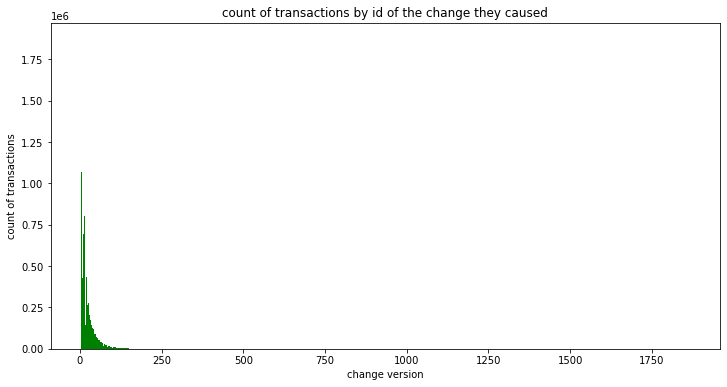

In [50]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.hist(changes_opens_closes_df.tx_change_version, color='g', bins=1000)
ax.set_xlabel("change version")
ax.set_ylabel("count of transactions")
ax.set_title("count of transactions by id of the change they caused")
plt.show()

# Show the cumulative plot for discovered tokens

Here will be shown cumulative chart of the profits and losses per day with daily distribution of price for token on 3 platforms: FTX, Uniswap and Perpetual

In [51]:
ftx_btc_price_df = pd.read_csv("ftx_price_for_btc.csv")
ftx_eth_price_df = pd.read_csv("ftx_price_for_eth.csv")
ftx_perp_price_df = pd.read_csv("ftx_price_for_perp.csv")

uniswap_btc_price_df = pd.read_csv("uniswap_price_for_wbtc.csv")
uniswap_eth_price_df = pd.read_csv("uniswap_price_for_weth.csv")
uniswap_perp_price_df = pd.read_csv("uniswap_price_for_perp.csv")

In [52]:
uniswap_btc_price_df["date"] = pd.to_datetime(uniswap_btc_price_df["date"])
uniswap_eth_price_df["date"] = pd.to_datetime(uniswap_eth_price_df["date"])
uniswap_perp_price_df["date"] = pd.to_datetime(uniswap_perp_price_df["date"])

In [53]:
ftx_btc_price_df["time"] = pd.to_datetime(ftx_btc_price_df["date"]).dt.tz_localize(None)
ftx_eth_price_df["time"] = pd.to_datetime(ftx_eth_price_df["date"]).dt.tz_localize(None)
ftx_perp_price_df["time"] = pd.to_datetime(ftx_perp_price_df["date"]).dt.tz_localize(None)

It is extremely important to take only values that are related to the 2021

In [54]:
uniswap_btc_price_df = uniswap_btc_price_df[(uniswap_btc_price_df["date"] <= datetime(2021, 12, 31)) &
                                            (uniswap_btc_price_df["date"] >= datetime(2021, 1, 1))]
uniswap_eth_price_df = uniswap_eth_price_df[(uniswap_eth_price_df["date"] <= datetime(2021, 12, 31)) &
                                            (uniswap_eth_price_df["date"] >= datetime(2021, 1, 1))]
uniswap_perp_price_df = uniswap_perp_price_df[(uniswap_perp_price_df["date"] <= datetime(2021, 12, 31)) &
                                              (uniswap_perp_price_df["date"] >= datetime(2021, 1, 1))]

ftx_btc_price_df = ftx_btc_price_df[(ftx_btc_price_df["time"] <= datetime(2021, 12, 31)) &
                                    (ftx_btc_price_df["time"] >= datetime(2021, 1, 1))]
ftx_eth_price_df = ftx_eth_price_df[(ftx_eth_price_df["time"] <= datetime(2021, 12, 31)) &
                                    (ftx_eth_price_df["time"] >= datetime(2021, 1, 1))]
ftx_perp_price_df = ftx_perp_price_df[(ftx_perp_price_df["time"] <= datetime(2021, 12, 31)) &
                                      (ftx_perp_price_df["time"] >= datetime(2021, 1, 1))]

In [55]:
ftx_btc_price_df["time"] = pd.to_datetime(ftx_btc_price_df["date"]).dt.date
ftx_eth_price_df["time"] = pd.to_datetime(ftx_eth_price_df["date"]).dt.date
ftx_perp_price_df["time"] = pd.to_datetime(ftx_perp_price_df["date"]).dt.date

ftx_btc_price_df["day_of_year"] = pd.to_datetime(ftx_btc_price_df["time"]).dt.dayofyear
ftx_eth_price_df["day_of_year"] = pd.to_datetime(ftx_eth_price_df["time"]).dt.dayofyear
ftx_perp_price_df["day_of_year"] = pd.to_datetime(ftx_perp_price_df["time"]).dt.dayofyear

ftx_btc_price_df.set_index("day_of_year", inplace=True)
ftx_eth_price_df.set_index("day_of_year", inplace=True)
ftx_perp_price_df.set_index("day_of_year", inplace=True)

In [56]:
changes_opens_closes_df["time"] = pd.to_datetime(changes_opens_closes_df["timestamp"], unit='s')
changes_opens_closes_2021_df = changes_opens_closes_df[(changes_opens_closes_df["time"] <= datetime(2021, 12, 31, 23, 59, 59)) &
                                                       (changes_opens_closes_df["time"] >= datetime(2021, 1, 1, 0, 0, 0))]
changes_opens_closes_2021_df["day_of_year"] = changes_opens_closes_2021_df["time"].dt.dayofyear

<ipython-input-56-e4ae3f39bd5a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  changes_opens_closes_2021_df["day_of_year"] = changes_opens_closes_2021_df["time"].dt.dayofyear


In [57]:
daily_price_of_btc = changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "BTC/USDC"
                                                    ][["day_of_year", "spot_price"]].groupby(["day_of_year"]).mean()
daily_price_of_eth = changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "ETH/USDC"
                                                    ][["day_of_year", "spot_price"]].groupby(["day_of_year"]).mean()
daily_price_of_perp = changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "PERP/USDC"
                                                    ][["day_of_year", "spot_price"]].groupby(["day_of_year"]).mean()

In [58]:
daily_high_low_price_for_btc = pd.DataFrame(columns=["day_of_year", "price_high", "price_low"])
daily_high_low_price_for_btc["day_of_year"] = changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "BTC/USDC"
                                                                           ]["day_of_year"].unique()
daily_high_low_price_for_btc.set_index("day_of_year", inplace=True)
daily_high_low_price_for_btc["price_high"] = changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "BTC/USDC"
                                                                          ][["day_of_year", "spot_price"]].groupby(by="day_of_year").max()["spot_price"]
daily_high_low_price_for_btc["price_low"] = changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "BTC/USDC"
                                                                         ][["day_of_year", "spot_price"]].groupby(by="day_of_year").min()["spot_price"]
daily_high_low_price_for_btc

price_high     price_low
day_of_year                            
1            29577.627101  28882.059488
2            33101.813602  29174.541912
3            34546.415462  32132.679170
4            33557.997699  29615.538016
5            34411.890662  30217.711797
...                   ...           ...
361          52005.696108  50543.429366
362          50623.863833  47413.860719
363          48031.484748  46203.862650
364          47806.316148  46062.202583
365          48425.288378  45788.058940

[365 rows x 2 columns]

In [59]:
daily_high_low_price_for_eth = pd.DataFrame(columns=["day_of_year", "price_high", "price_low"])
daily_high_low_price_for_eth["day_of_year"] = changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "ETH/USDC"
                                                                           ]["day_of_year"].unique()
daily_high_low_price_for_eth.set_index("day_of_year", inplace=True)
daily_high_low_price_for_eth["price_high"] = changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "ETH/USDC"
                                                                          ][["day_of_year", "spot_price"]].groupby(by="day_of_year").max()["spot_price"]
daily_high_low_price_for_eth["price_low"] = changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "ETH/USDC"
                                                                         ][["day_of_year", "spot_price"]].groupby(by="day_of_year").min()["spot_price"]
daily_high_low_price_for_eth

price_high    price_low
day_of_year                          
1             746.863256   721.742935
2             783.589051   719.747956
3            1012.298907   774.806511
4            1155.288441   932.378478
5            1123.944792   989.005804
...                  ...          ...
361          4122.187402  4036.174851
362          4034.814433  3766.228213
363          3823.815826  3612.207362
364          3766.690371  3585.470453
365          3825.876127  3631.255017

[365 rows x 2 columns]

In [60]:
daily_high_low_price_for_perp = pd.DataFrame(columns=["day_of_year", "price_high", "price_low"])
daily_high_low_price_for_perp["day_of_year"] = changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "PERP/USDC"
                                                                           ]["day_of_year"].unique()
daily_high_low_price_for_perp.set_index("day_of_year", inplace=True)
daily_high_low_price_for_perp["price_high"] = changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "PERP/USDC"
                                                                          ][["day_of_year", "spot_price"]].groupby(by="day_of_year").max()["spot_price"]
daily_high_low_price_for_perp["price_low"] = changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "PERP/USDC"
                                                                         ][["day_of_year", "spot_price"]].groupby(by="day_of_year").min()["spot_price"]
daily_high_low_price_for_perp

price_high  price_low
day_of_year                       
91             8.770325   8.240379
92            10.486013   8.772056
93            10.089630   8.408326
94             9.056599   8.341227
95             9.083580   8.541172
...                 ...        ...
361            9.995452   9.457662
362            9.561900   8.895072
363            9.227999   8.532218
364            9.496905   8.684451
365            9.066902   8.576775

[275 rows x 2 columns]

# Cumulative PnL, daily traders count and daily token price for BTC

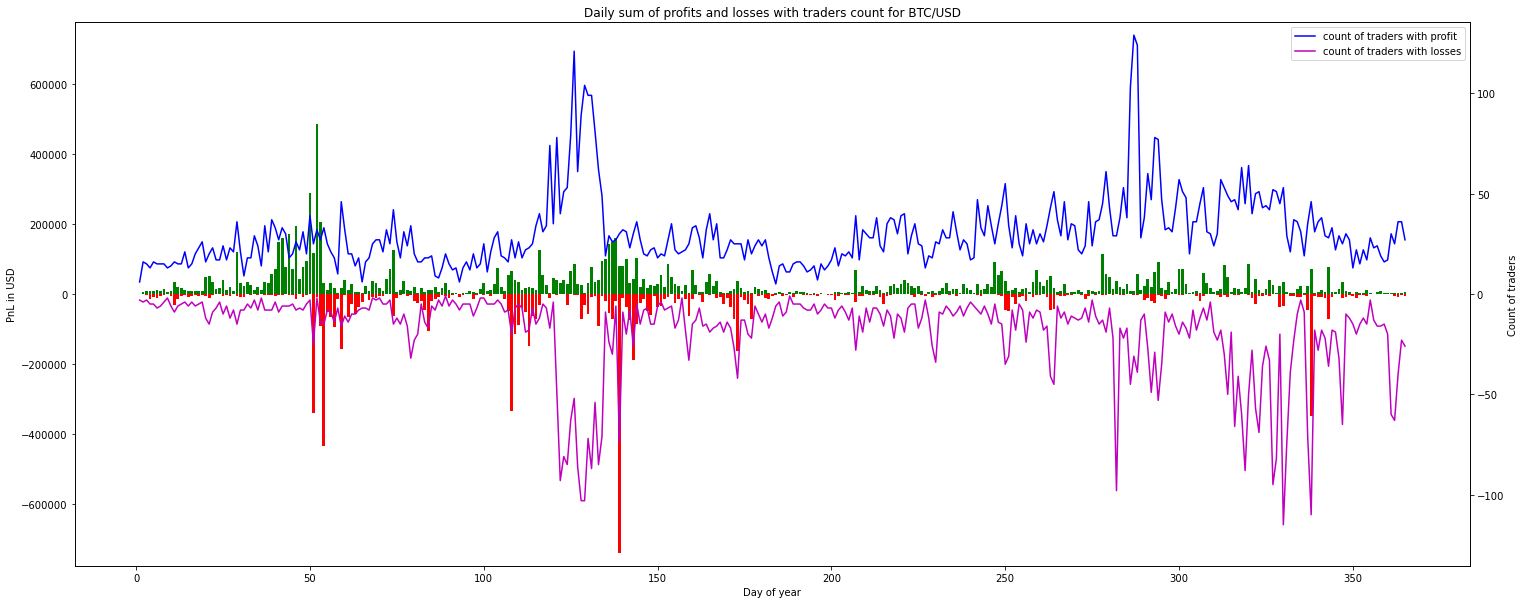

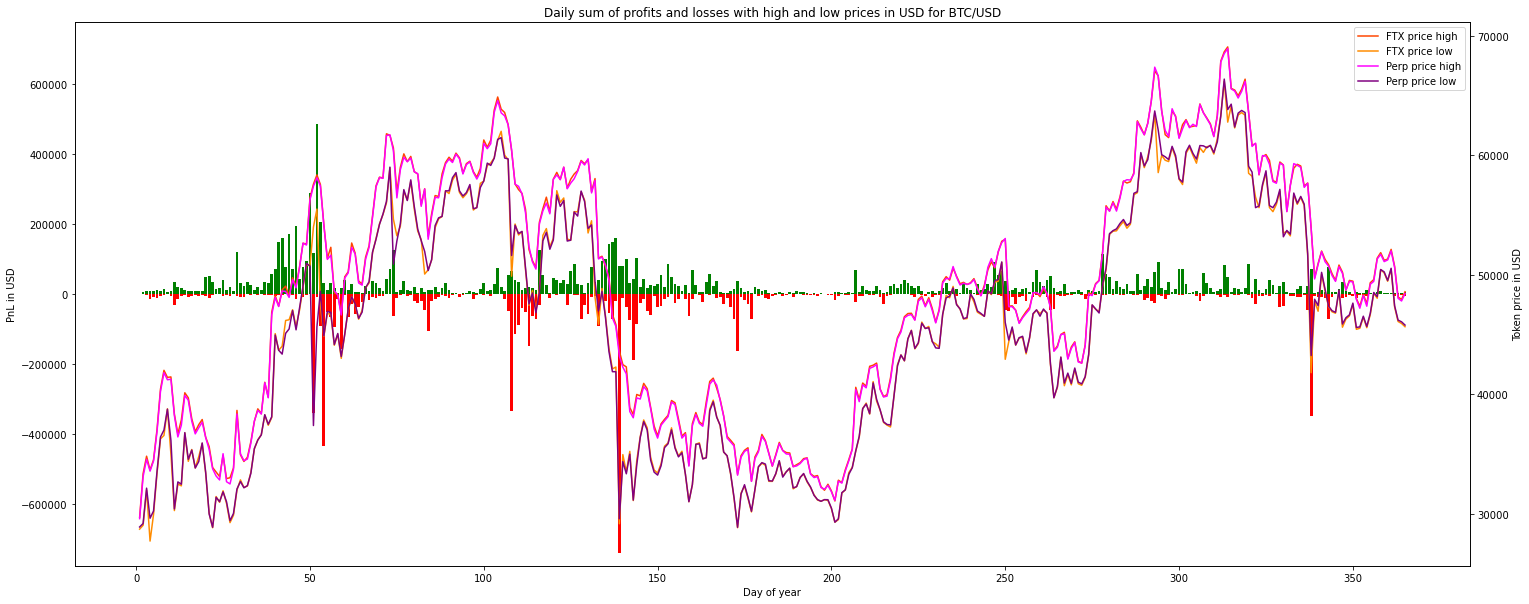

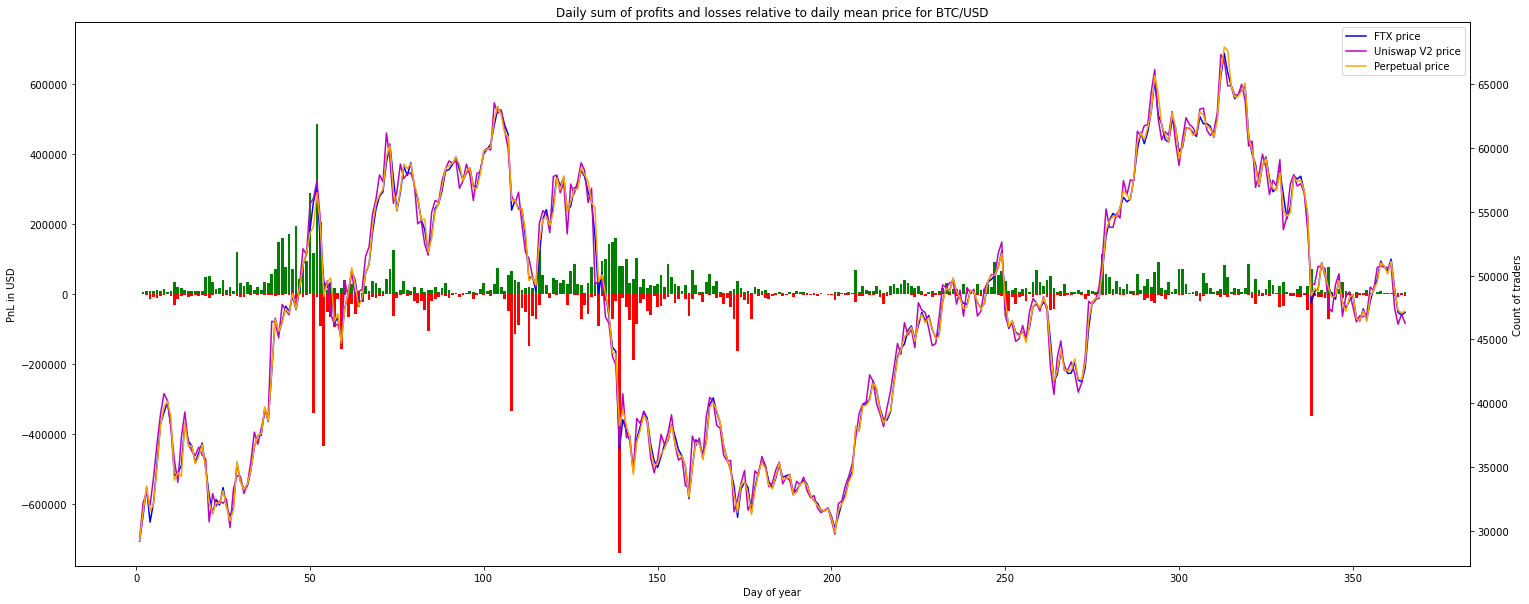

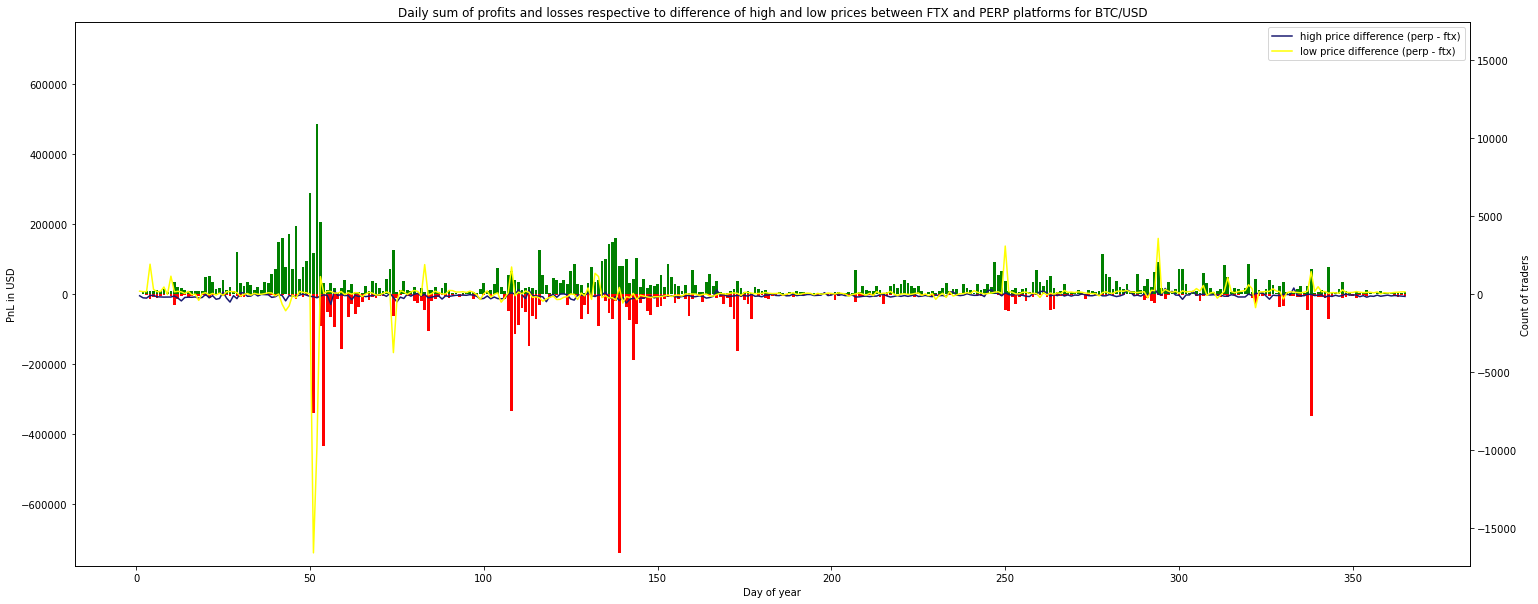

In [61]:
#       make a cumulative sum of profits and losses daily respective to the traders count by their profit or loss status
plot_cumulative_pnl_to_traders_counts(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "BTC/USDC"], "BTC")

#       make a cumulative sum of profits and losses daily respective to daily high and low price
plot_cumulative_pnl_to_high_and_low_price(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "BTC/USDC"], 
                                          ftx_btc_price_df, daily_high_low_price_for_btc, "BTC")

#       make a cumulative sum of profits and losses daily respective to daily mean price
plot_cumulative_pnl_to_mean_price(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "BTC/USDC"], 
                                  uniswap_btc_price_df, ftx_btc_price_df, daily_price_of_btc, "BTC")

#       make a cumulative sum of profits and losses daily respective to difference between high and low prices of PERP and FTX platforms
plot_cumulative_pnl_to_high_low_diff(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "BTC/USDC"], 
                                ftx_btc_price_df, daily_high_low_price_for_btc, "BTC")

# Cumulative PnL, daily traders count and daily token price for ETH

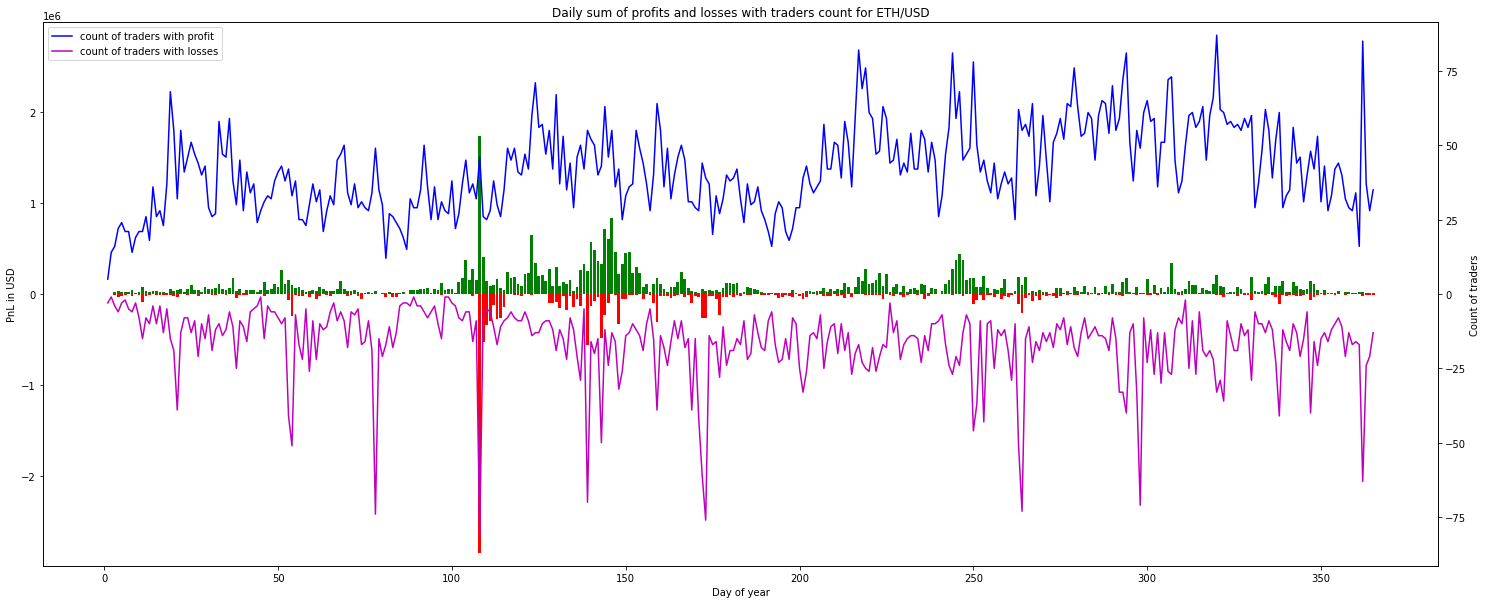

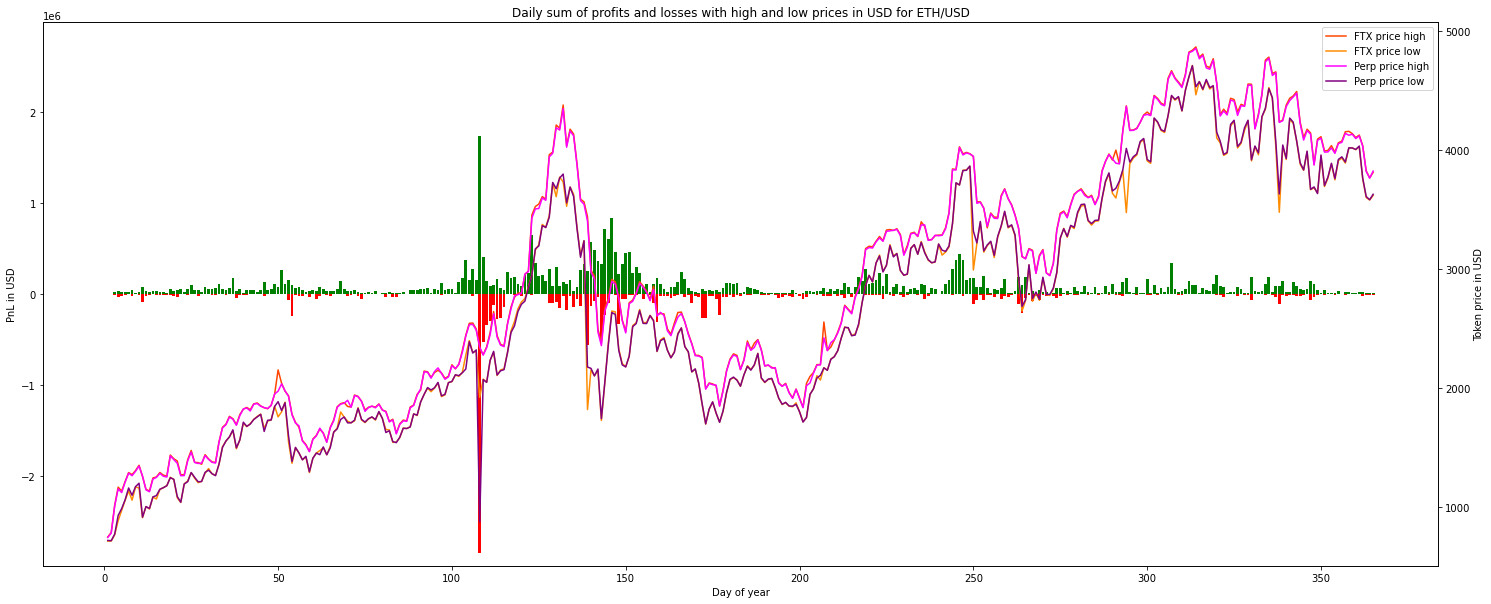

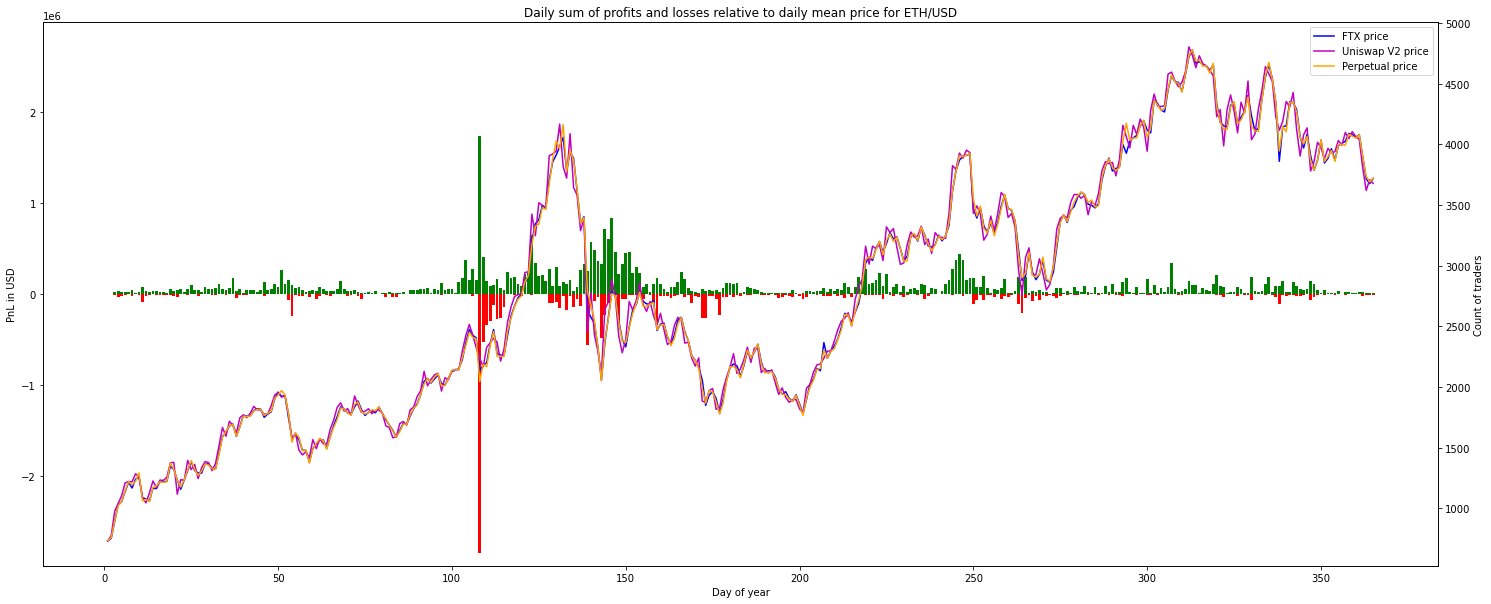

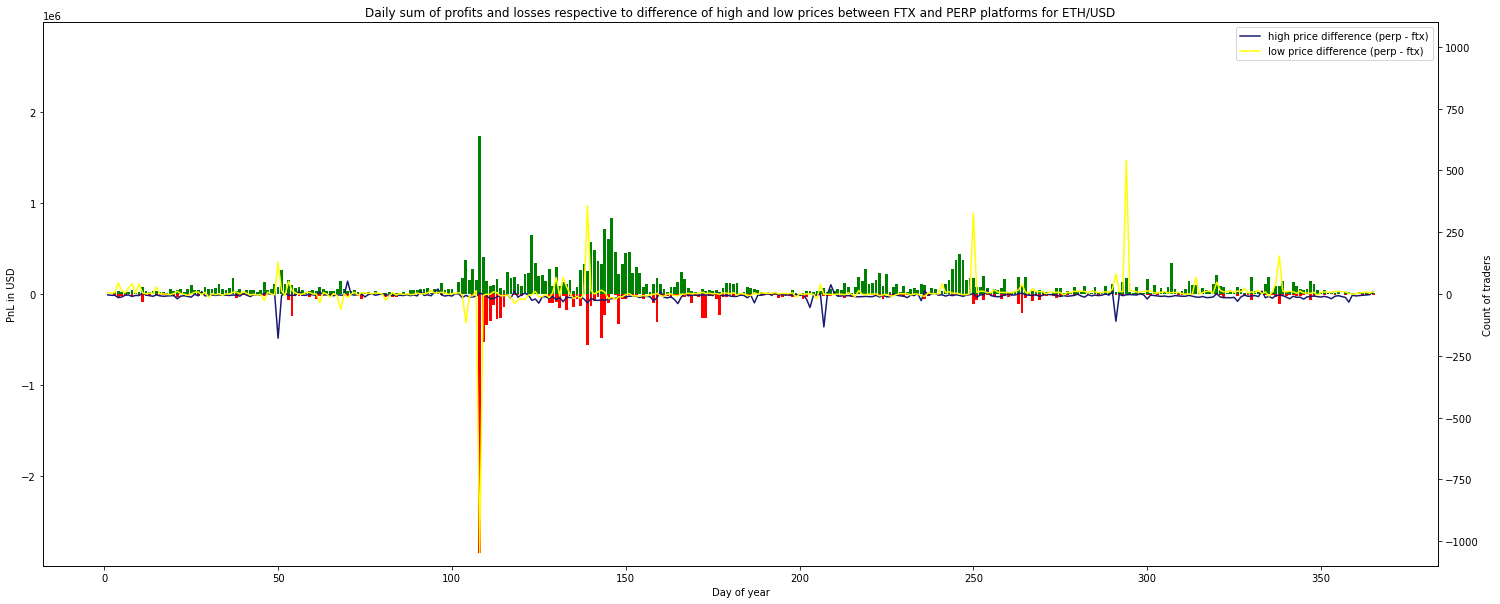

In [62]:
#       make a cumulative sum of profits and losses daily respective to the traders count by their profit or loss status
plot_cumulative_pnl_to_traders_counts(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "ETH/USDC"], "ETH")

#       make a cumulative sum of profits and losses daily respective to daily high and low price
plot_cumulative_pnl_to_high_and_low_price(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "ETH/USDC"], 
                                          ftx_eth_price_df, daily_high_low_price_for_eth, "ETH")

#       make a cumulative sum of profits and losses daily respective to daily mean price
plot_cumulative_pnl_to_mean_price(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "ETH/USDC"], 
                                  uniswap_eth_price_df, ftx_eth_price_df, daily_price_of_eth, "ETH")

#       make a cumulative sum of profits and losses daily respective to difference between high and low prices of PERP and FTX platforms
plot_cumulative_pnl_to_high_low_diff(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "ETH/USDC"], 
                                ftx_eth_price_df, daily_high_low_price_for_eth, "ETH")

# Cumulative PnL, daily traders count and daily token price for PERP

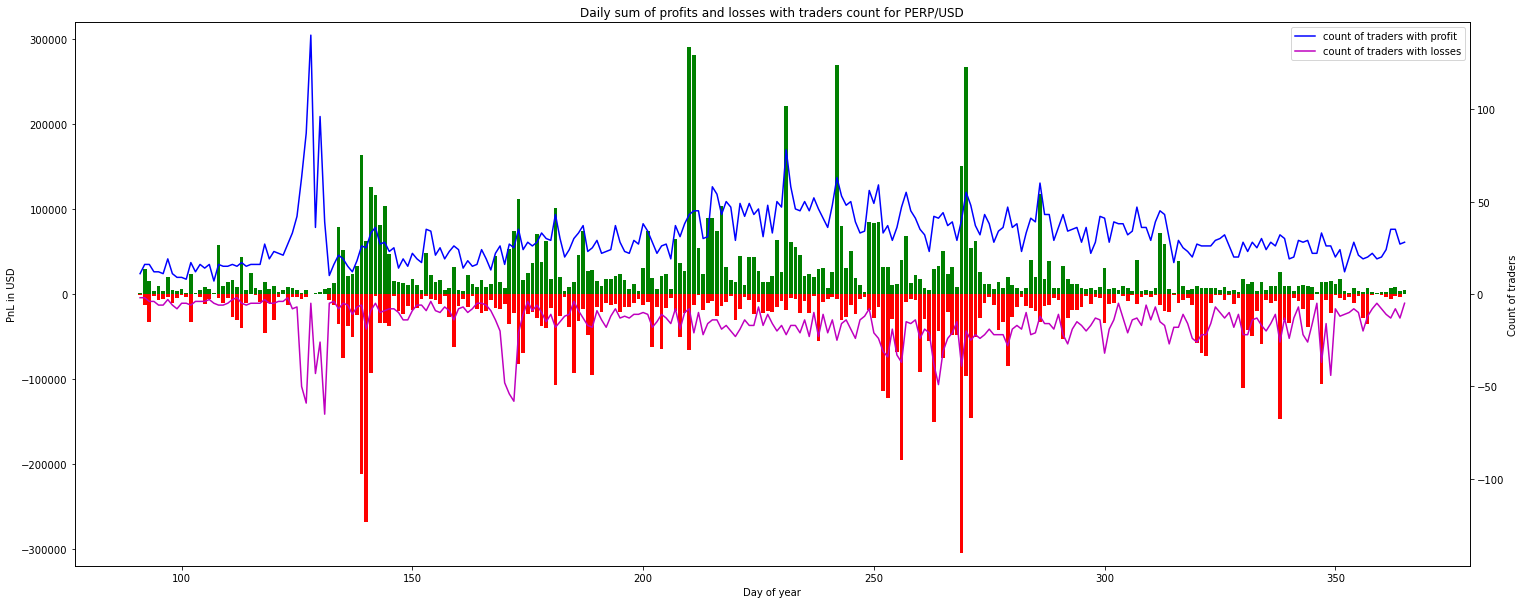

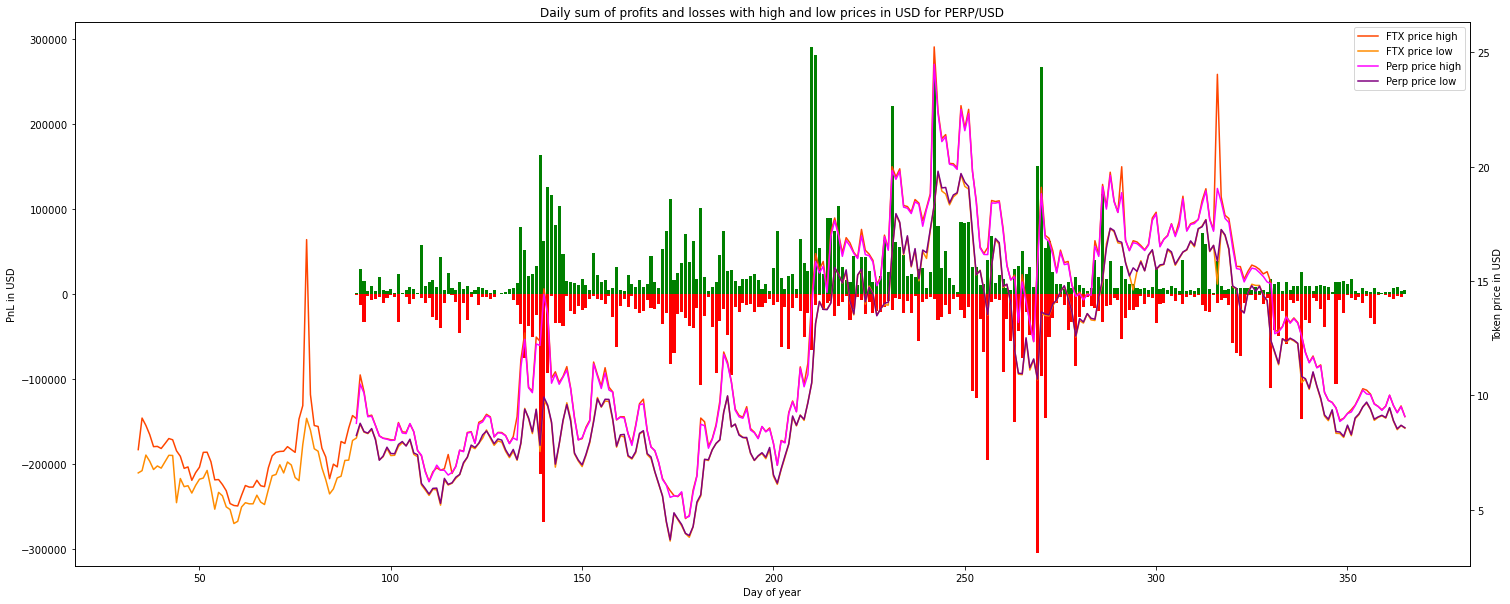

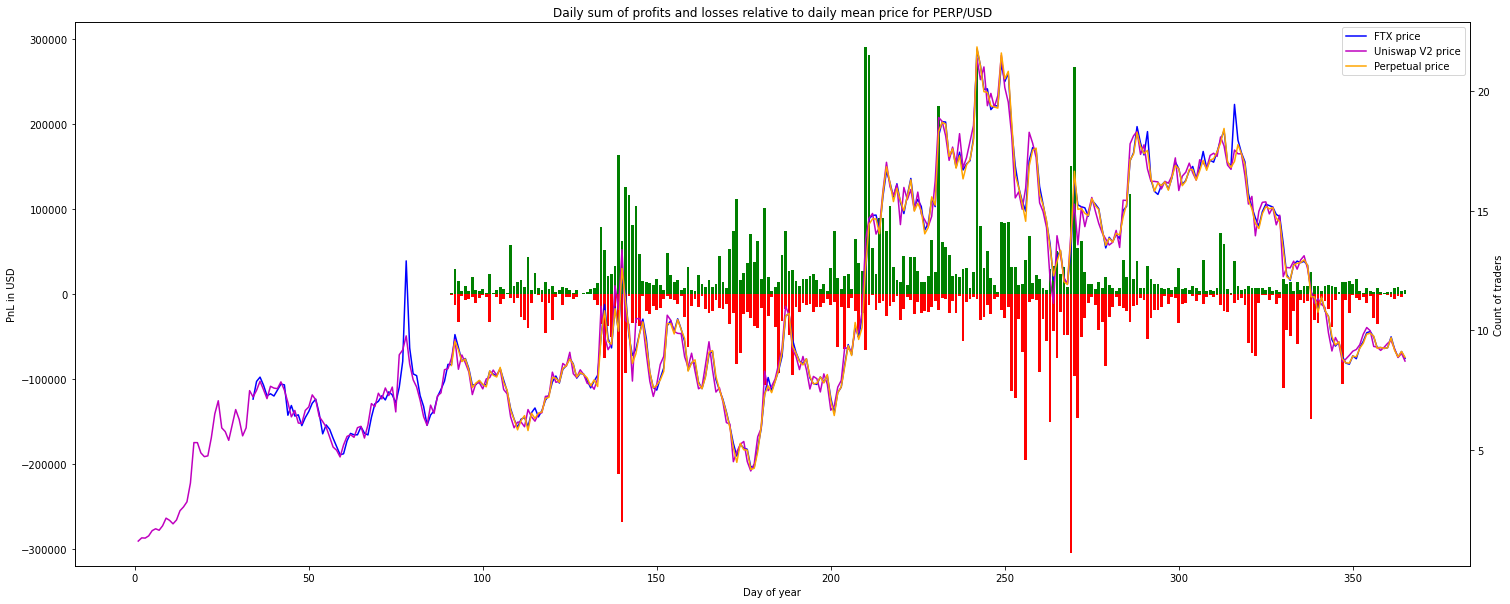

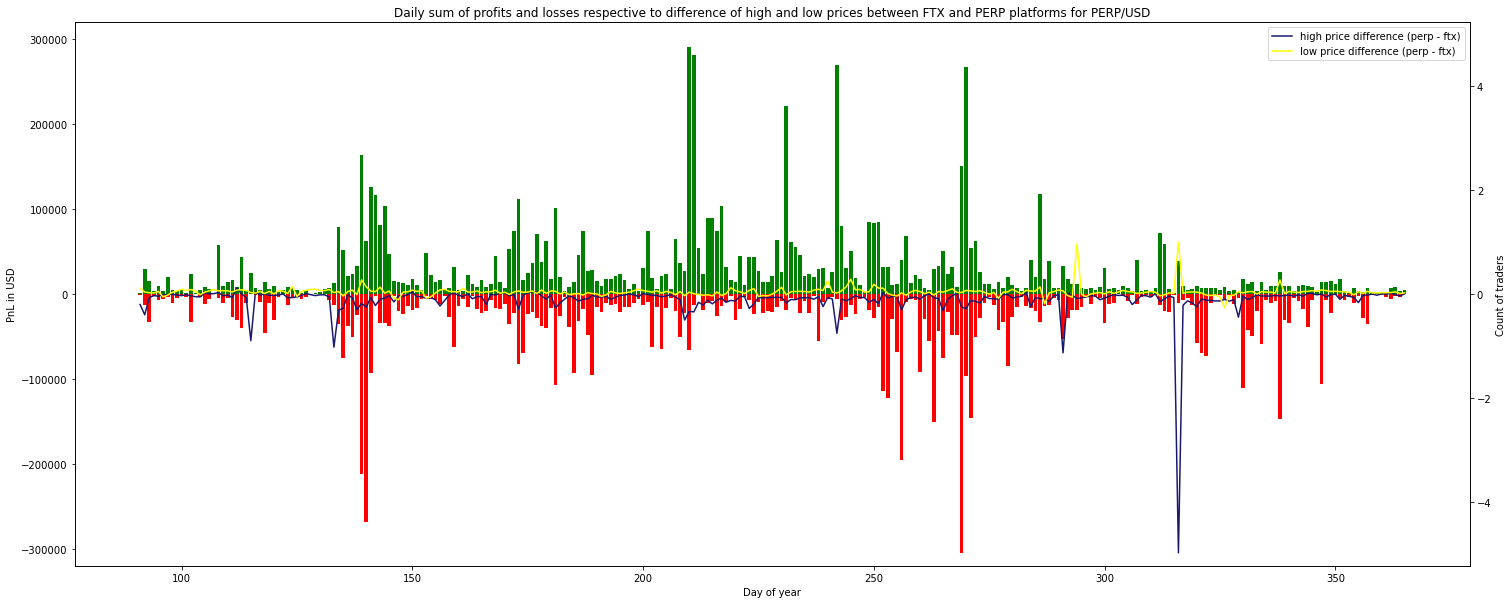

In [63]:
#       make a cumulative sum of profits and losses daily respective to the traders count by their profit or loss status
plot_cumulative_pnl_to_traders_counts(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "PERP/USDC"], "PERP")

#       make a cumulative sum of profits and losses daily respective to daily high and low price
plot_cumulative_pnl_to_high_and_low_price(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "PERP/USDC"], 
                                          ftx_perp_price_df, daily_high_low_price_for_perp, "PERP")

#       make a cumulative sum of profits and losses daily respective to daily mean price
plot_cumulative_pnl_to_mean_price(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "PERP/USDC"], 
                                  uniswap_perp_price_df, ftx_perp_price_df, daily_price_of_perp, "PERP")

#       make a cumulative sum of profits and losses daily respective to difference between high and low prices of PERP and FTX platforms
plot_cumulative_pnl_to_high_low_diff(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "PERP/USDC"], 
                                ftx_perp_price_df[ftx_perp_price_df.index > 90], daily_high_low_price_for_perp, "PERP")

# Trader frequency analysis

In [64]:
trader_stats_df = pd.read_csv("trader_activity_stats_df.csv")
trader_stats_df.rename({"Unnamed: 0": "trader"}, axis=1, inplace=True)
trader_stats_df

trader  AAVE/USDC  ALPHA/USDC  \
0      0x000000003b0371b33aba8b6b58154a98d54695ad          0           0   
1      0x000000064730640b7d670408d74280924883064f          0           0   
2      0x0000000813b34008a225de08a6a61835508c71f9          0           0   
3      0x000000ea89990a17ec07a35ac2bbb02214c50152          1           0   
4      0x0000ce08fa224696a819877070bf378e8b131acf          0           0   
...                                           ...        ...         ...   
10196  0xffe694afb3b54ee0add6ded4cc0f9917777f13da          0           0   
10197  0xfffb40347816873ca038756cc87bc610144166b2          0           0   
10198  0xfffdd2572f57b6457c8c4b0320e8f1f1ec4812bd          0           0   
10199  0xfffe45d946f1f715dc0252df3db22a9edfaf5738          0           0   
10200  0xffff0c6febddbab590ad077096d87ce806aace47          1           0   

       BTC/USDC  COMP/USDC  CREAM/USDC  CRV/USDC  DOT/USDC  ETH/USDC  \
0             0          0           0         0         0         0   
1             0          0           0         0         0         1   
2             1          0           0         0         0         0   
3             1          1           1         1         1         1   
4             0          0           0         1         0         1   
...         ...        ...         ...       ...       ...       ...   
10196         0          0           0         0         0         0   
10197         0          0           0         0         0         1   
10198         0          0           0         0         0         1   
10199         0          0           0         0         0         0   
10200         1          0           0         0         0         1   

       FTT/USDC  ...  MKR/USDC  PERP/USDC  REN/USDC  SNX/USDC  SUSHI/USDC  \
0             0  ...         0          1         0         0           0   
1             0  ...         0          0         0         0           0   
2             0  ...         0          0         0         0           0   
3             1  ...         1          1         1         1           1   
4             0  ...         0          0         0         0           0   
...         ...  ...       ...        ...       ...       ...         ...   
10196         0  ...         1          0         0         0           0   
10197         0  ...         0          0         0         0           0   
10198         0  ...         0          0         0         0           0   
10199         0  ...         0          0         0         0           0   
10200         0  ...         0          0         0         0           0   

       UNI/USDC  YFI/USDC  unknown  occurencies_sum  tx_frequency  
0             0         0        0                1      0.000041  
1             0         0        0                1      0.016858  
2             0         0        0                1      0.050000  
3             1         1        0               17      0.011798  
4             0         0        0                2      0.025000  
...         ...       ...      ...              ...           ...  
10196         0         0        0                1      0.000002  
10197         0         0        0                1      0.005195  
10198         0         0        0                1      0.000001  
10199         0         1        0                1      0.000000  
10200         0         1        0                4      0.000005  

[10201 rows x 22 columns]

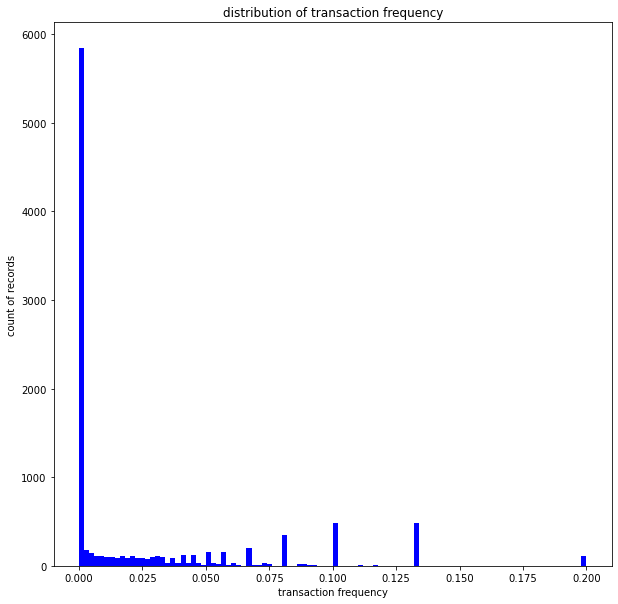

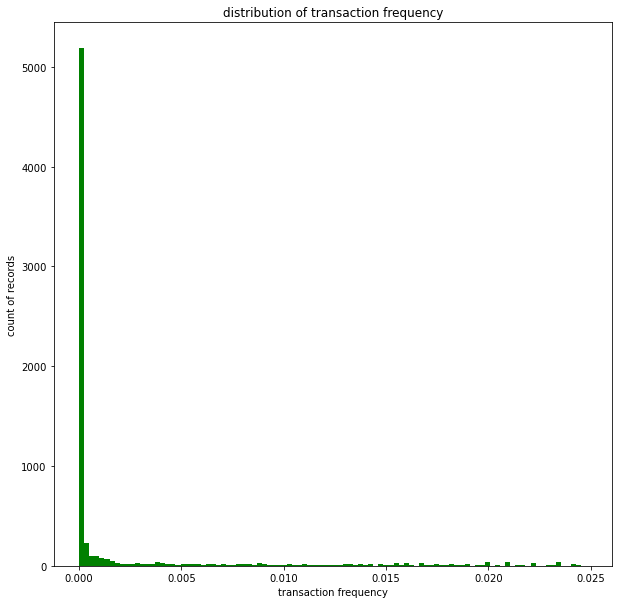

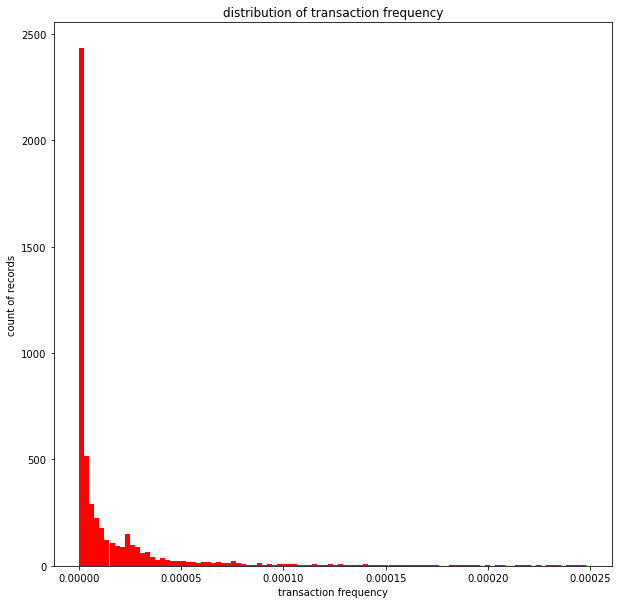

In [65]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(trader_stats_df["tx_frequency"], color='b', bins=100)
ax.set_xlabel("transaction frequency")
ax.set_ylabel("count of records")
ax.set_title("distribution of transaction frequency")
plt.show()

fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(trader_stats_df[trader_stats_df["tx_frequency"] < 0.025]["tx_frequency"], color='g', bins=100)
ax.set_xlabel("transaction frequency")
ax.set_ylabel("count of records")
ax.set_title("distribution of transaction frequency")
plt.show()

fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(trader_stats_df[trader_stats_df["tx_frequency"] < 0.00025]["tx_frequency"], color='r', bins=100)
ax.set_xlabel("transaction frequency")
ax.set_ylabel("count of records")
ax.set_title("distribution of transaction frequency")
plt.show()

In [66]:
trader_stats_df["seconds_per_tx"] = 1 / trader_stats_df["tx_frequency"]
trader_stats_df["seconds_per_tx"].min()

5.0

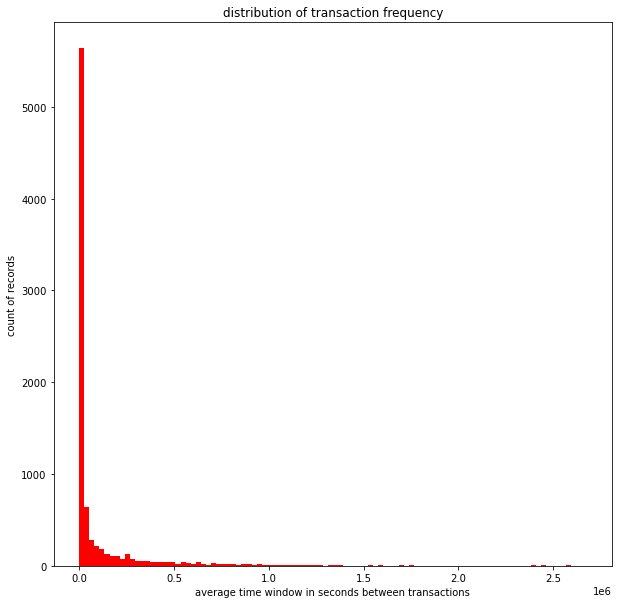

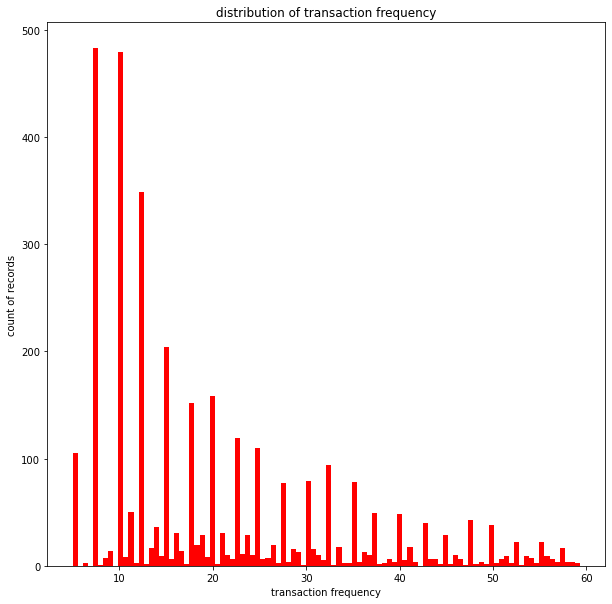

In [67]:
fig, ax = plt.subplots(figsize=(10, 10))
# take cases when there was time interval less than 1 month per transaction
ax.hist(trader_stats_df[(trader_stats_df["seconds_per_tx"] != np.inf) &
                        (trader_stats_df["seconds_per_tx"] < 2700000)]["seconds_per_tx"], color='r', bins=100)
ax.set_xlabel("average time window in seconds between transactions")
ax.set_ylabel("count of records")
ax.set_title("distribution of transaction frequency")
plt.show()

fig, ax = plt.subplots(figsize=(10, 10))
# take cases when there was time interval less than 1 month per transaction
ax.hist(trader_stats_df[(trader_stats_df["seconds_per_tx"] != np.inf) &
                        (trader_stats_df["seconds_per_tx"] < 60)]["seconds_per_tx"], color='r', bins=100)
ax.set_xlabel("transaction frequency")
ax.set_ylabel("count of records")
ax.set_title("distribution of transaction frequency")
plt.show()

There was estimated a final strategy for detection of the bots activity and to find bots addresses:

*   **First rule** - amount of seconds per transaction should be around or smaller than 1 minute;
*   **Second rule** - overall activity performed by a trader should be bigger than 3 days, because it is possible that some trader tried to perform fast and adaptive trading during a small period of time, but it is not possible to be done with longer time period.

# Bots final detection

In [68]:
trader_time_stats_df = pd.DataFrame(columns=(["trader", "first_time", "last_time"]))
trader_time_stats_df["trader"] = changes_opens_closes_df["trader"].unique()
trader_time_stats_df = trader_time_stats_df.sort_values(by=["trader"]).reset_index()
trader_time_stats_df.drop(columns=["index"], inplace=True)
trader_time_stats_df["first_time"] = changes_opens_closes_df[["trader", "timestamp"]].groupby(by=["trader"]).min().sort_values(by=["trader"]).reset_index()["timestamp"]
trader_time_stats_df["last_time"] = changes_opens_closes_df[["trader", "timestamp"]].groupby(by=["trader"]).max().sort_values(by=["trader"]).reset_index()["timestamp"]
trader_time_stats_df

trader  first_time   last_time
0      0x000000003b0371b33aba8b6b58154a98d54695ad  1627107685  1632206315
1      0x000000064730640b7d670408d74280924883064f  1632342645  1632343950
2      0x0000000813b34008a225de08a6a61835508c71f9  1636974535  1636974575
3      0x000000ea89990a17ec07a35ac2bbb02214c50152  1611678165  1649937215
4      0x0000ce08fa224696a819877070bf378e8b131acf  1641147510  1641147670
...                                           ...         ...         ...
10196  0xffe694afb3b54ee0add6ded4cc0f9917777f13da  1635147490  1642846730
10197  0xfffb40347816873ca038756cc87bc610144166b2  1638956940  1638958095
10198  0xfffdd2572f57b6457c8c4b0320e8f1f1ec4812bd  1637753955  1642876870
10199  0xfffe45d946f1f715dc0252df3db22a9edfaf5738  1637386650  1637386650
10200  0xffff0c6febddbab590ad077096d87ce806aace47  1612802585  1620492230

[10201 rows x 3 columns]

In [69]:
trader_stats_df = pd.merge(trader_stats_df, trader_time_stats_df, on="trader")
trader_stats_df

trader  AAVE/USDC  ALPHA/USDC  \
0      0x000000003b0371b33aba8b6b58154a98d54695ad          0           0   
1      0x000000064730640b7d670408d74280924883064f          0           0   
2      0x0000000813b34008a225de08a6a61835508c71f9          0           0   
3      0x000000ea89990a17ec07a35ac2bbb02214c50152          1           0   
4      0x0000ce08fa224696a819877070bf378e8b131acf          0           0   
...                                           ...        ...         ...   
10196  0xffe694afb3b54ee0add6ded4cc0f9917777f13da          0           0   
10197  0xfffb40347816873ca038756cc87bc610144166b2          0           0   
10198  0xfffdd2572f57b6457c8c4b0320e8f1f1ec4812bd          0           0   
10199  0xfffe45d946f1f715dc0252df3db22a9edfaf5738          0           0   
10200  0xffff0c6febddbab590ad077096d87ce806aace47          1           0   

       BTC/USDC  COMP/USDC  CREAM/USDC  CRV/USDC  DOT/USDC  ETH/USDC  \
0             0          0           0         0         0         0   
1             0          0           0         0         0         1   
2             1          0           0         0         0         0   
3             1          1           1         1         1         1   
4             0          0           0         1         0         1   
...         ...        ...         ...       ...       ...       ...   
10196         0          0           0         0         0         0   
10197         0          0           0         0         0         1   
10198         0          0           0         0         0         1   
10199         0          0           0         0         0         0   
10200         1          0           0         0         0         1   

       FTT/USDC  ...  SNX/USDC  SUSHI/USDC  UNI/USDC  YFI/USDC  unknown  \
0             0  ...         0           0         0         0        0   
1             0  ...         0           0         0         0        0   
2             0  ...         0           0         0         0        0   
3             1  ...         1           1         1         1        0   
4             0  ...         0           0         0         0        0   
...         ...  ...       ...         ...       ...       ...      ...   
10196         0  ...         0           0         0         0        0   
10197         0  ...         0           0         0         0        0   
10198         0  ...         0           0         0         0        0   
10199         0  ...         0           0         0         1        0   
10200         0  ...         0           0         0         1        0   

       occurencies_sum  tx_frequency  seconds_per_tx  first_time   last_time  
0                    1      0.000041    2.451264e+04  1627107685  1632206315  
1                    1      0.016858    5.931818e+01  1632342645  1632343950  
2                    1      0.050000    2.000000e+01  1636974535  1636974575  
3                   17      0.011798    8.476187e+01  1611678165  1649937215  
4                    2      0.025000    4.000000e+01  1641147510  1641147670  
...                ...           ...             ...         ...         ...  
10196                1      0.000002    4.528965e+05  1635147490  1642846730  
10197                1      0.005195    1.925000e+02  1638956940  1638958095  
10198                1      0.000001    7.318450e+05  1637753955  1642876870  
10199                1      0.000000             inf  1637386650  1637386650  
10200                4      0.000005    1.830868e+05  1612802585  1620492230  

[10201 rows x 25 columns]

In [70]:
trader_stats_df["activity_in_seconds"] = trader_stats_df["last_time"] - trader_stats_df["first_time"]
trader_stats_df

trader  AAVE/USDC  ALPHA/USDC  \
0      0x000000003b0371b33aba8b6b58154a98d54695ad          0           0   
1      0x000000064730640b7d670408d74280924883064f          0           0   
2      0x0000000813b34008a225de08a6a61835508c71f9          0           0   
3      0x000000ea89990a17ec07a35ac2bbb02214c50152          1           0   
4      0x0000ce08fa224696a819877070bf378e8b131acf          0           0   
...                                           ...        ...         ...   
10196  0xffe694afb3b54ee0add6ded4cc0f9917777f13da          0           0   
10197  0xfffb40347816873ca038756cc87bc610144166b2          0           0   
10198  0xfffdd2572f57b6457c8c4b0320e8f1f1ec4812bd          0           0   
10199  0xfffe45d946f1f715dc0252df3db22a9edfaf5738          0           0   
10200  0xffff0c6febddbab590ad077096d87ce806aace47          1           0   

       BTC/USDC  COMP/USDC  CREAM/USDC  CRV/USDC  DOT/USDC  ETH/USDC  \
0             0          0           0         0         0         0   
1             0          0           0         0         0         1   
2             1          0           0         0         0         0   
3             1          1           1         1         1         1   
4             0          0           0         1         0         1   
...         ...        ...         ...       ...       ...       ...   
10196         0          0           0         0         0         0   
10197         0          0           0         0         0         1   
10198         0          0           0         0         0         1   
10199         0          0           0         0         0         0   
10200         1          0           0         0         0         1   

       FTT/USDC  ...  SUSHI/USDC  UNI/USDC  YFI/USDC  unknown  \
0             0  ...           0         0         0        0   
1             0  ...           0         0         0        0   
2             0  ...           0         0         0        0   
3             1  ...           1         1         1        0   
4             0  ...           0         0         0        0   
...         ...  ...         ...       ...       ...      ...   
10196         0  ...           0         0         0        0   
10197         0  ...           0         0         0        0   
10198         0  ...           0         0         0        0   
10199         0  ...           0         0         1        0   
10200         0  ...           0         0         1        0   

       occurencies_sum  tx_frequency  seconds_per_tx  first_time   last_time  \
0                    1      0.000041    2.451264e+04  1627107685  1632206315   
1                    1      0.016858    5.931818e+01  1632342645  1632343950   
2                    1      0.050000    2.000000e+01  1636974535  1636974575   
3                   17      0.011798    8.476187e+01  1611678165  1649937215   
4                    2      0.025000    4.000000e+01  1641147510  1641147670   
...                ...           ...             ...         ...         ...   
10196                1      0.000002    4.528965e+05  1635147490  1642846730   
10197                1      0.005195    1.925000e+02  1638956940  1638958095   
10198                1      0.000001    7.318450e+05  1637753955  1642876870   
10199                1      0.000000             inf  1637386650  1637386650   
10200                4      0.000005    1.830868e+05  1612802585  1620492230   

       activity_in_seconds  
0                  5098630  
1                     1305  
2                       40  
3                 38259050  
4                      160  
...                    ...  
10196              7699240  
10197                 1155  
10198              5122915  
10199                    0  
10200              7689645  

[10201 rows x 26 columns]

In [71]:
possible_bots_stats_df = trader_stats_df[(trader_stats_df["seconds_per_tx"] < 600) &
                                         (trader_stats_df["activity_in_seconds"] > 259200)]
possible_bots_stats_df

trader  AAVE/USDC  ALPHA/USDC  \
3     0x000000ea89990a17ec07a35ac2bbb02214c50152          1           0   
78    0x01bfc1153a1e239e08bb5b14f96b6eeca50220df          1           1   
275   0x06c3f358032c8caad7918ba22c9f8319cc1c8097          0           0   
322   0x081380cfd42c99f581706c6b889631d3b56d3333          0           0   
384   0x09e728ce1a6933e7d2837e6b94f56c798ebf3ce1          0           0   
...                                          ...        ...         ...   
9451  0xee4ccf4bbeef453768d59e3c87947561cbef18a1          0           0   
9562  0xf18a81675ada96852c1e58dd16452b52ff9d198b          0           0   
9606  0xf25f8835c7fae6d8c346941aef2f066a58b002eb          0           0   
9639  0xf32294b37f50d8801fcae2425374fcc001e241a4          0           0   
9893  0xf9365579c68c59a62851a8af88c0de28189949b9          0           0   

      BTC/USDC  COMP/USDC  CREAM/USDC  CRV/USDC  DOT/USDC  ETH/USDC  FTT/USDC  \
3            1          1           1         1         1         1         1   
78           1          1           1         1         1         1         0   
275          0          0           0         0         0         0         0   
322          1          0           0         0         0         0         1   
384          1          0           0         0         0         0         0   
...        ...        ...         ...       ...       ...       ...       ...   
9451         0          0           0         1         0         0         0   
9562         0          0           0         1         0         0         0   
9606         1          0           1         0         0         1         1   
9639         0          0           0         0         0         0         0   
9893         0          0           0         0         0         0         0   

      ...  SUSHI/USDC  UNI/USDC  YFI/USDC  unknown  occurencies_sum  \
3     ...           1         1         1        0               17   
78    ...           1         1         1        0               17   
275   ...           0         0         0        0                1   
322   ...           0         0         0        0                2   
384   ...           0         0         0        0                1   
...   ...         ...       ...       ...      ...              ...   
9451  ...           0         0         0        0                1   
9562  ...           0         0         0        0                1   
9606  ...           1         1         1        0               10   
9639  ...           1         1         1        0                9   
9893  ...           0         0         0        0                1   

      tx_frequency  seconds_per_tx  first_time   last_time  \
3         0.011798       84.761870  1611678165  1649937215   
78        0.002451      407.983224  1623166875  1626522945   
275       0.003652      273.820708  1622097870  1622925630   
322       0.003941      253.764389  1631640165  1649938100   
384       0.003946      253.451124  1609259960  1649938105   
...            ...             ...         ...         ...   
9451      0.002251      444.268635  1633620330  1649933430   
9562      0.007894      126.686301  1618262030  1649920810   
9606      0.001871      534.501147  1628774570  1631104995   
9639      0.002638      379.047660  1631101695  1644359645   
9893      0.004249      235.354299  1621773095  1622925625   

      activity_in_seconds  
3                38259050  
78                3356070  
275                827760  
322              18297935  
384              40678145  
...                   ...  
9451             16313100  
9562             31658780  
9606              2330425  
9639             13257950  
9893              1152530  

[82 rows x 26 columns]

In [72]:
changes_opens_closes_2021_df = changes_opens_closes_2021_df[changes_opens_closes_2021_df["trader"].isin(possible_bots_stats_df["trader"])]

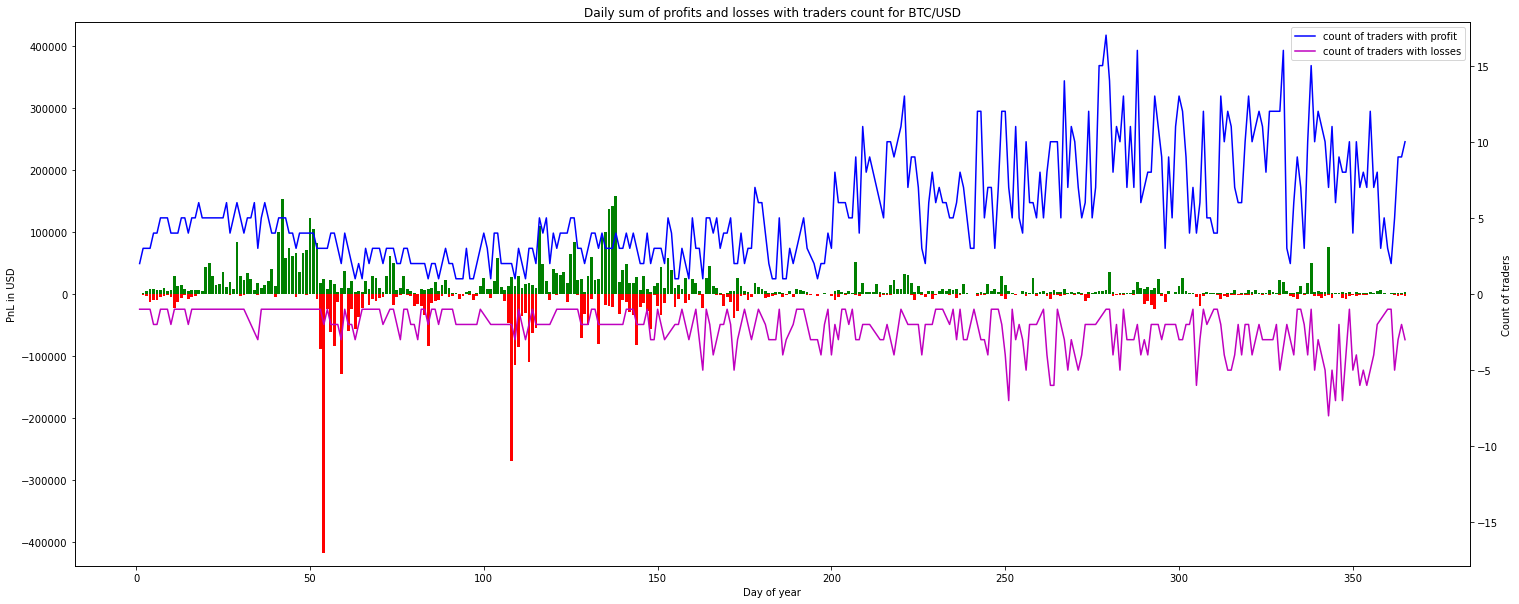

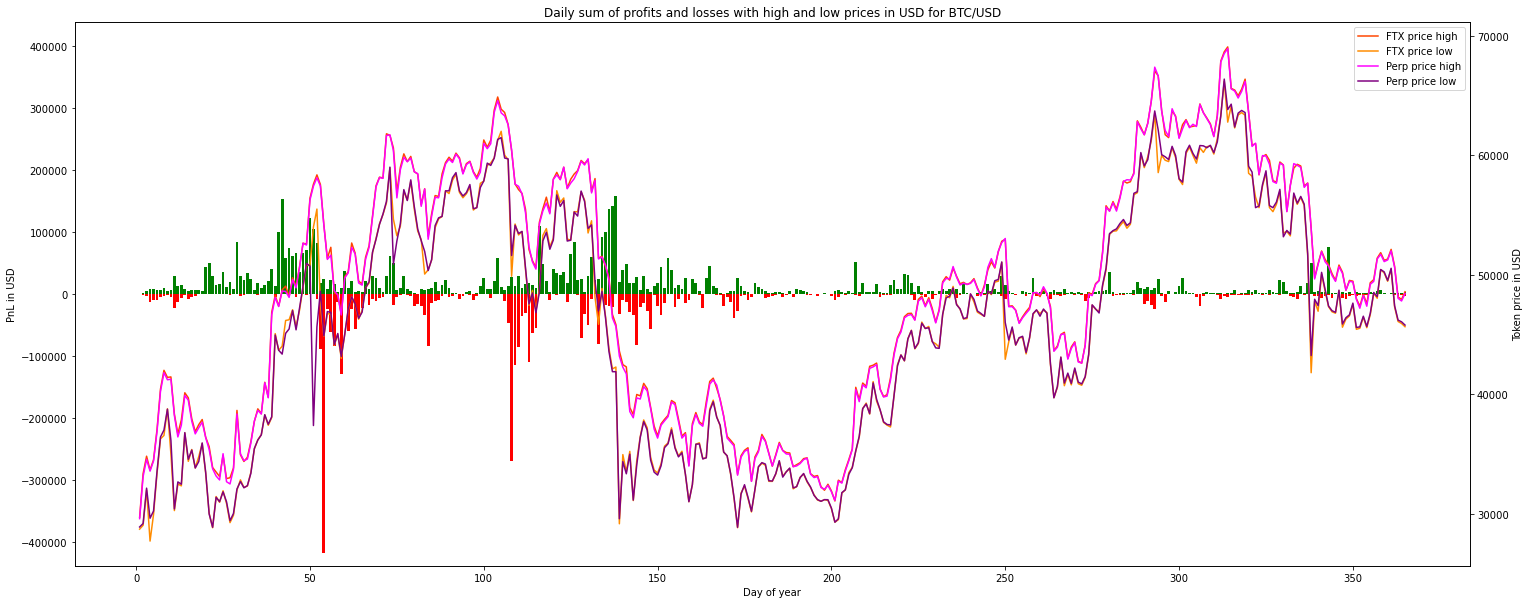

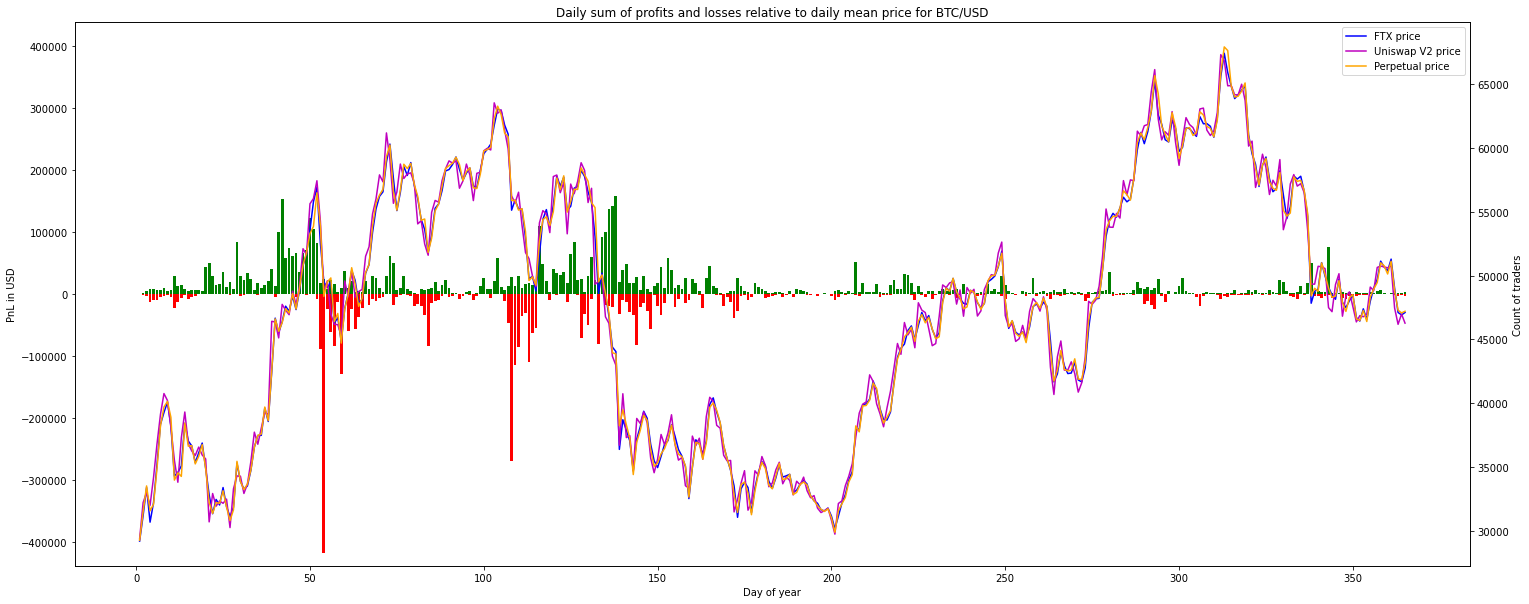

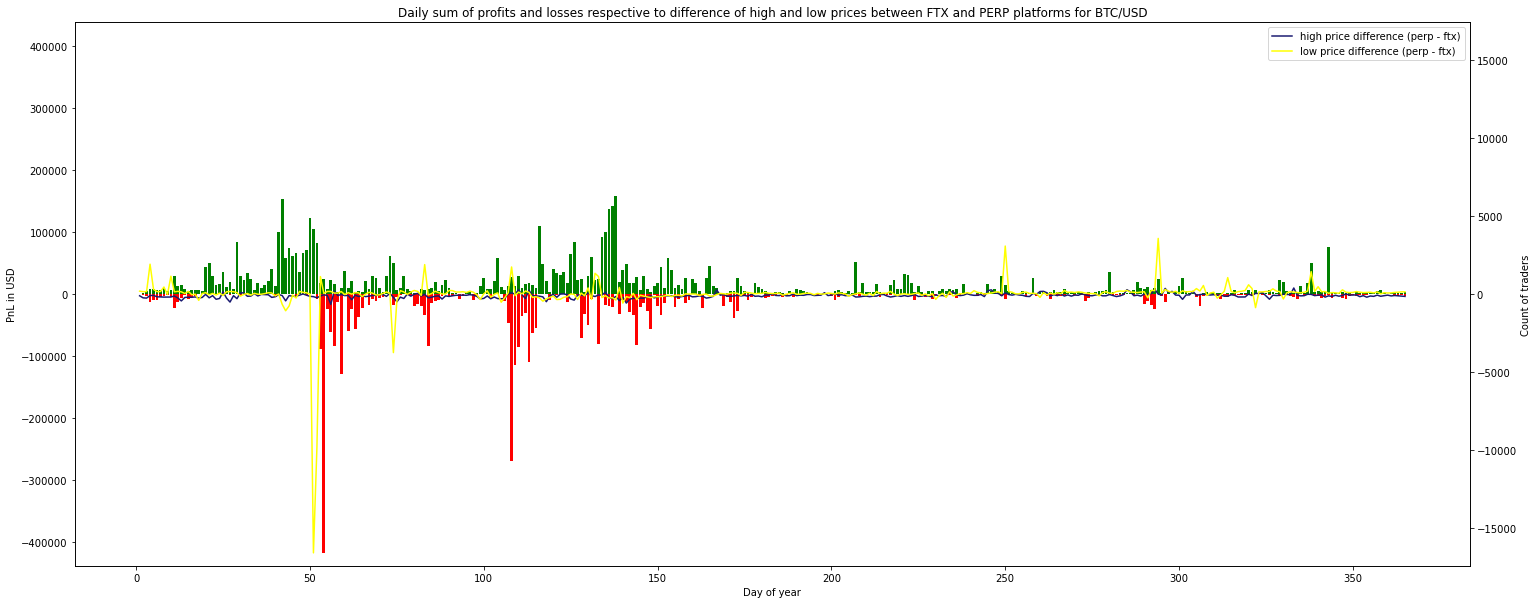

In [73]:
#       make a cumulative sum of profits and losses daily respective to the traders count by their profit or loss status
plot_cumulative_pnl_to_traders_counts(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "BTC/USDC"], "BTC")

#       make a cumulative sum of profits and losses daily respective to daily high and low price
plot_cumulative_pnl_to_high_and_low_price(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "BTC/USDC"], 
                                          ftx_btc_price_df, daily_high_low_price_for_btc, "BTC")

#       make a cumulative sum of profits and losses daily respective to daily mean price
plot_cumulative_pnl_to_mean_price(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "BTC/USDC"], 
                                  uniswap_btc_price_df, ftx_btc_price_df, daily_price_of_btc, "BTC")

#       make a cumulative sum of profits and losses daily respective to difference between high and low prices of PERP and FTX platforms
plot_cumulative_pnl_to_high_low_diff(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "BTC/USDC"], 
                                ftx_btc_price_df, daily_high_low_price_for_btc, "BTC")

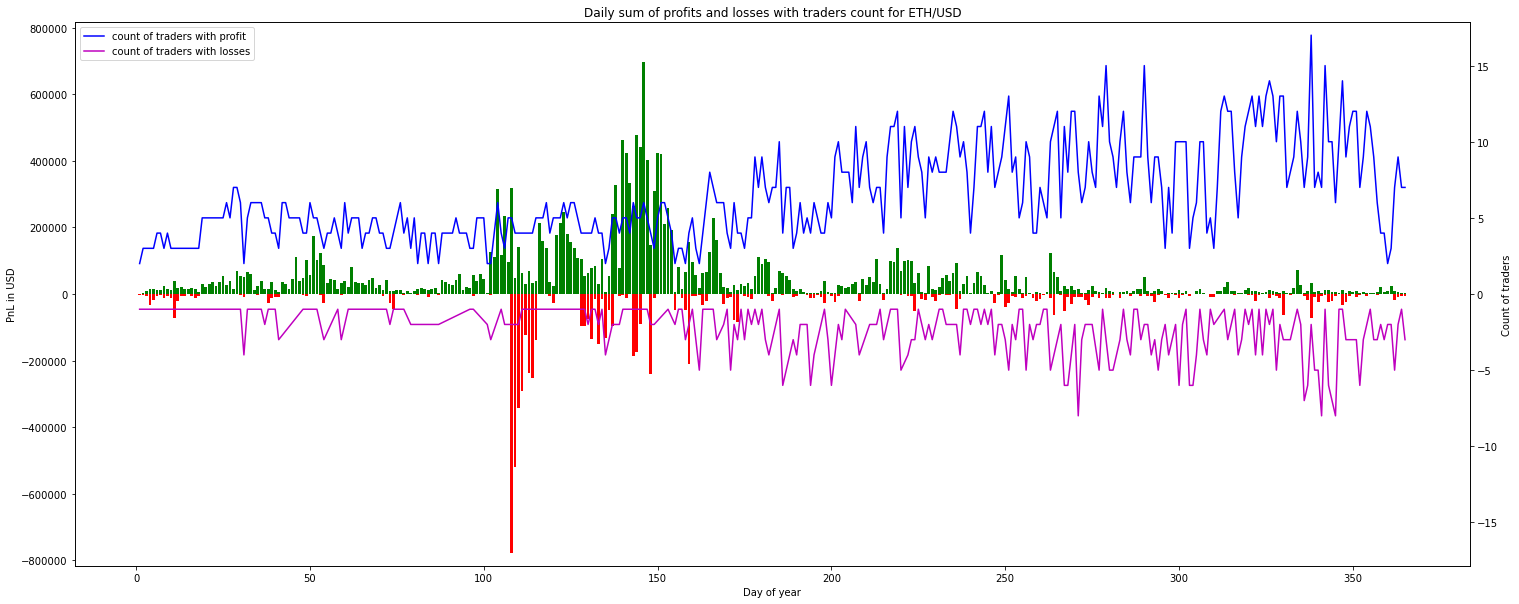

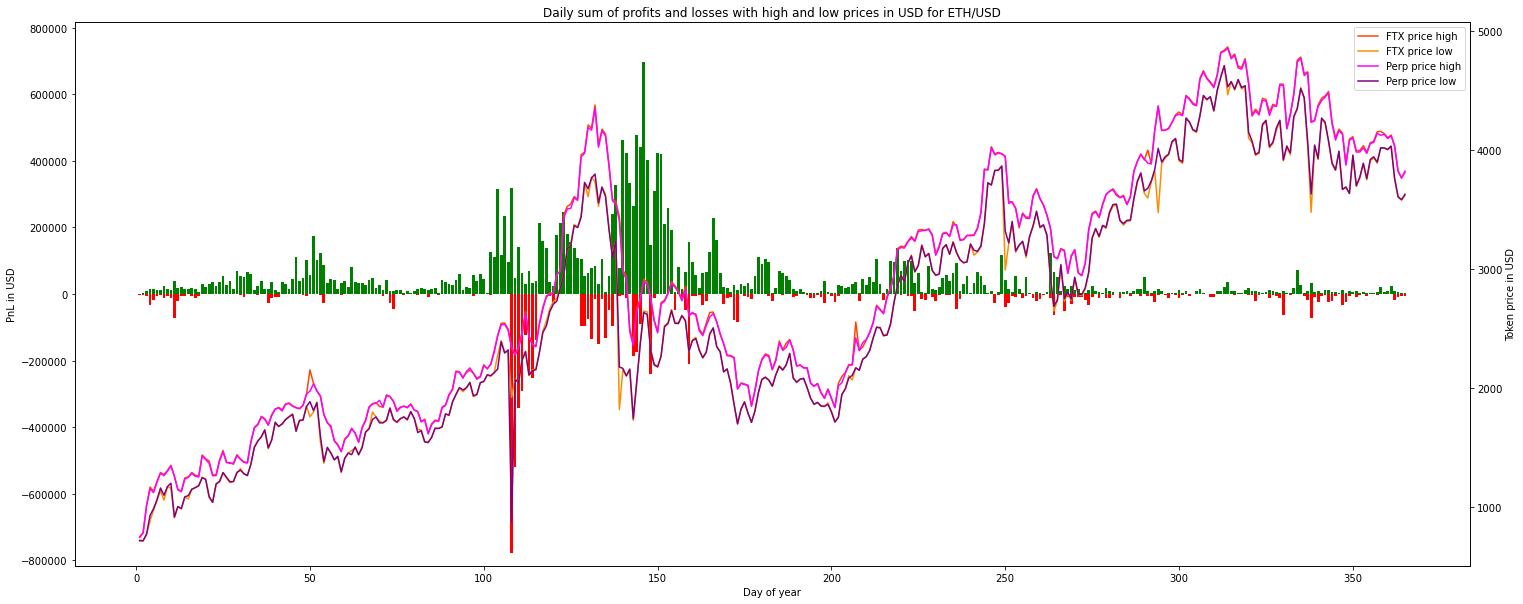

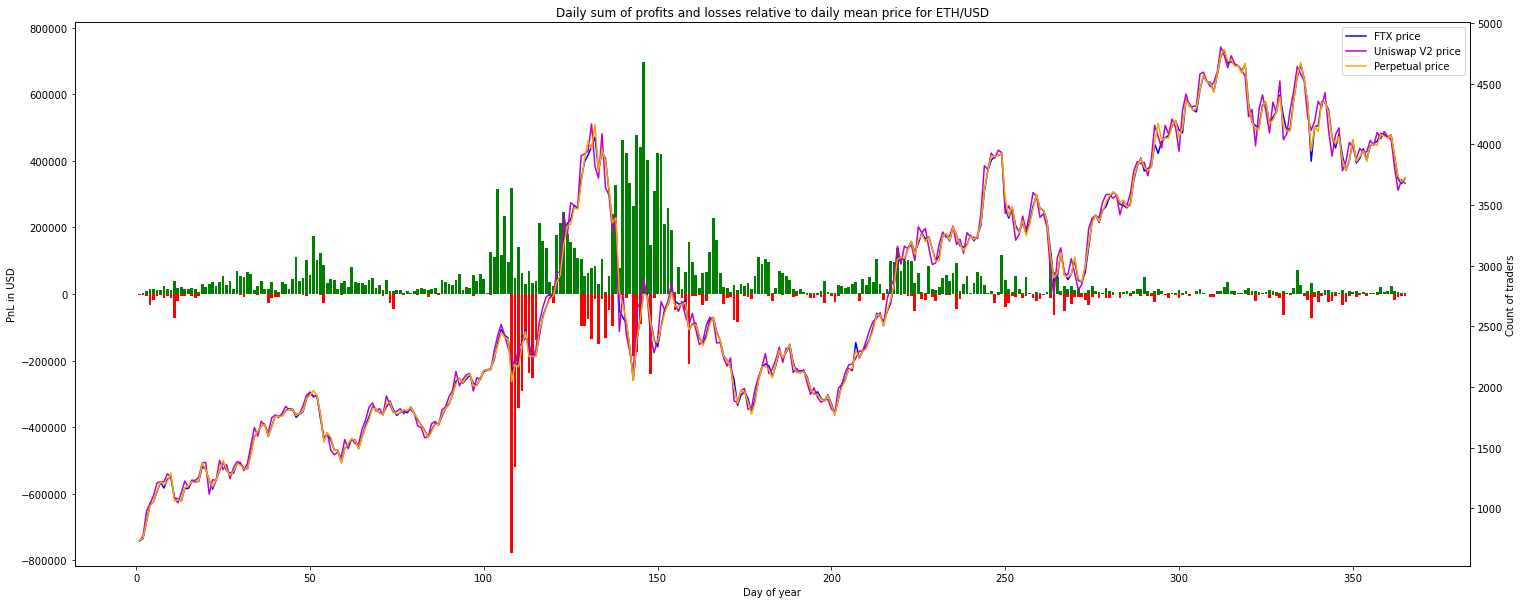

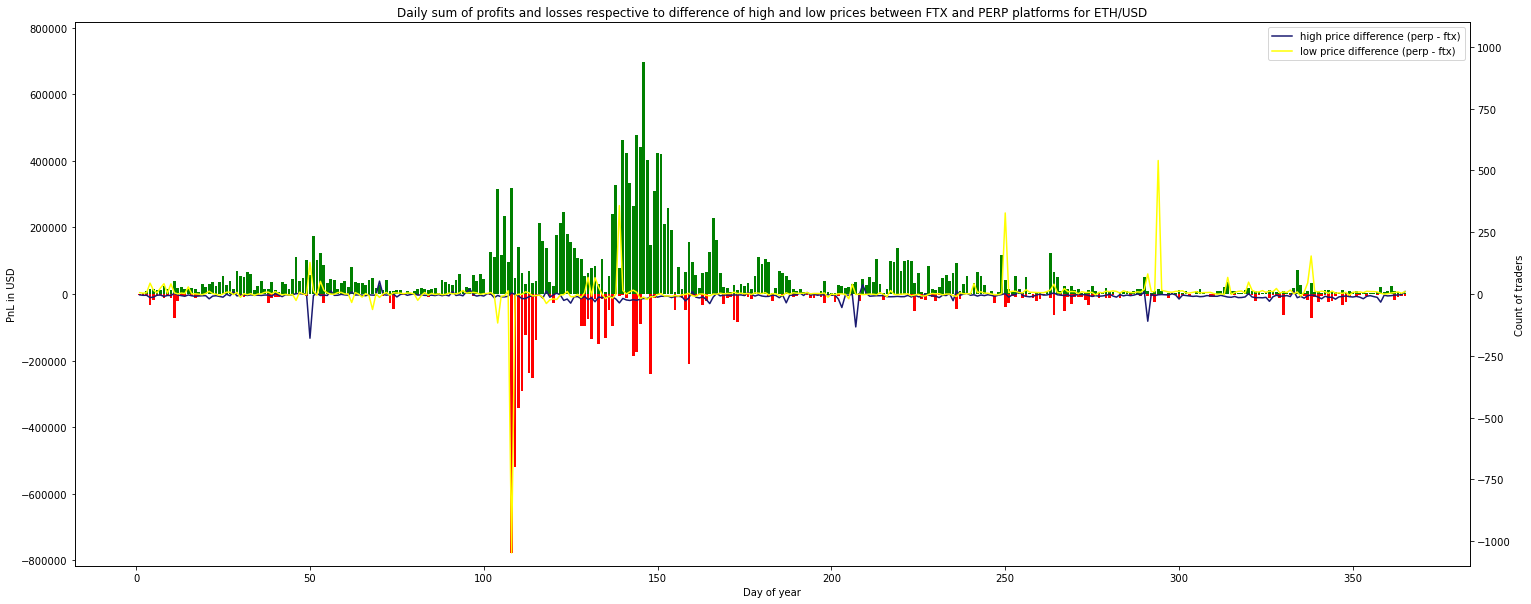

In [74]:
#       make a cumulative sum of profits and losses daily respective to the traders count by their profit or loss status
plot_cumulative_pnl_to_traders_counts(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "ETH/USDC"], "ETH")

#       make a cumulative sum of profits and losses daily respective to daily high and low price
plot_cumulative_pnl_to_high_and_low_price(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "ETH/USDC"], 
                                          ftx_eth_price_df, daily_high_low_price_for_eth, "ETH")

#       make a cumulative sum of profits and losses daily respective to daily mean price
plot_cumulative_pnl_to_mean_price(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "ETH/USDC"], 
                                  uniswap_eth_price_df, ftx_eth_price_df, daily_price_of_eth, "ETH")

#       make a cumulative sum of profits and losses daily respective to difference between high and low prices of PERP and FTX platforms
plot_cumulative_pnl_to_high_low_diff(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "ETH/USDC"], 
                                ftx_eth_price_df, daily_high_low_price_for_eth, "ETH")

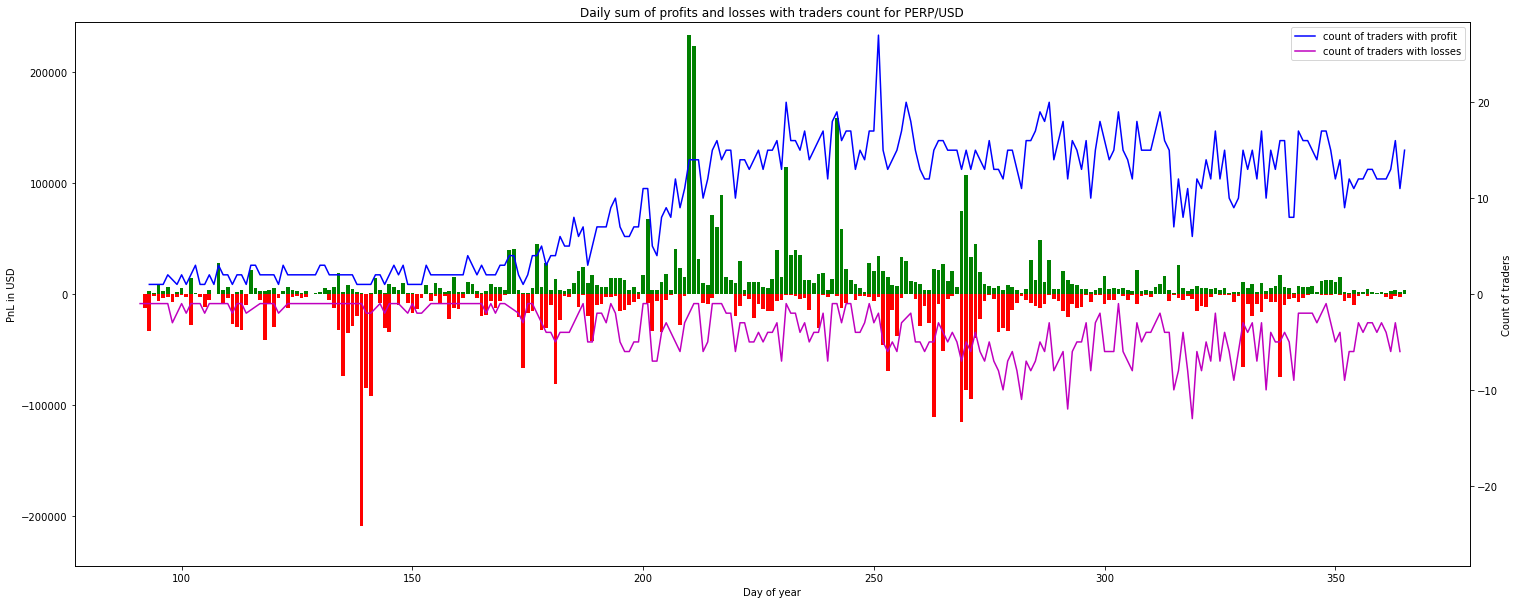

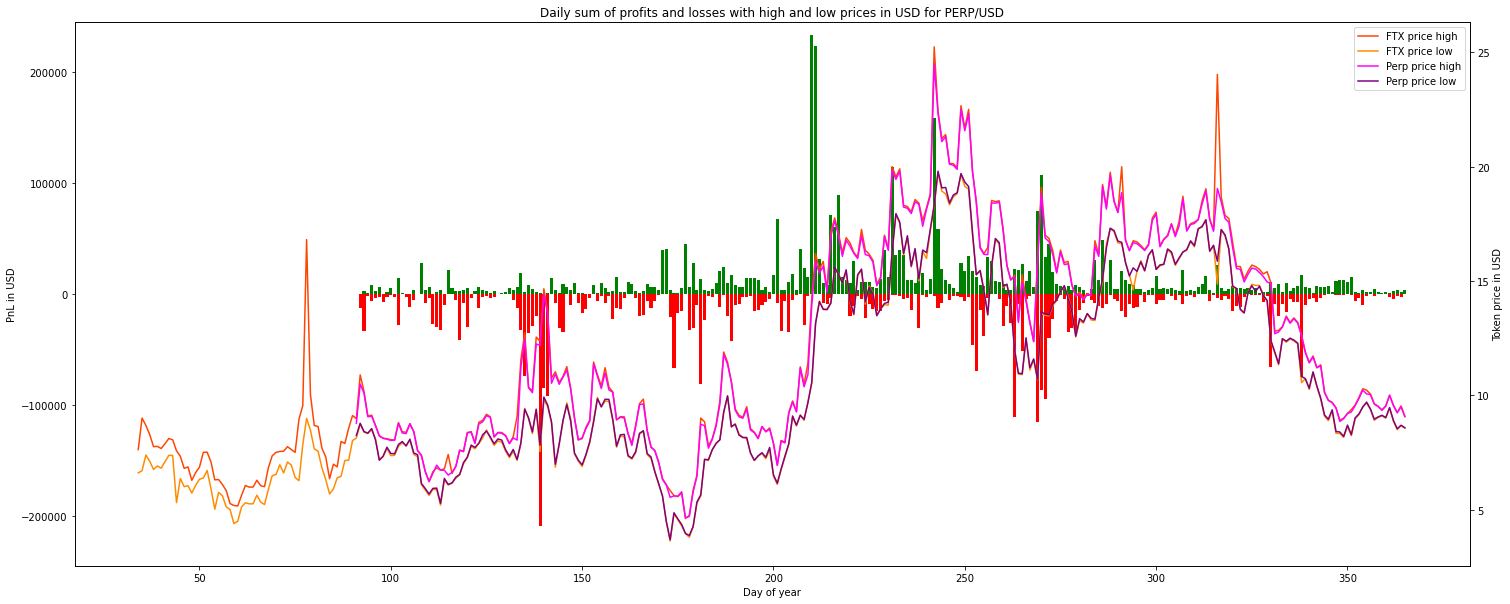

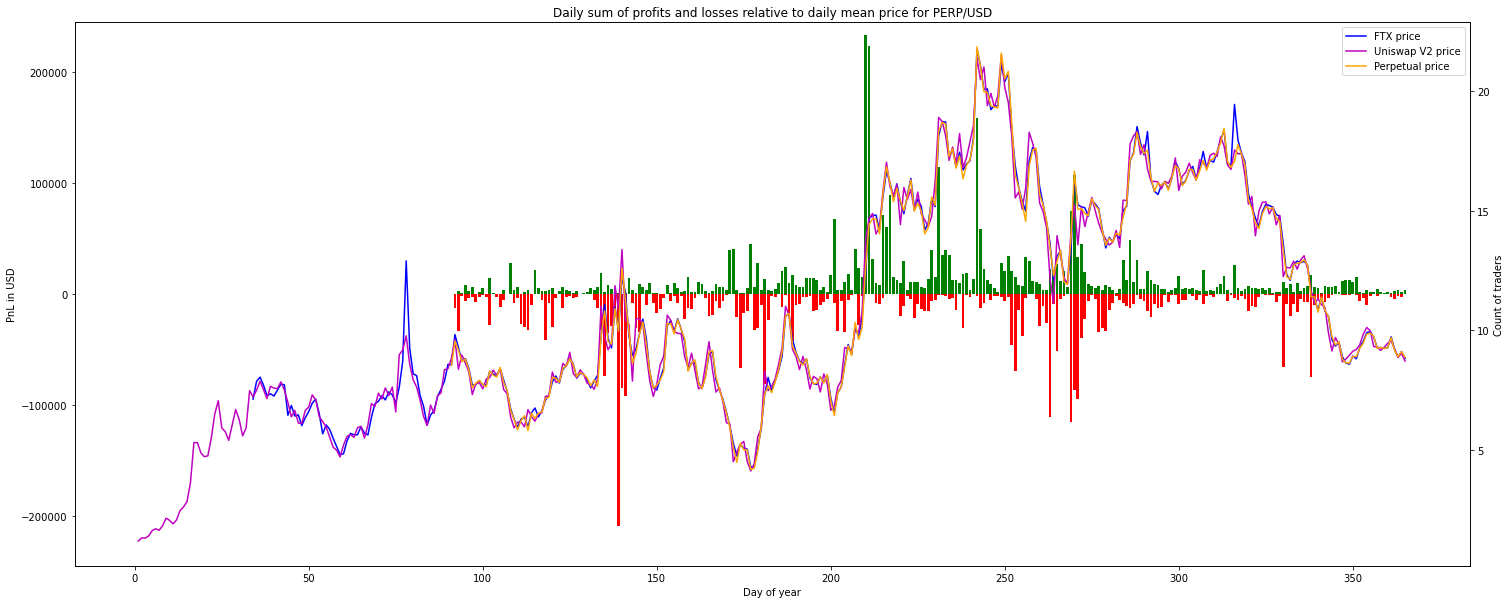

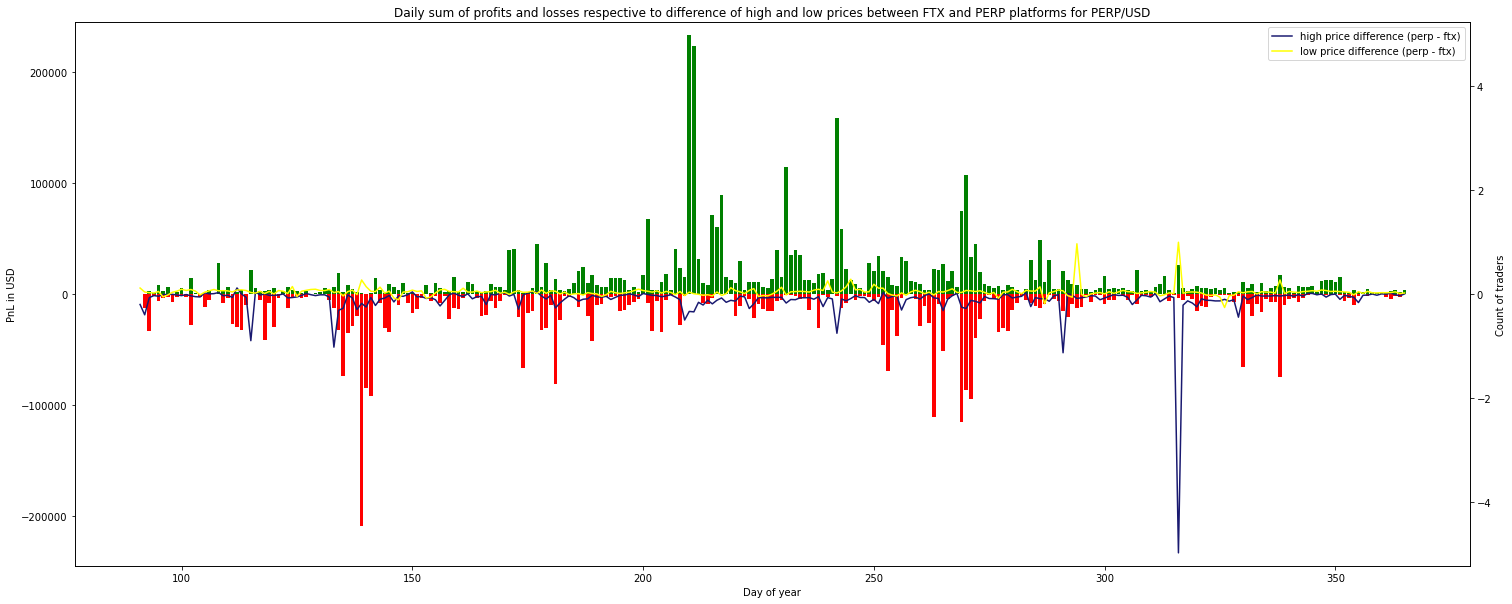

In [75]:
#       make a cumulative sum of profits and losses daily respective to the traders count by their profit or loss status
plot_cumulative_pnl_to_traders_counts(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "PERP/USDC"], "PERP")

#       make a cumulative sum of profits and losses daily respective to daily high and low price
plot_cumulative_pnl_to_high_and_low_price(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "PERP/USDC"], 
                                          ftx_perp_price_df, daily_high_low_price_for_perp, "PERP")

#       make a cumulative sum of profits and losses daily respective to daily mean price
plot_cumulative_pnl_to_mean_price(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "PERP/USDC"], 
                                  uniswap_perp_price_df, ftx_perp_price_df, daily_price_of_perp, "PERP")

#       make a cumulative sum of profits and losses daily respective to difference between high and low prices of PERP and FTX platforms
plot_cumulative_pnl_to_high_low_diff(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "PERP/USDC"], 
                                ftx_perp_price_df[ftx_perp_price_df.index > 90], daily_high_low_price_for_perp, "PERP")

# Work with the most active bots in the Perpetual

In [76]:
possible_bots_stats_df = trader_stats_df[(trader_stats_df["seconds_per_tx"] < 70) &
                                         (trader_stats_df["activity_in_seconds"] > 259200)]
possible_bots_stats_df

trader  AAVE/USDC  ALPHA/USDC  \
1046  0x1a48776f436bcdaa16845a378666cf4ba131eb0f          1           1   
1287  0x1fff09ff1ce7c78bea4f46b1a4b2fa1d50439ee8          1           0   
6651  0xa7b6679232241b3a8cb819faeed876f3fe10d50b          1           1   

      BTC/USDC  COMP/USDC  CREAM/USDC  CRV/USDC  DOT/USDC  ETH/USDC  FTT/USDC  \
1046         1          1           1         1         1         1         1   
1287         1          1           0         1         1         1         0   
6651         0          1           1         1         1         1         1   

      ...  SUSHI/USDC  UNI/USDC  YFI/USDC  unknown  occurencies_sum  \
1046  ...           1         1         1        1               19   
1287  ...           1         1         1        0               14   
6651  ...           1         1         0        0               16   

      tx_frequency  seconds_per_tx  first_time   last_time  \
1046      0.020749       48.194401  1607915765  1649762530   
1287      0.019656       50.874344  1618815230  1626755545   
6651      0.017390       57.503192  1625711085  1649938100   

      activity_in_seconds  
1046             41846765  
1287              7940315  
6651             24227015  

[3 rows x 26 columns]

In [77]:
changes_opens_closes_2021_df = changes_opens_closes_2021_df[changes_opens_closes_2021_df["trader"].isin(possible_bots_stats_df["trader"])]

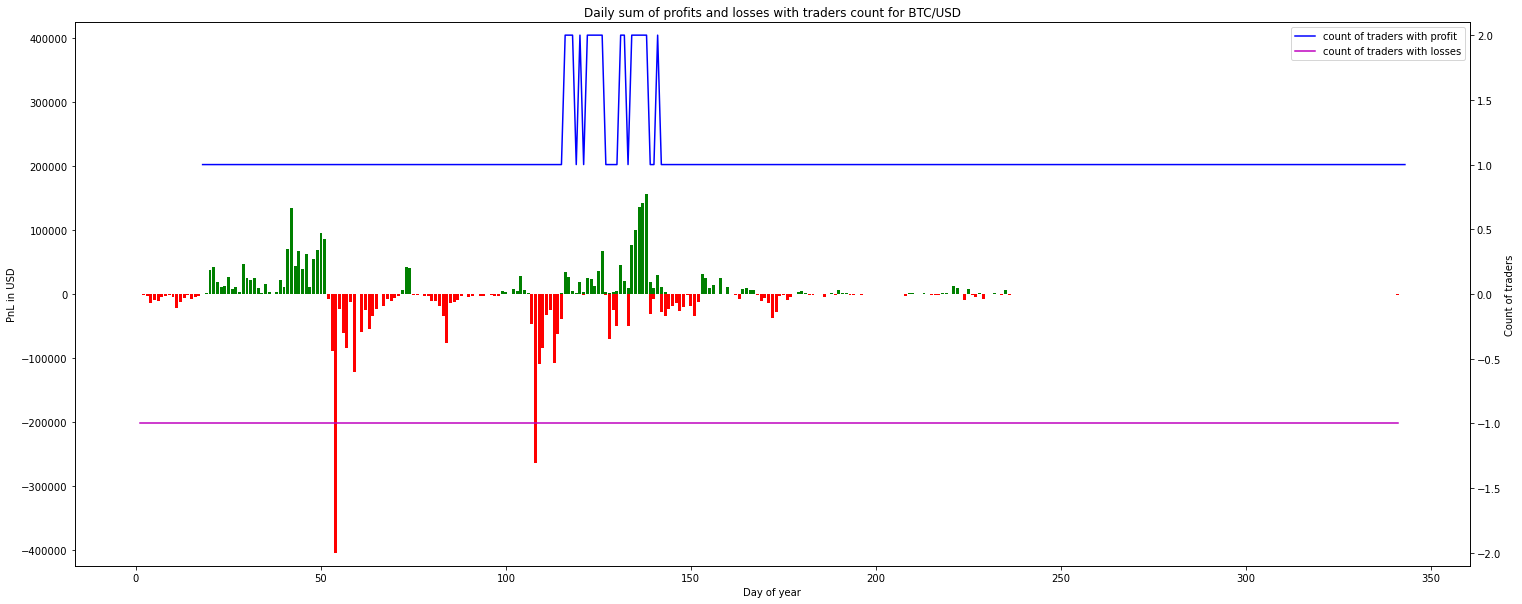

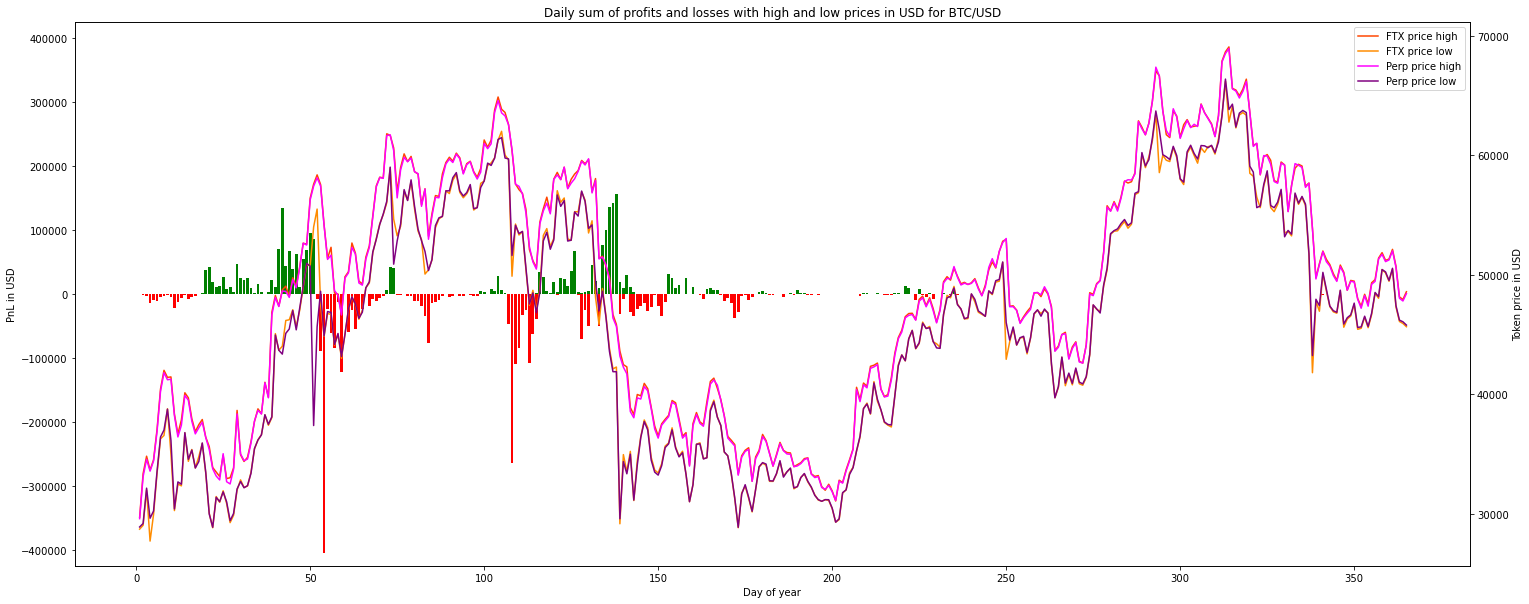

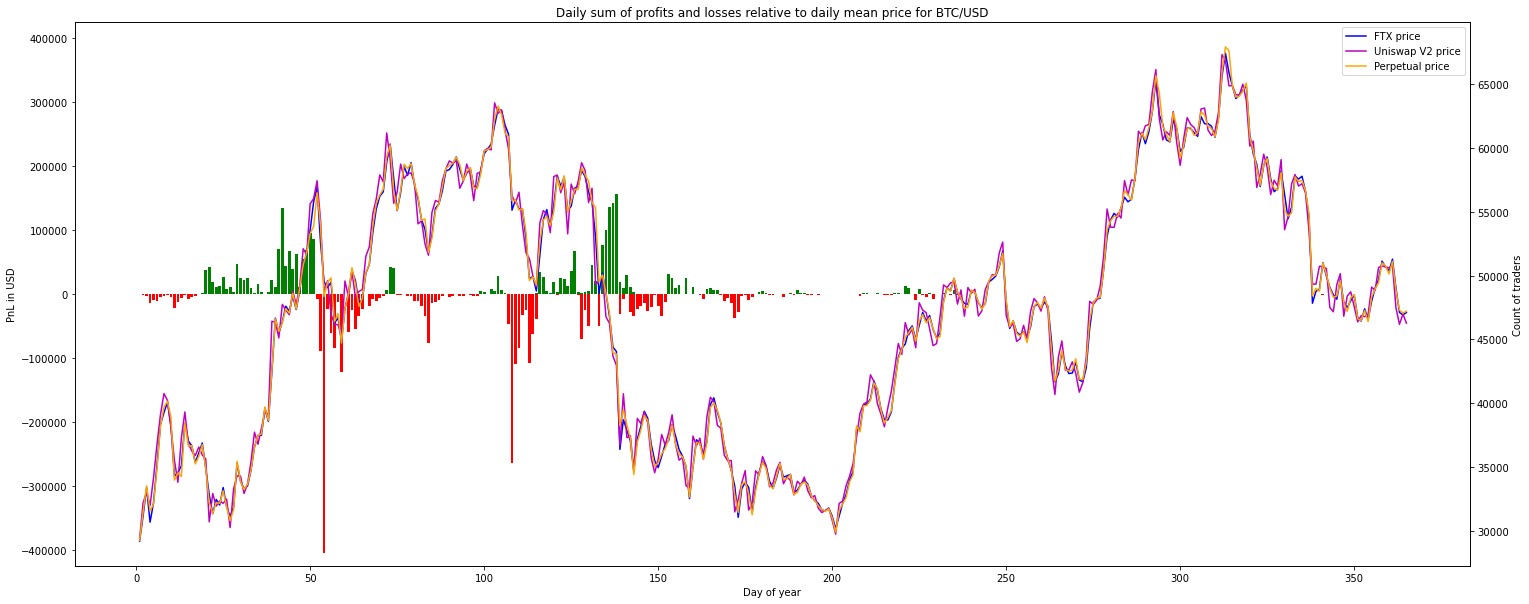

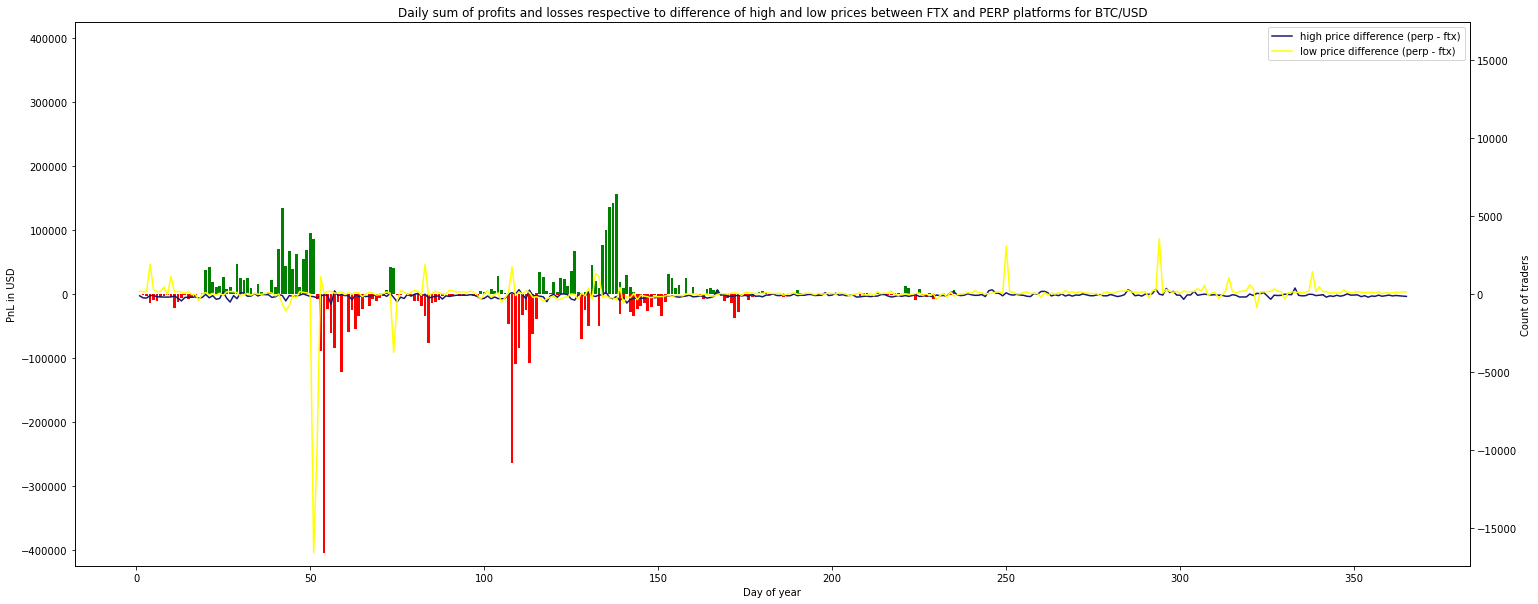

In [78]:
#       make a cumulative sum of profits and losses daily respective to the traders count by their profit or loss status
plot_cumulative_pnl_to_traders_counts(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "BTC/USDC"], "BTC")

#       make a cumulative sum of profits and losses daily respective to daily high and low price
plot_cumulative_pnl_to_high_and_low_price(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "BTC/USDC"], 
                                          ftx_btc_price_df, daily_high_low_price_for_btc, "BTC")

#       make a cumulative sum of profits and losses daily respective to daily mean price
plot_cumulative_pnl_to_mean_price(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "BTC/USDC"], 
                                  uniswap_btc_price_df, ftx_btc_price_df, daily_price_of_btc, "BTC")

#       make a cumulative sum of profits and losses daily respective to difference between high and low prices of PERP and FTX platforms
plot_cumulative_pnl_to_high_low_diff(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "BTC/USDC"], 
                                ftx_btc_price_df, daily_high_low_price_for_btc, "BTC")

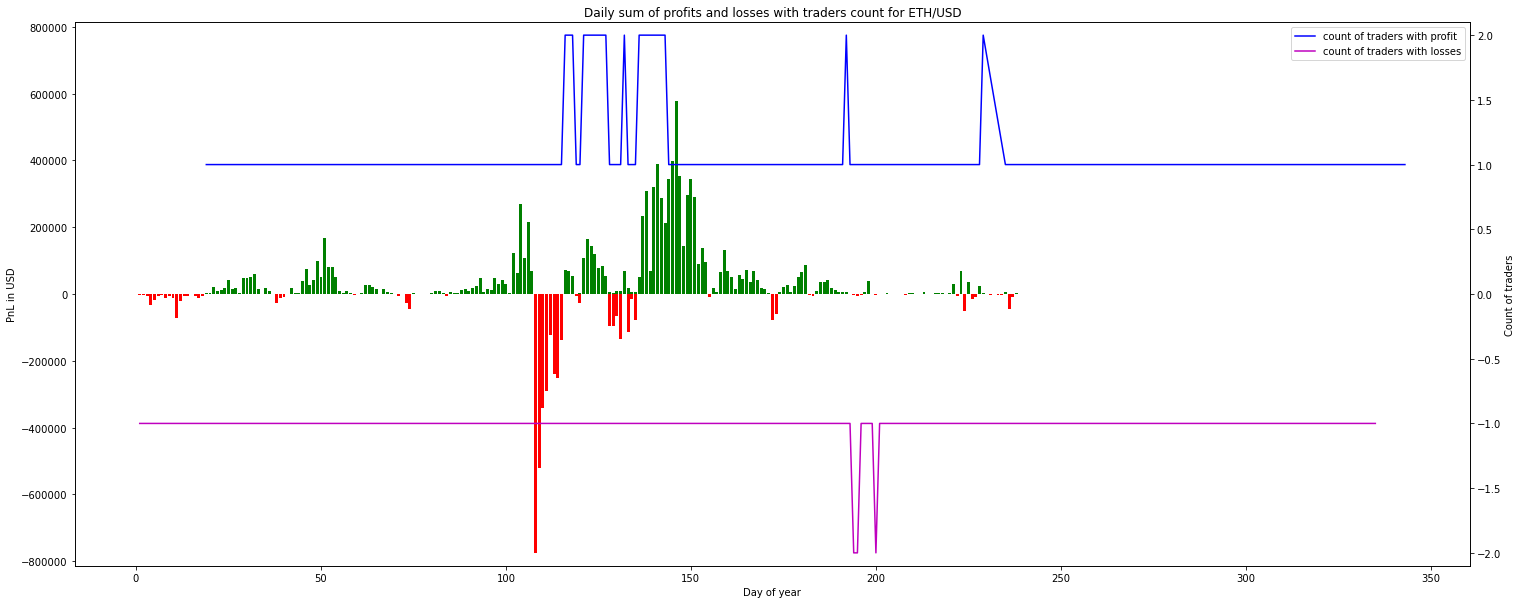

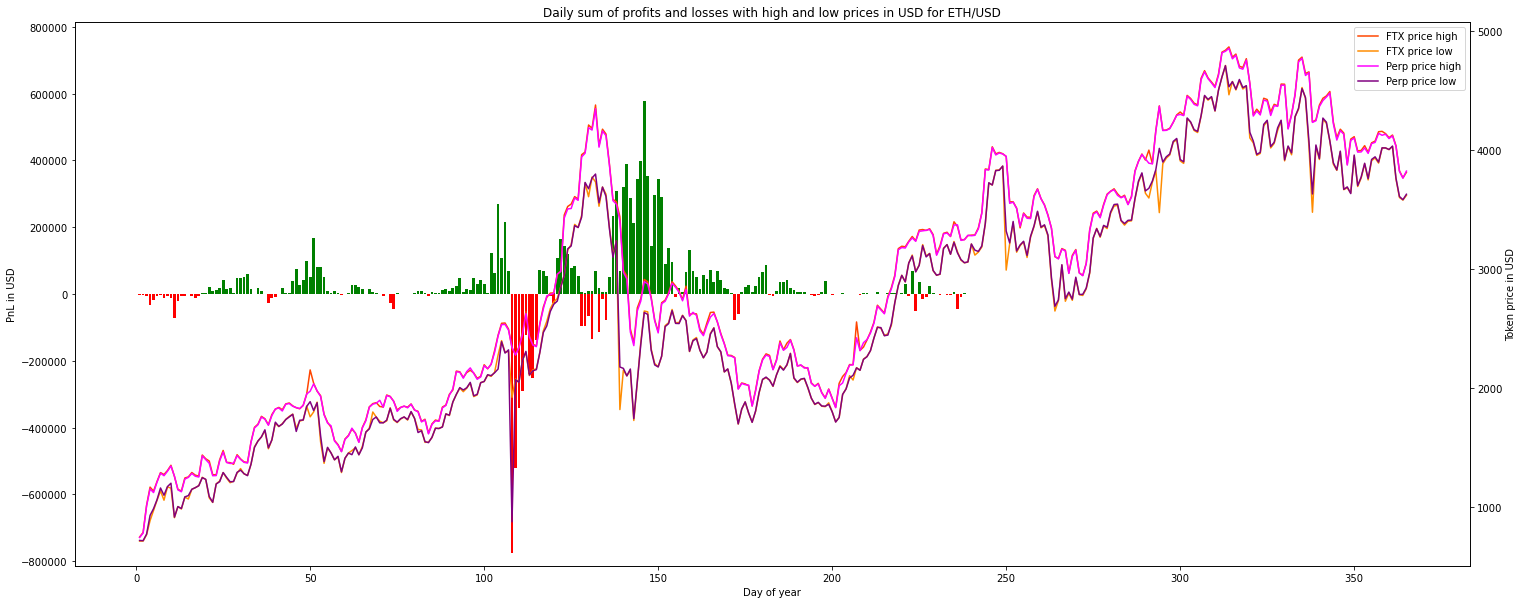

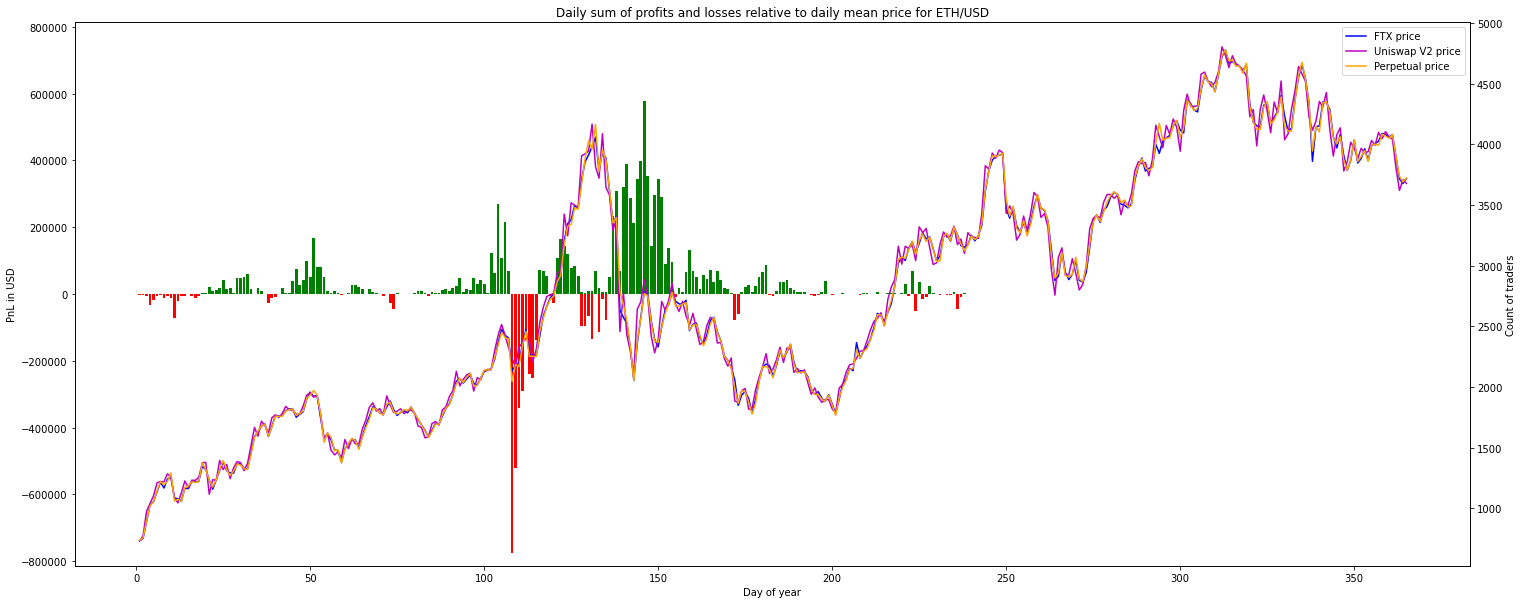

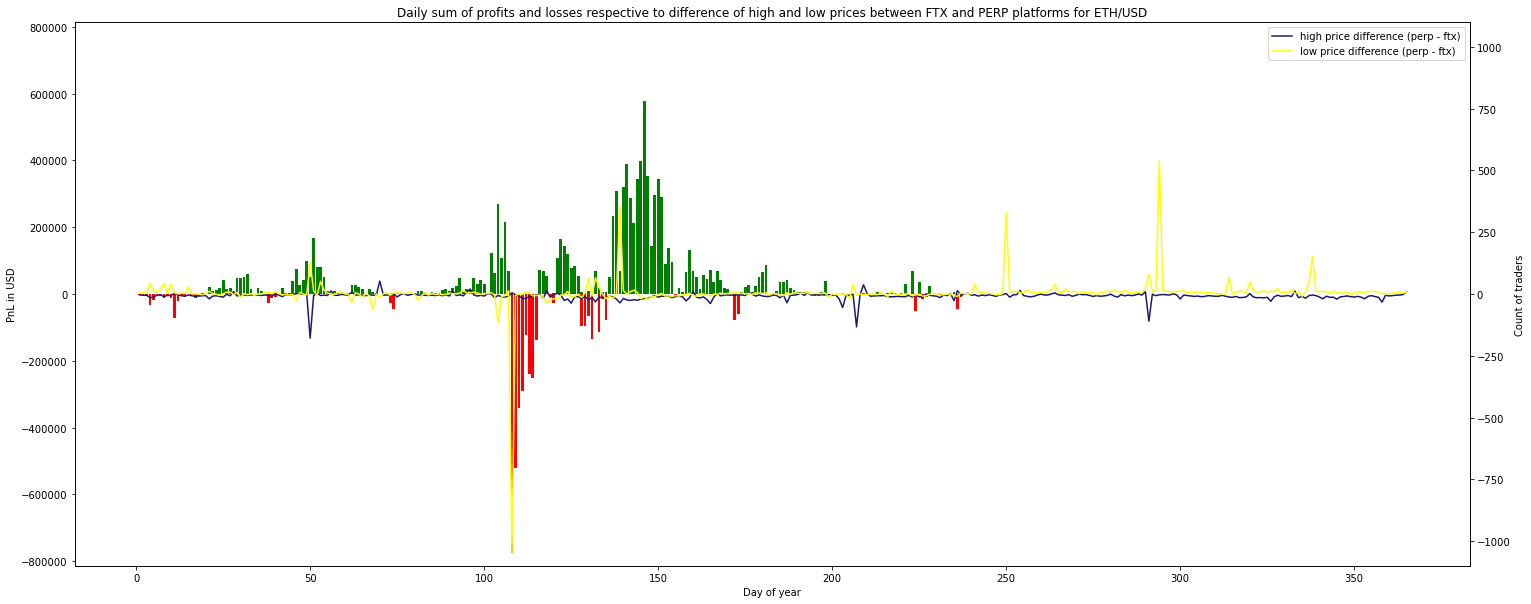

In [79]:
#       make a cumulative sum of profits and losses daily respective to the traders count by their profit or loss status
plot_cumulative_pnl_to_traders_counts(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "ETH/USDC"], "ETH")

#       make a cumulative sum of profits and losses daily respective to daily high and low price
plot_cumulative_pnl_to_high_and_low_price(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "ETH/USDC"], 
                                          ftx_eth_price_df, daily_high_low_price_for_eth, "ETH")

#       make a cumulative sum of profits and losses daily respective to daily mean price
plot_cumulative_pnl_to_mean_price(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "ETH/USDC"], 
                                  uniswap_eth_price_df, ftx_eth_price_df, daily_price_of_eth, "ETH")

#       make a cumulative sum of profits and losses daily respective to difference between high and low prices of PERP and FTX platforms
plot_cumulative_pnl_to_high_low_diff(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "ETH/USDC"], 
                                ftx_eth_price_df, daily_high_low_price_for_eth, "ETH")

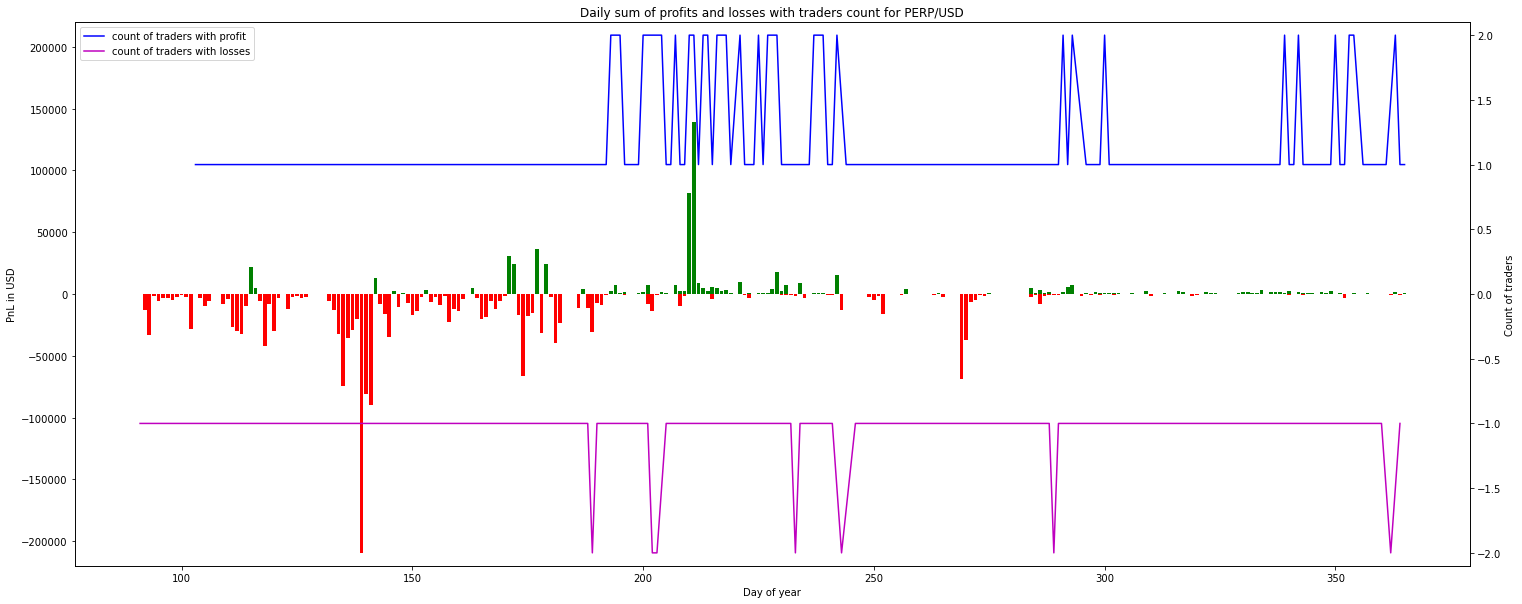

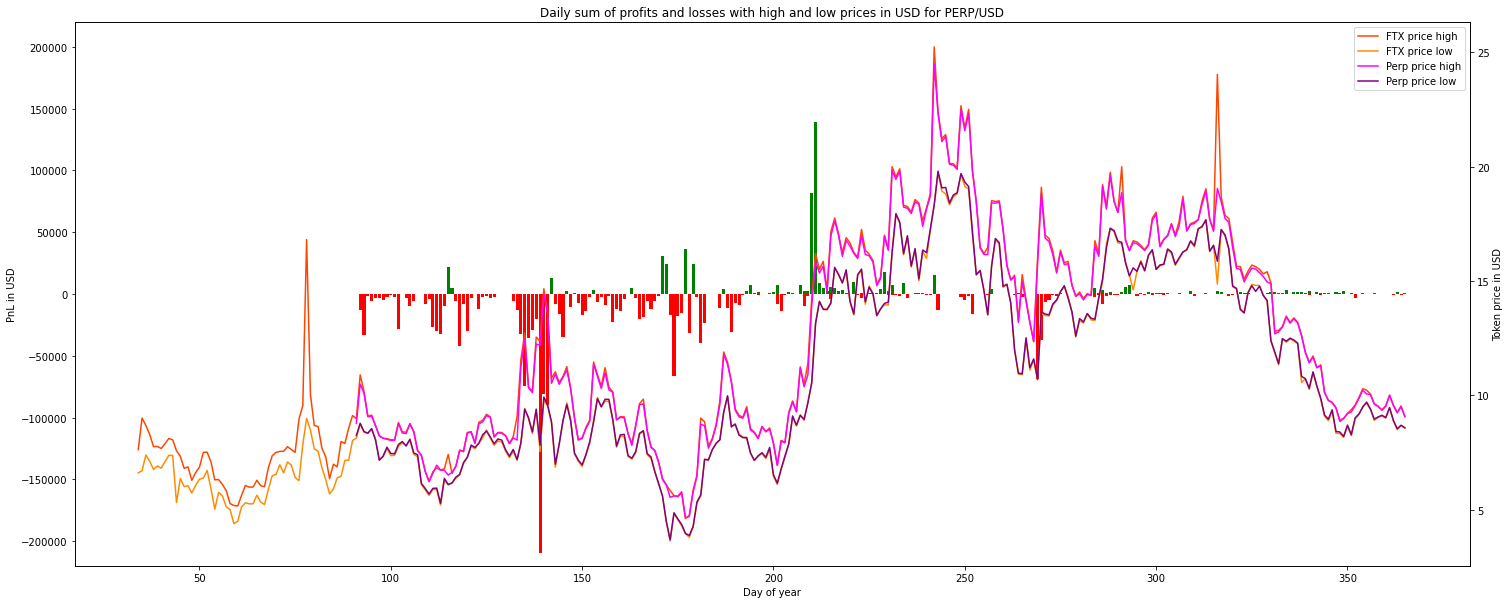

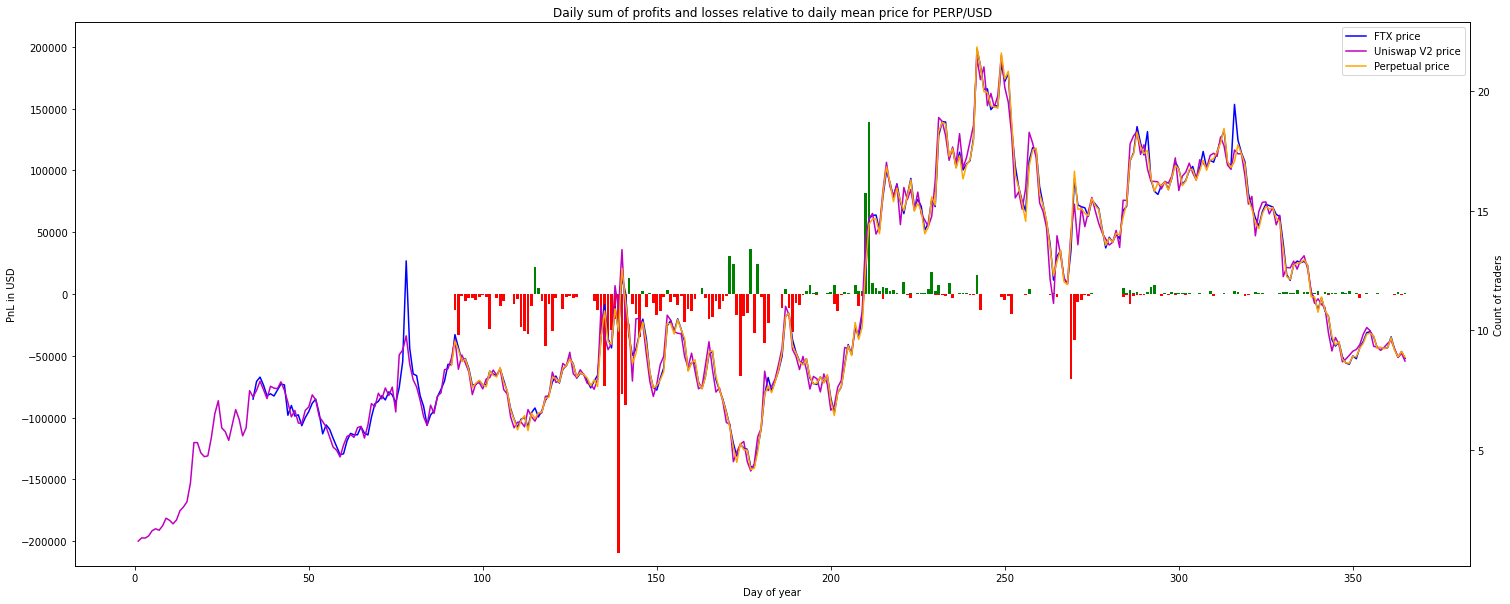

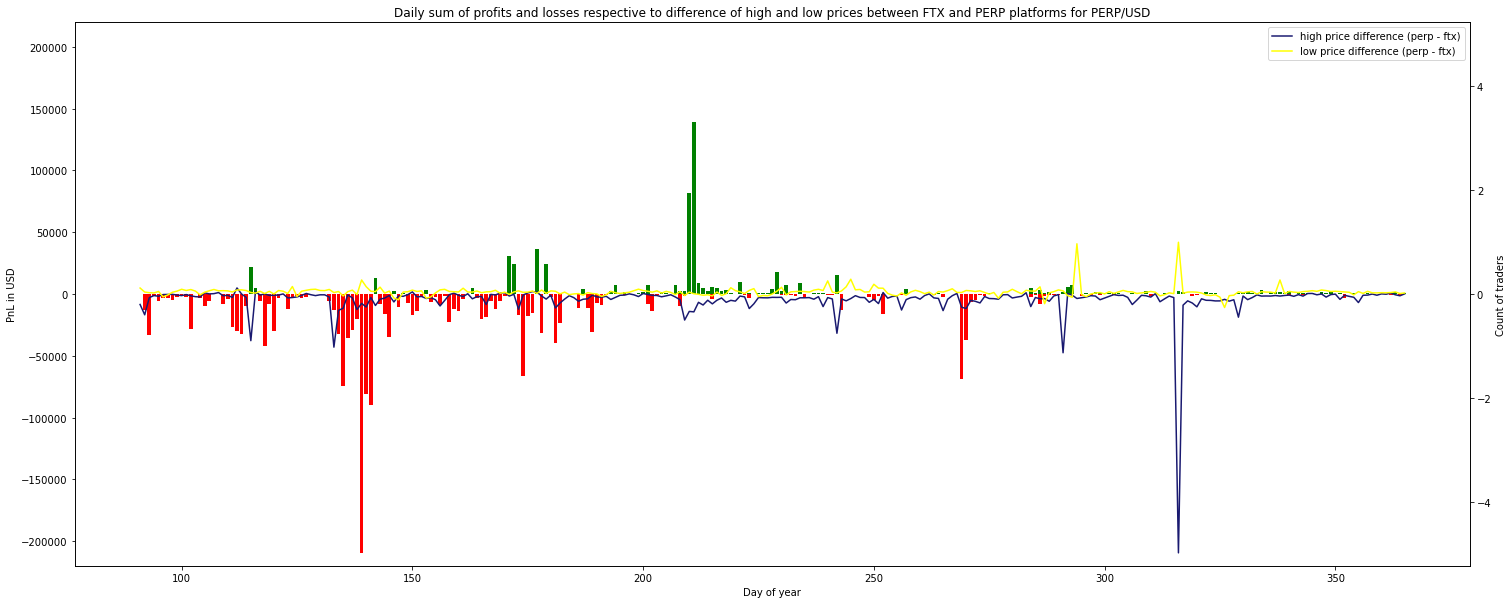

In [80]:
#       make a cumulative sum of profits and losses daily respective to the traders count by their profit or loss status
plot_cumulative_pnl_to_traders_counts(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "PERP/USDC"], "PERP")

#       make a cumulative sum of profits and losses daily respective to daily high and low price
plot_cumulative_pnl_to_high_and_low_price(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "PERP/USDC"], 
                                          ftx_perp_price_df, daily_high_low_price_for_perp, "PERP")

#       make a cumulative sum of profits and losses daily respective to daily mean price
plot_cumulative_pnl_to_mean_price(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "PERP/USDC"], 
                                  uniswap_perp_price_df, ftx_perp_price_df, daily_price_of_perp, "PERP")

#       make a cumulative sum of profits and losses daily respective to difference between high and low prices of PERP and FTX platforms
plot_cumulative_pnl_to_high_low_diff(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "PERP/USDC"], 
                                ftx_perp_price_df[ftx_perp_price_df.index > 90], daily_high_low_price_for_perp, "PERP")

# Work with biggest profiters of 2021

In [81]:
changes_opens_closes_df["time"] = pd.to_datetime(changes_opens_closes_df["timestamp"], unit='s')
changes_opens_closes_2021_df = changes_opens_closes_df[(changes_opens_closes_df["time"] <= datetime(2021, 12, 31, 23, 59, 59)) &
                                                       (changes_opens_closes_df["time"] >= datetime(2021, 1, 1, 0, 0, 0))]
changes_opens_closes_2021_df["day_of_year"] = changes_opens_closes_2021_df["time"].dt.dayofyear

<ipython-input-81-e4ae3f39bd5a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  changes_opens_closes_2021_df["day_of_year"] = changes_opens_closes_2021_df["time"].dt.dayofyear


In [82]:
profiters = changes_opens_closes_2021_df.groupby(by="trader").sum().sort_values(by='realized_pnl').tail(10)

In [83]:
changes_opens_closes_2021_df = changes_opens_closes_2021_df[changes_opens_closes_2021_df["trader"].isin(profiters.index)]

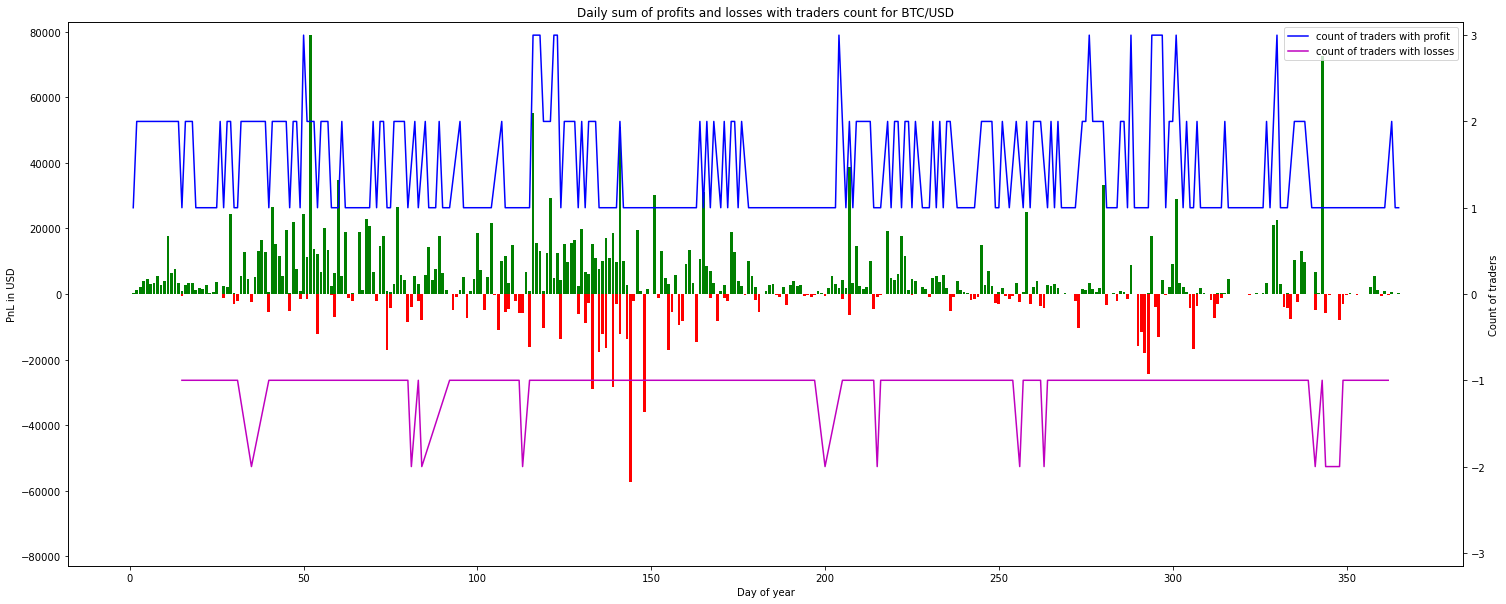

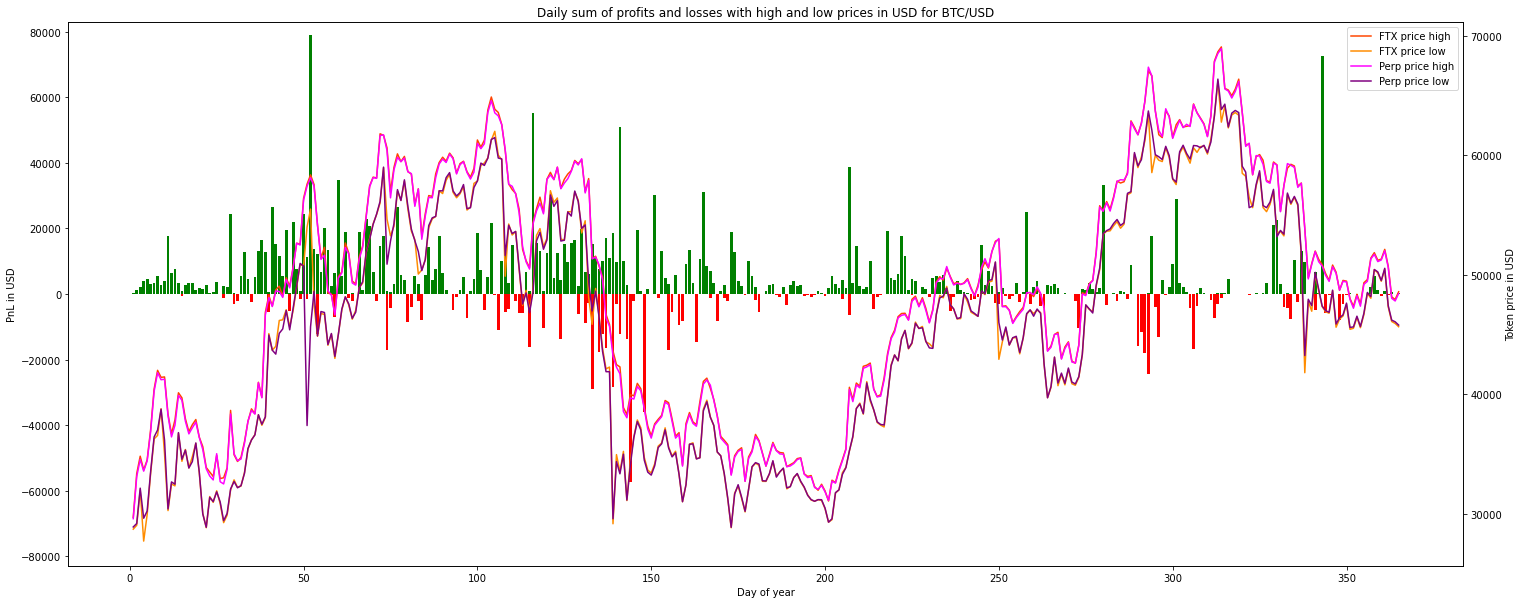

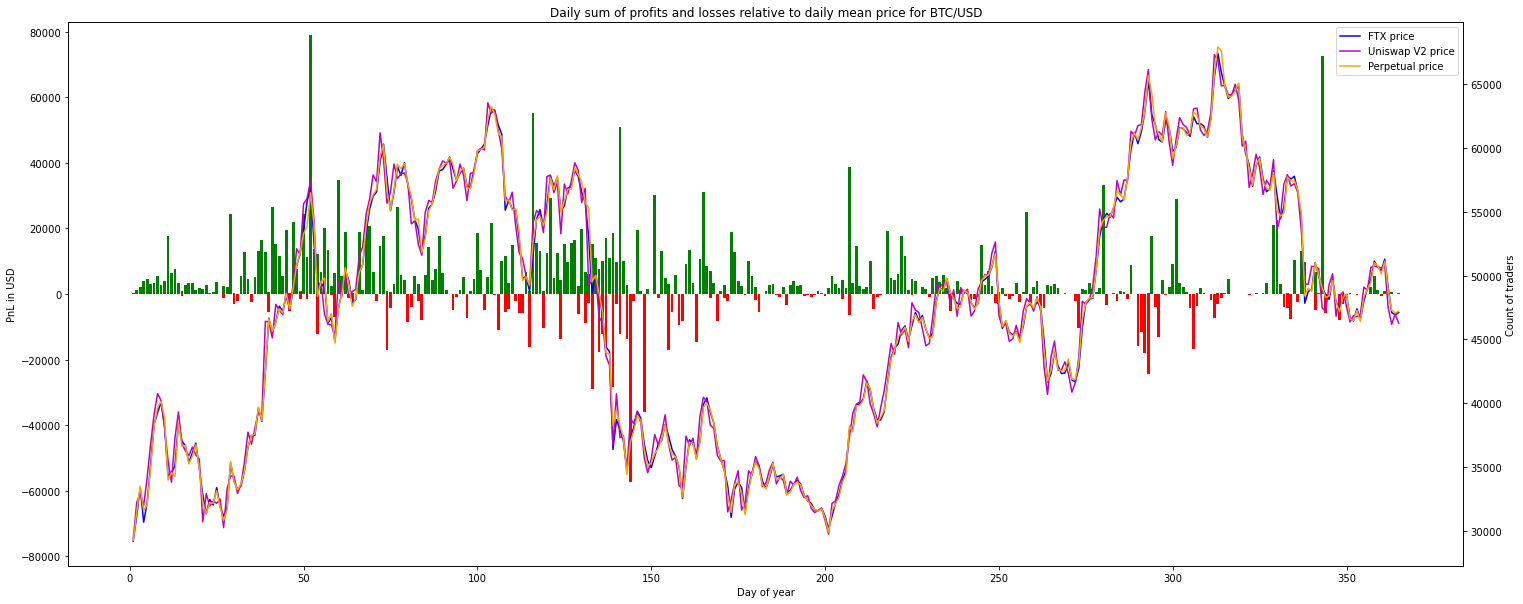

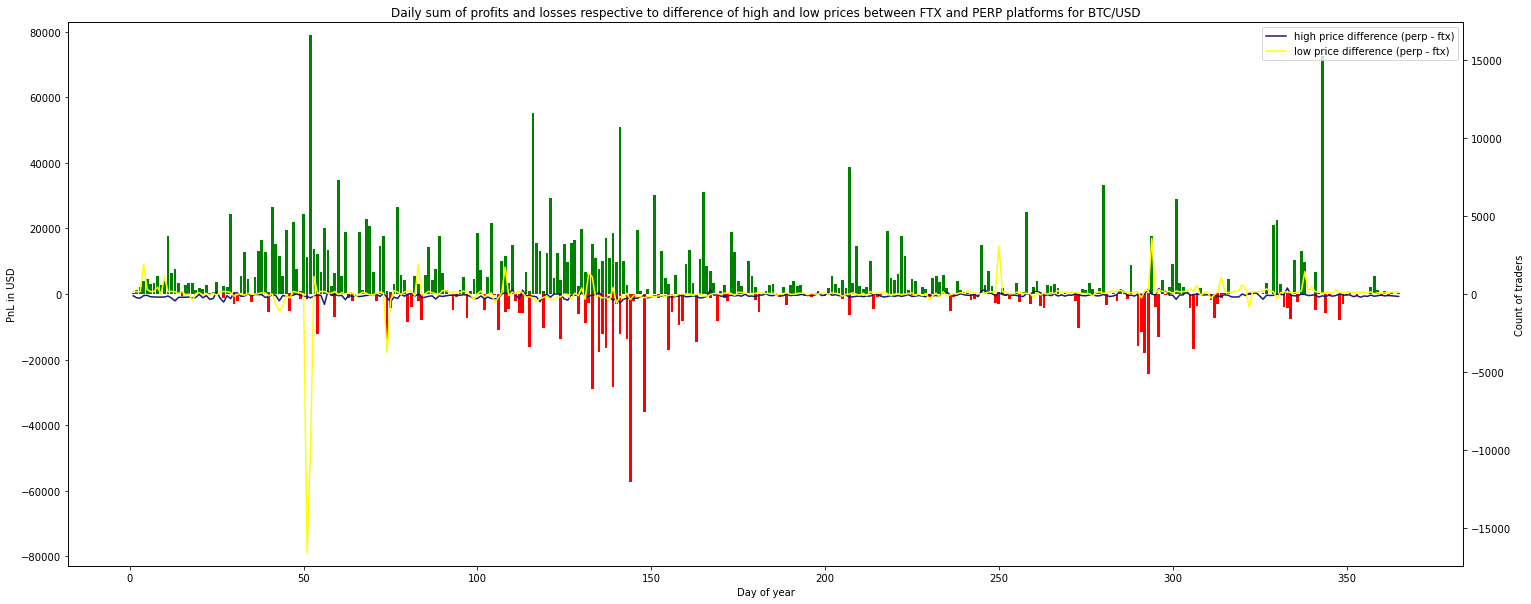

In [84]:
#       make a cumulative sum of profits and losses daily respective to the traders count by their profit or loss status
plot_cumulative_pnl_to_traders_counts(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "BTC/USDC"], "BTC")

#       make a cumulative sum of profits and losses daily respective to daily high and low price
plot_cumulative_pnl_to_high_and_low_price(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "BTC/USDC"], 
                                          ftx_btc_price_df, daily_high_low_price_for_btc, "BTC")

#       make a cumulative sum of profits and losses daily respective to daily mean price
plot_cumulative_pnl_to_mean_price(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "BTC/USDC"], 
                                  uniswap_btc_price_df, ftx_btc_price_df, daily_price_of_btc, "BTC")

#       make a cumulative sum of profits and losses daily respective to difference between high and low prices of PERP and FTX platforms
plot_cumulative_pnl_to_high_low_diff(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "BTC/USDC"], 
                                ftx_btc_price_df, daily_high_low_price_for_btc, "BTC")

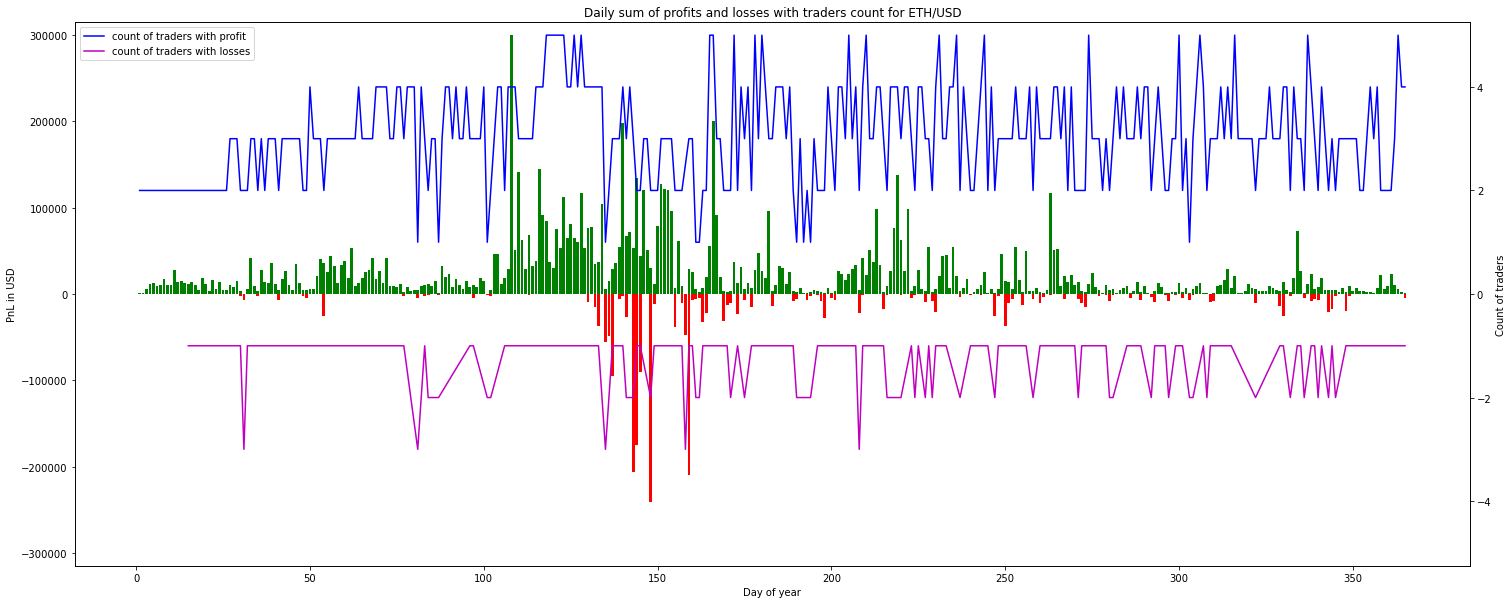

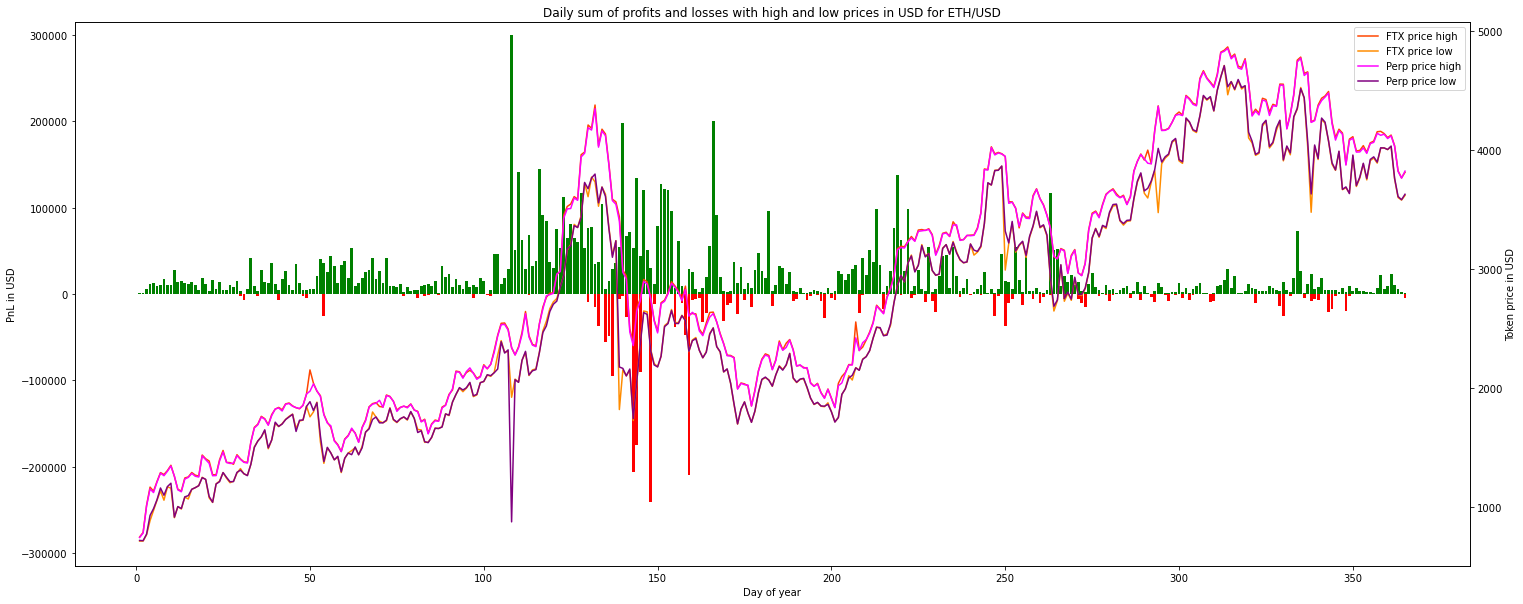

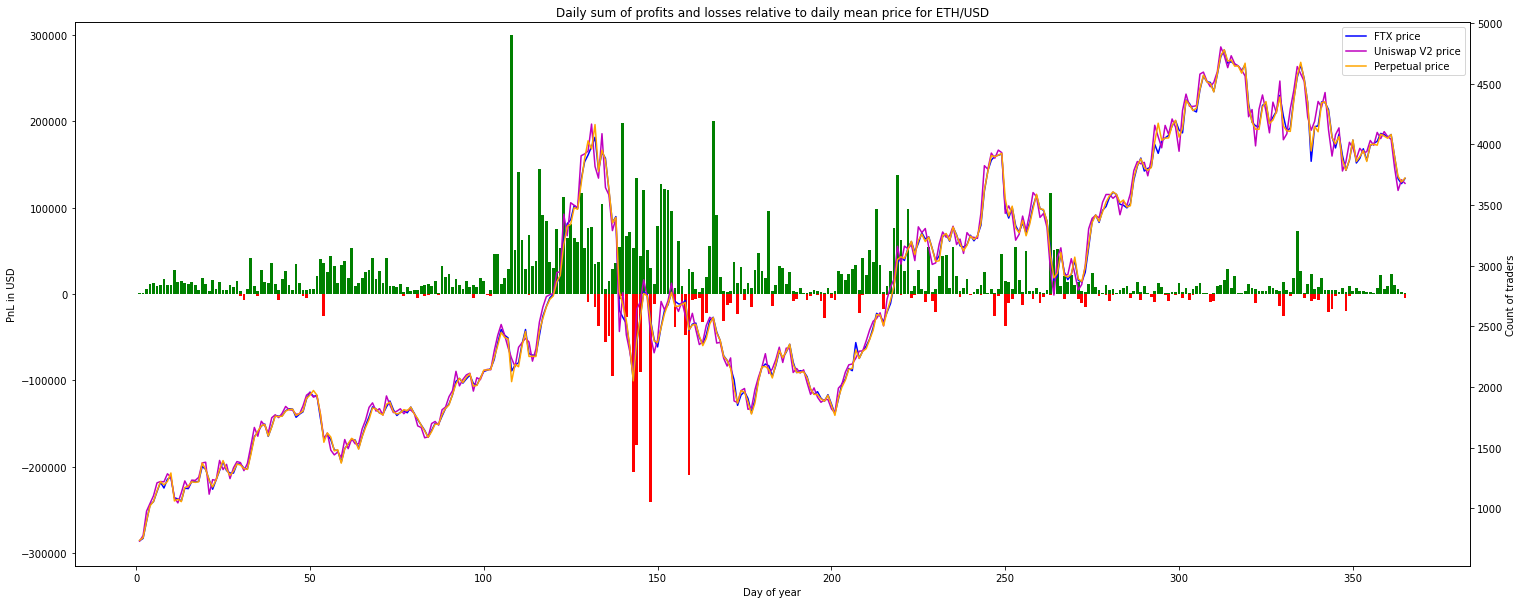

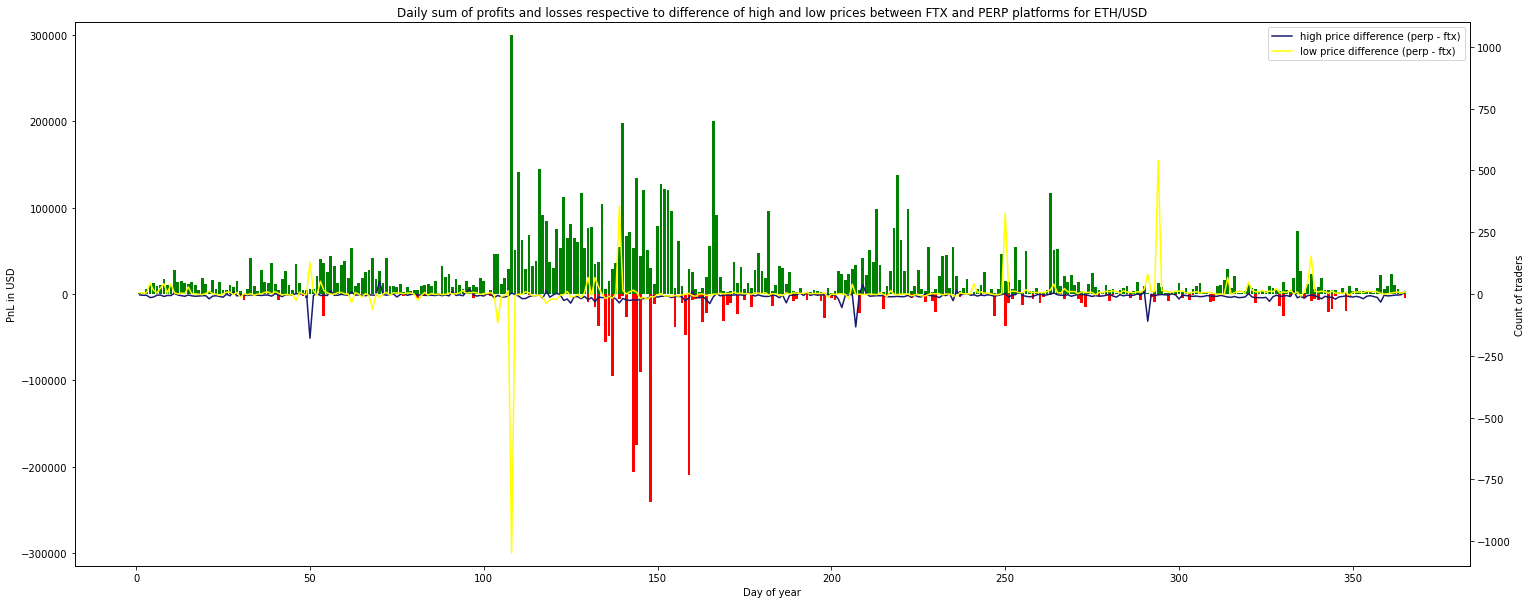

In [85]:
#       make a cumulative sum of profits and losses daily respective to the traders count by their profit or loss status
plot_cumulative_pnl_to_traders_counts(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "ETH/USDC"], "ETH")

#       make a cumulative sum of profits and losses daily respective to daily high and low price
plot_cumulative_pnl_to_high_and_low_price(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "ETH/USDC"], 
                                          ftx_eth_price_df, daily_high_low_price_for_eth, "ETH")

#       make a cumulative sum of profits and losses daily respective to daily mean price
plot_cumulative_pnl_to_mean_price(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "ETH/USDC"], 
                                  uniswap_eth_price_df, ftx_eth_price_df, daily_price_of_eth, "ETH")

#       make a cumulative sum of profits and losses daily respective to difference between high and low prices of PERP and FTX platforms
plot_cumulative_pnl_to_high_low_diff(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "ETH/USDC"], 
                                ftx_eth_price_df, daily_high_low_price_for_eth, "ETH")

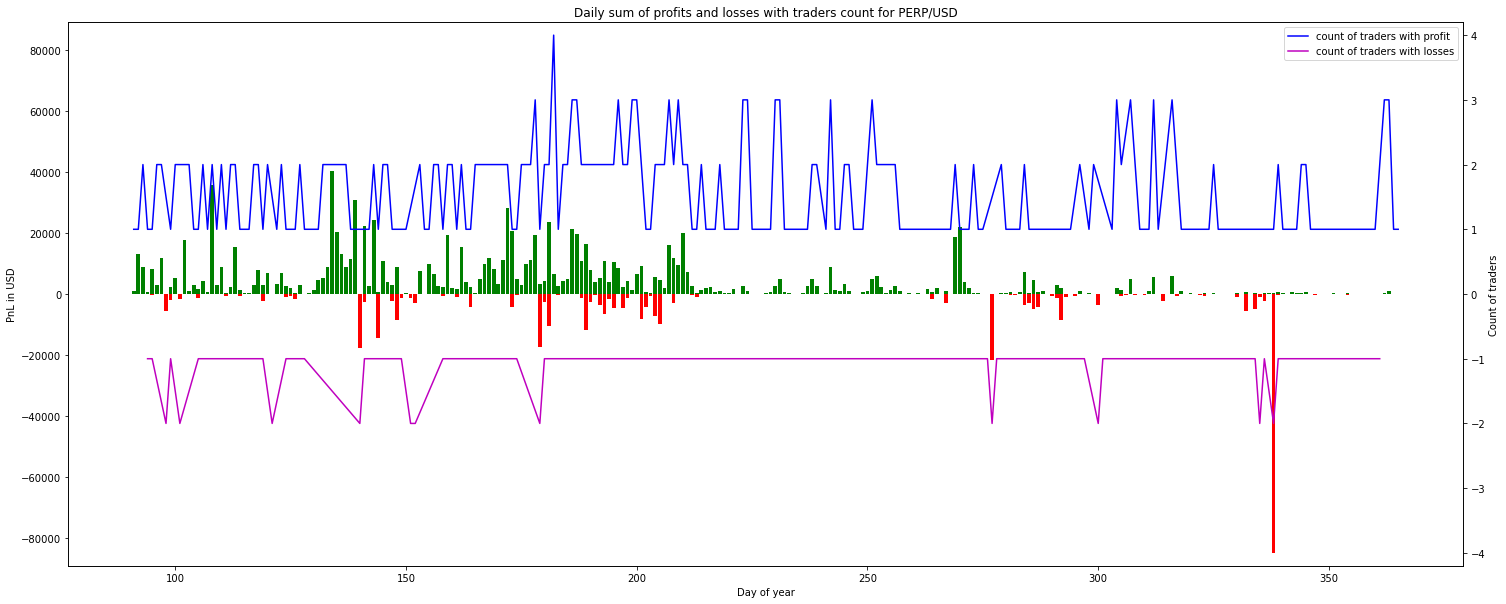

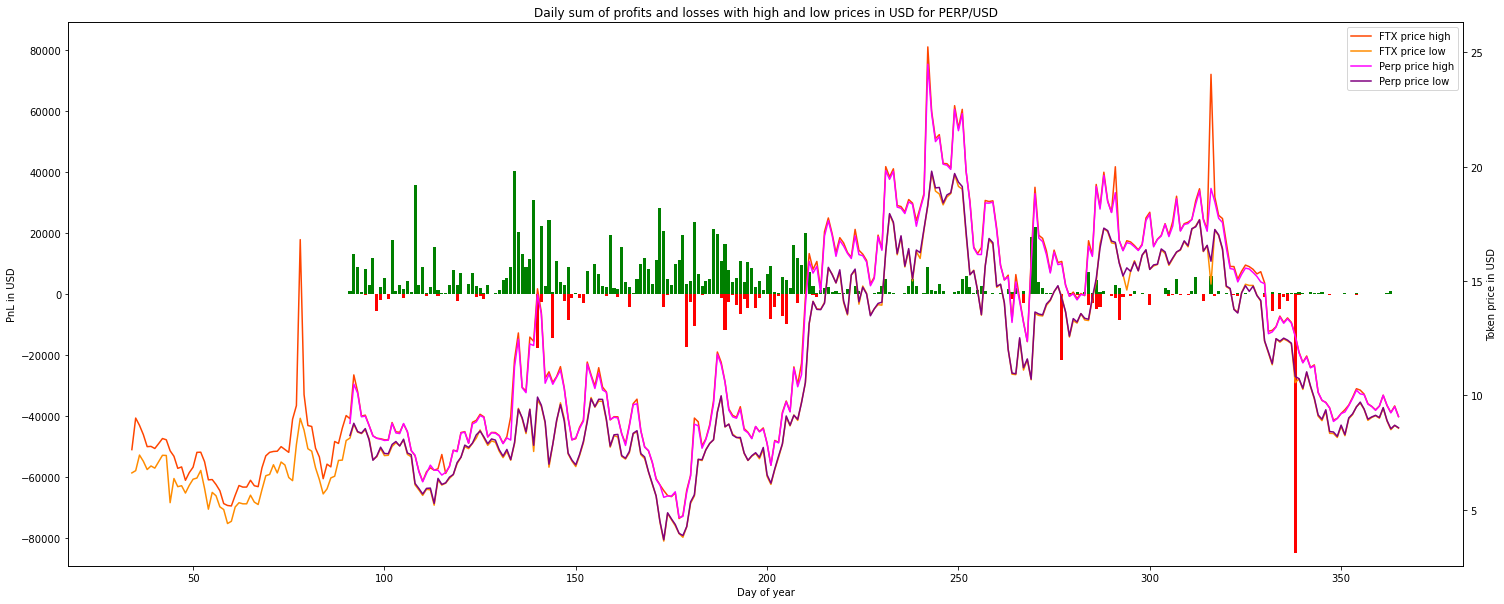

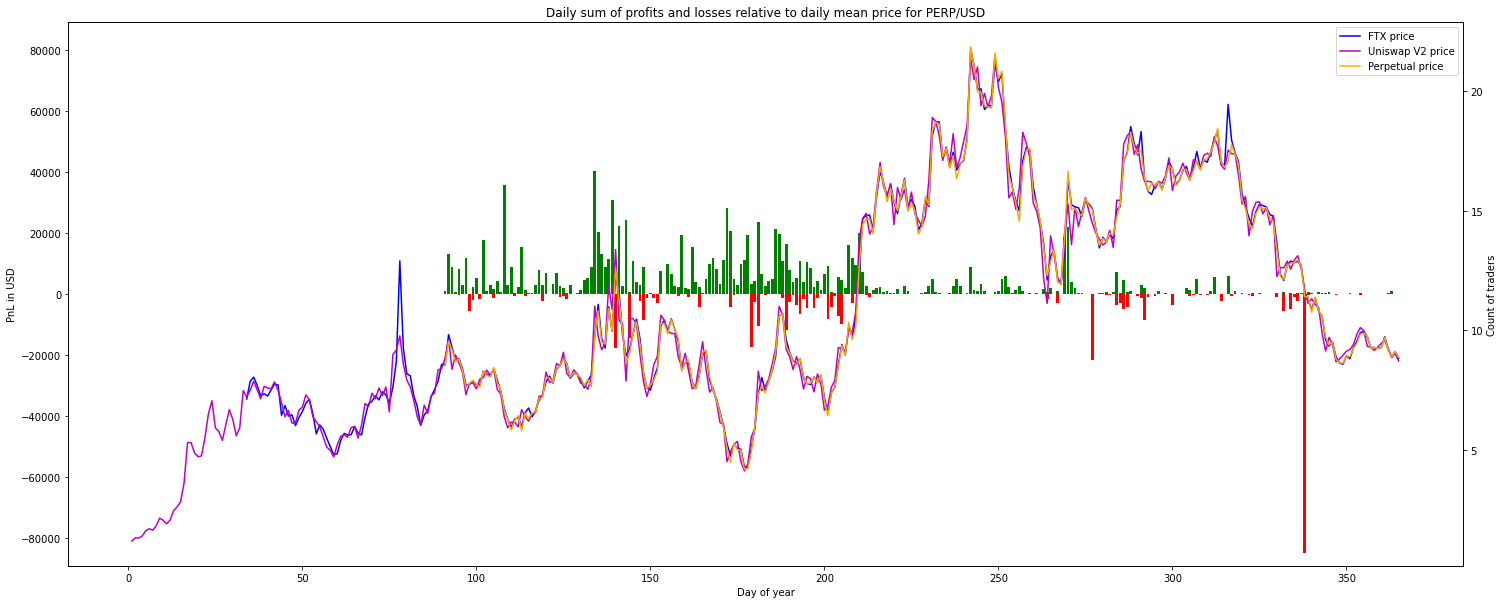

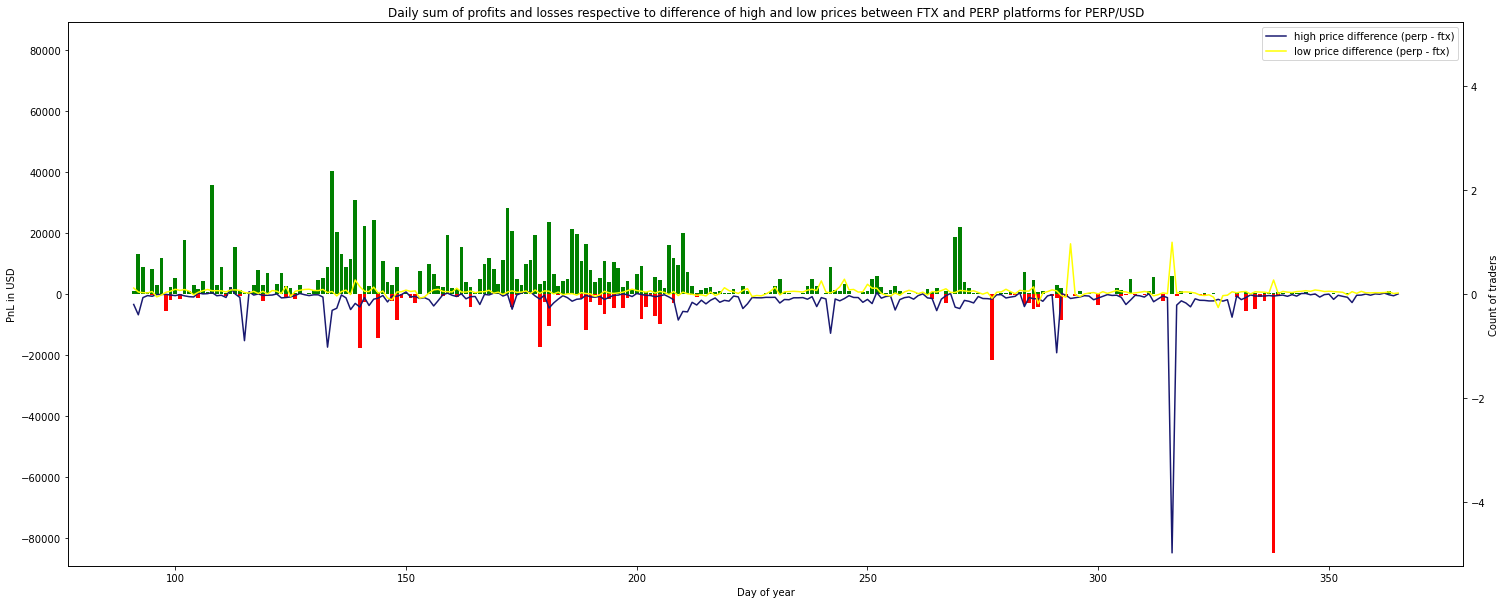

In [86]:
#       make a cumulative sum of profits and losses daily respective to the traders count by their profit or loss status
plot_cumulative_pnl_to_traders_counts(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "PERP/USDC"], "PERP")

#       make a cumulative sum of profits and losses daily respective to daily high and low price
plot_cumulative_pnl_to_high_and_low_price(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "PERP/USDC"], 
                                          ftx_perp_price_df, daily_high_low_price_for_perp, "PERP")

#       make a cumulative sum of profits and losses daily respective to daily mean price
plot_cumulative_pnl_to_mean_price(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "PERP/USDC"], 
                                  uniswap_perp_price_df, ftx_perp_price_df, daily_price_of_perp, "PERP")

#       make a cumulative sum of profits and losses daily respective to difference between high and low prices of PERP and FTX platforms
plot_cumulative_pnl_to_high_low_diff(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "PERP/USDC"], 
                                ftx_perp_price_df[ftx_perp_price_df.index > 90], daily_high_low_price_for_perp, "PERP")

# Work with biggest lossers of 2021

In [87]:
changes_opens_closes_df["time"] = pd.to_datetime(changes_opens_closes_df["timestamp"], unit='s')
changes_opens_closes_2021_df = changes_opens_closes_df[(changes_opens_closes_df["time"] <= datetime(2021, 12, 31, 23, 59, 59)) &
                                                       (changes_opens_closes_df["time"] >= datetime(2021, 1, 1, 0, 0, 0))]
changes_opens_closes_2021_df["day_of_year"] = changes_opens_closes_2021_df["time"].dt.dayofyear

<ipython-input-87-e4ae3f39bd5a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  changes_opens_closes_2021_df["day_of_year"] = changes_opens_closes_2021_df["time"].dt.dayofyear


In [88]:
lossers = changes_opens_closes_2021_df.groupby(by="trader").sum().sort_values(by='realized_pnl').head(10)

In [89]:
changes_opens_closes_2021_df = changes_opens_closes_2021_df[changes_opens_closes_2021_df["trader"].isin(lossers.index)]

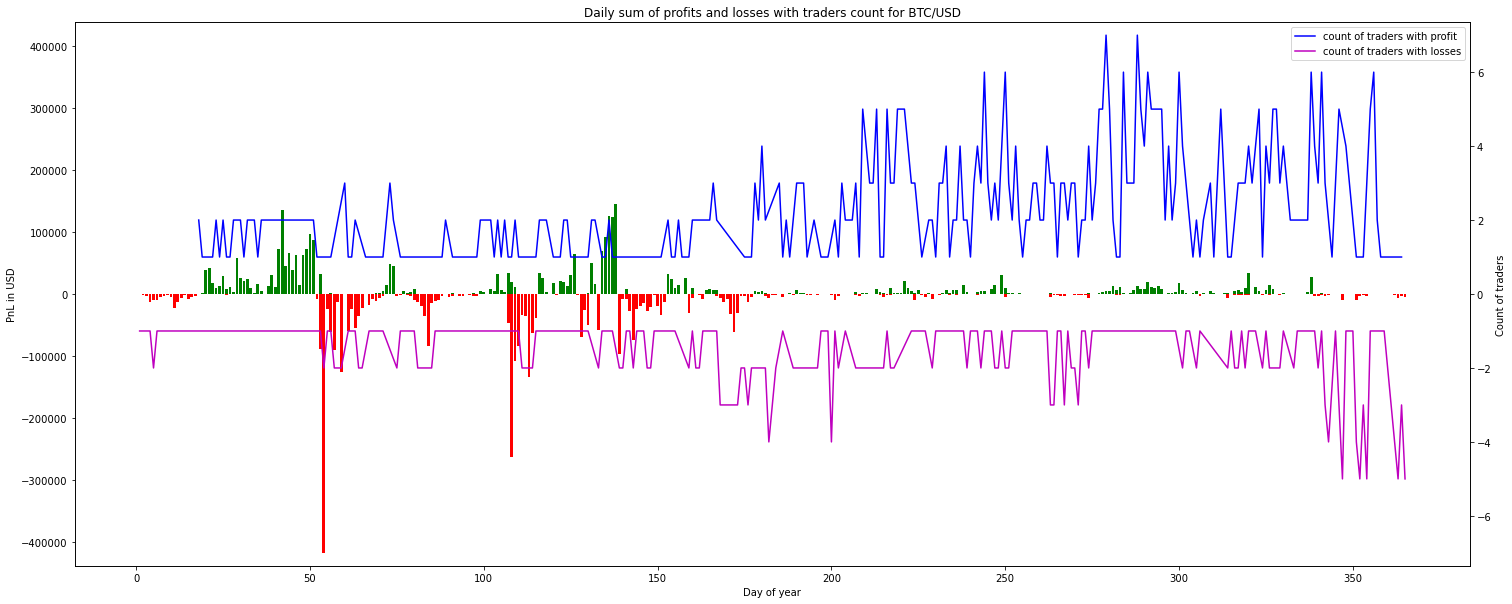

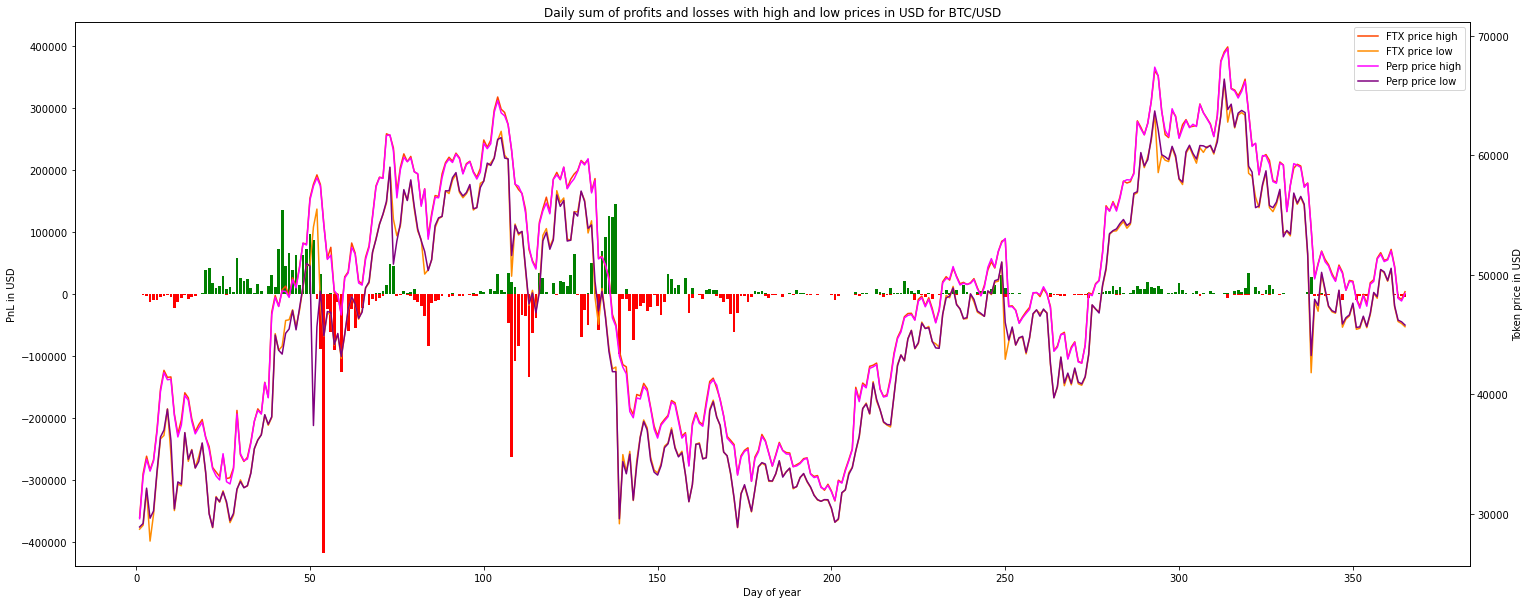

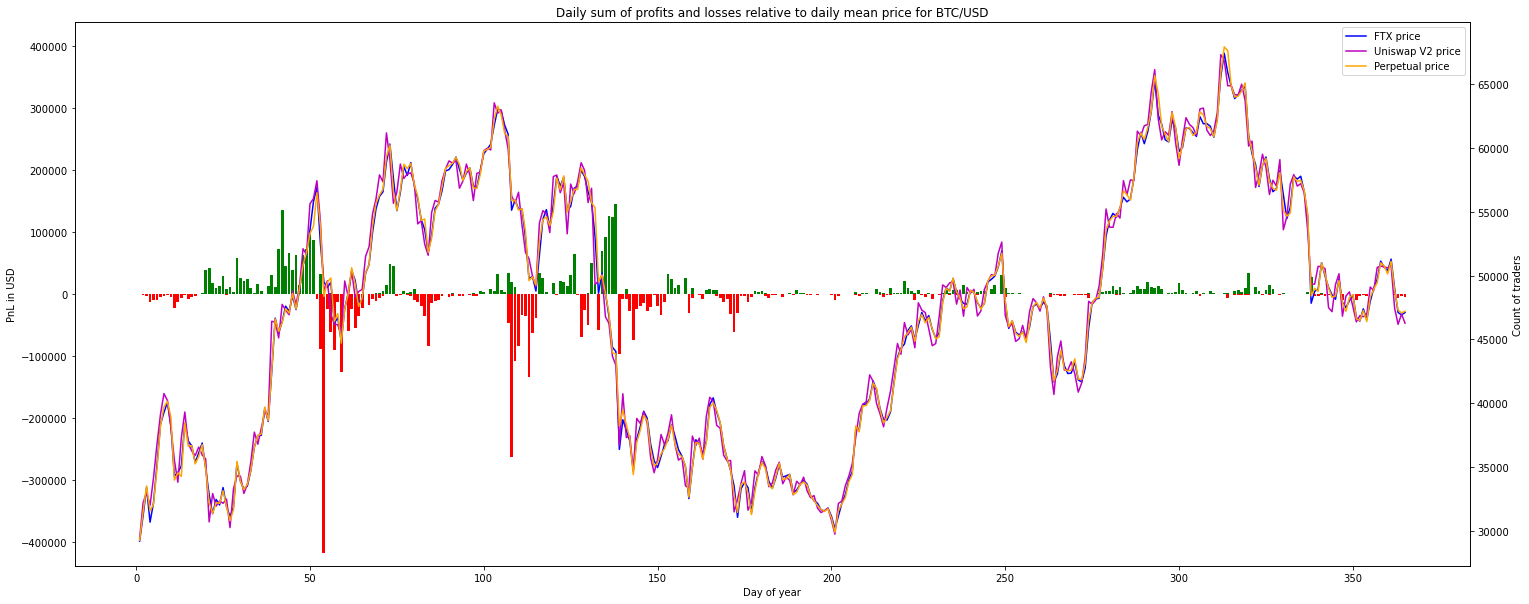

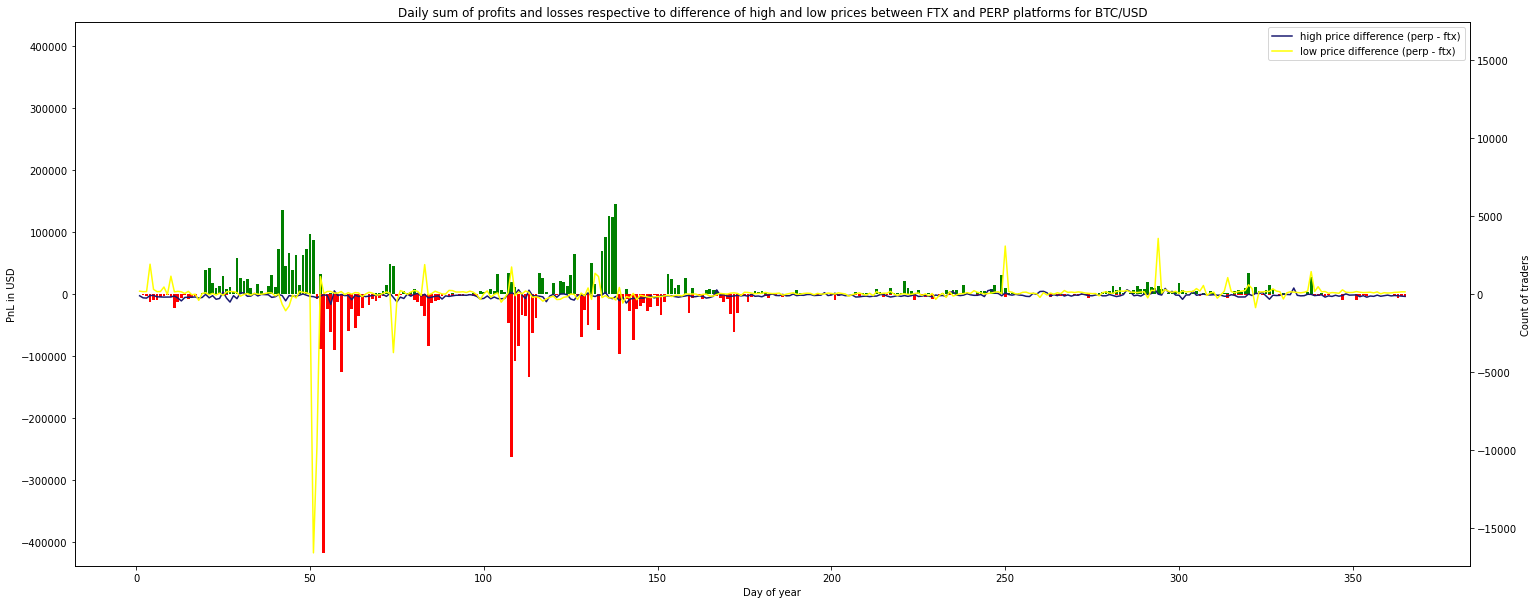

In [90]:
#       make a cumulative sum of profits and losses daily respective to the traders count by their profit or loss status
plot_cumulative_pnl_to_traders_counts(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "BTC/USDC"], "BTC")

#       make a cumulative sum of profits and losses daily respective to daily high and low price
plot_cumulative_pnl_to_high_and_low_price(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "BTC/USDC"], 
                                          ftx_btc_price_df, daily_high_low_price_for_btc, "BTC")

#       make a cumulative sum of profits and losses daily respective to daily mean price
plot_cumulative_pnl_to_mean_price(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "BTC/USDC"], 
                                  uniswap_btc_price_df, ftx_btc_price_df, daily_price_of_btc, "BTC")

#       make a cumulative sum of profits and losses daily respective to difference between high and low prices of PERP and FTX platforms
plot_cumulative_pnl_to_high_low_diff(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "BTC/USDC"], 
                                ftx_btc_price_df, daily_high_low_price_for_btc, "BTC")

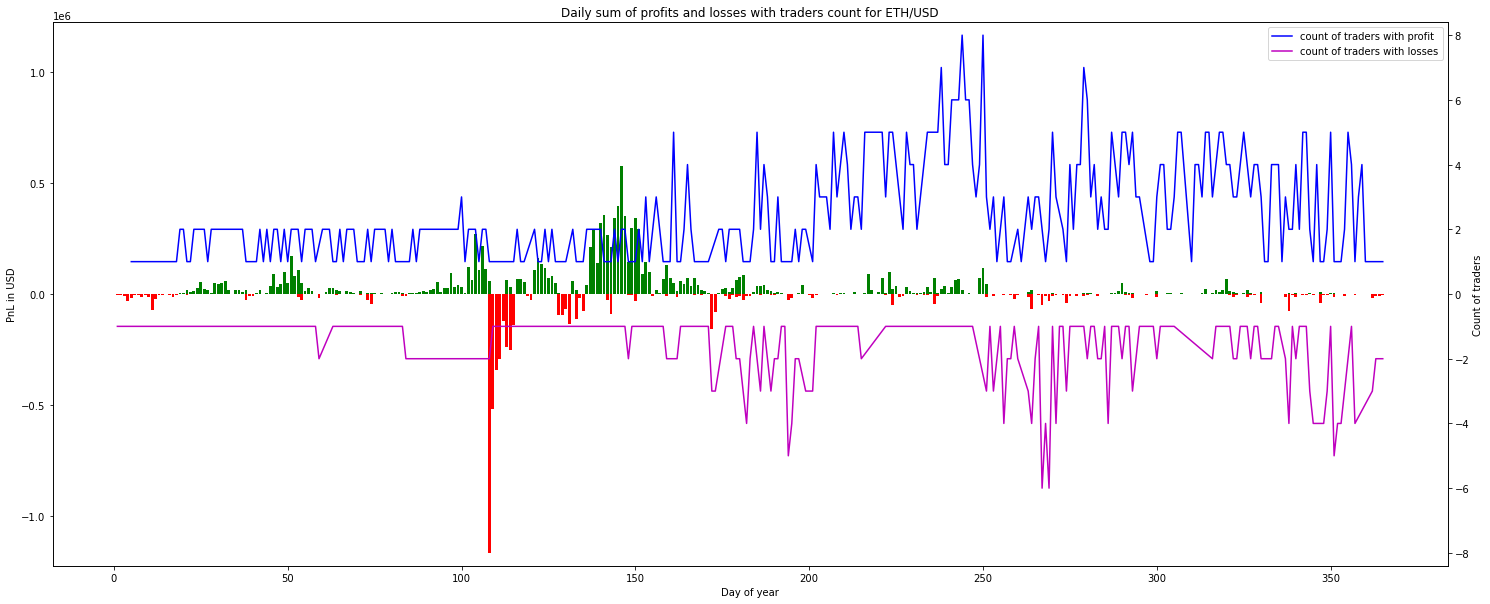

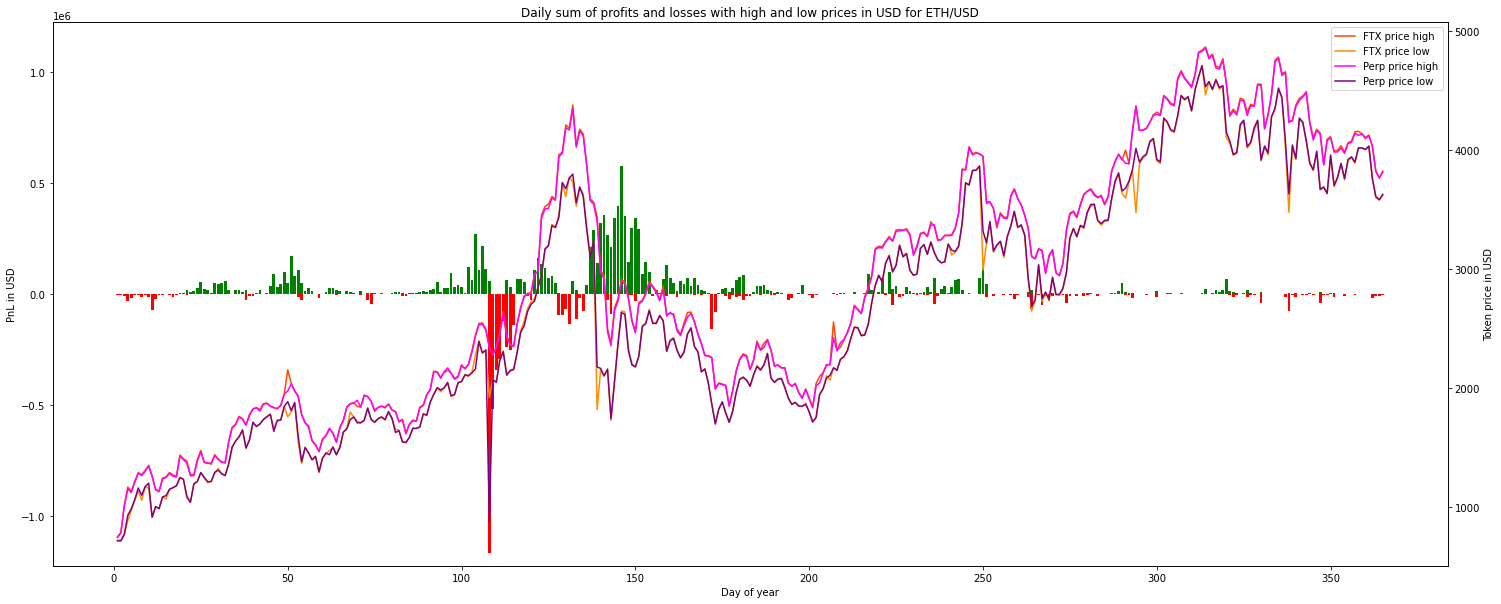

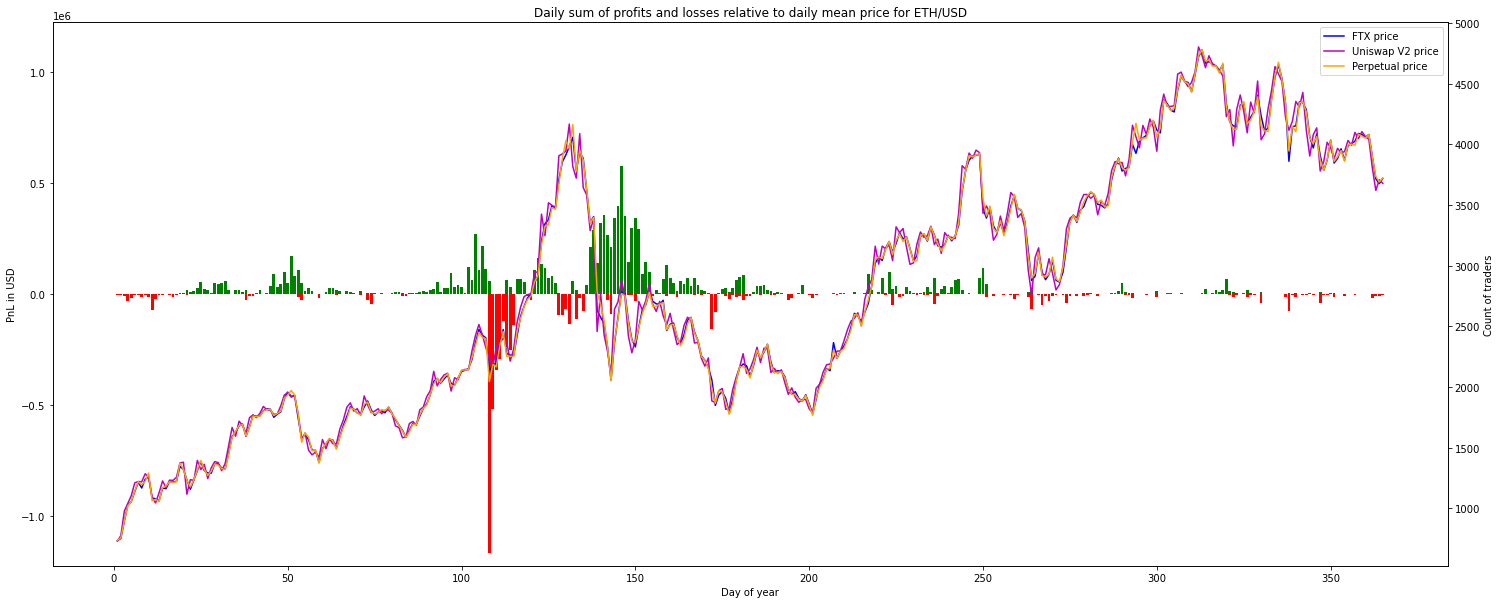

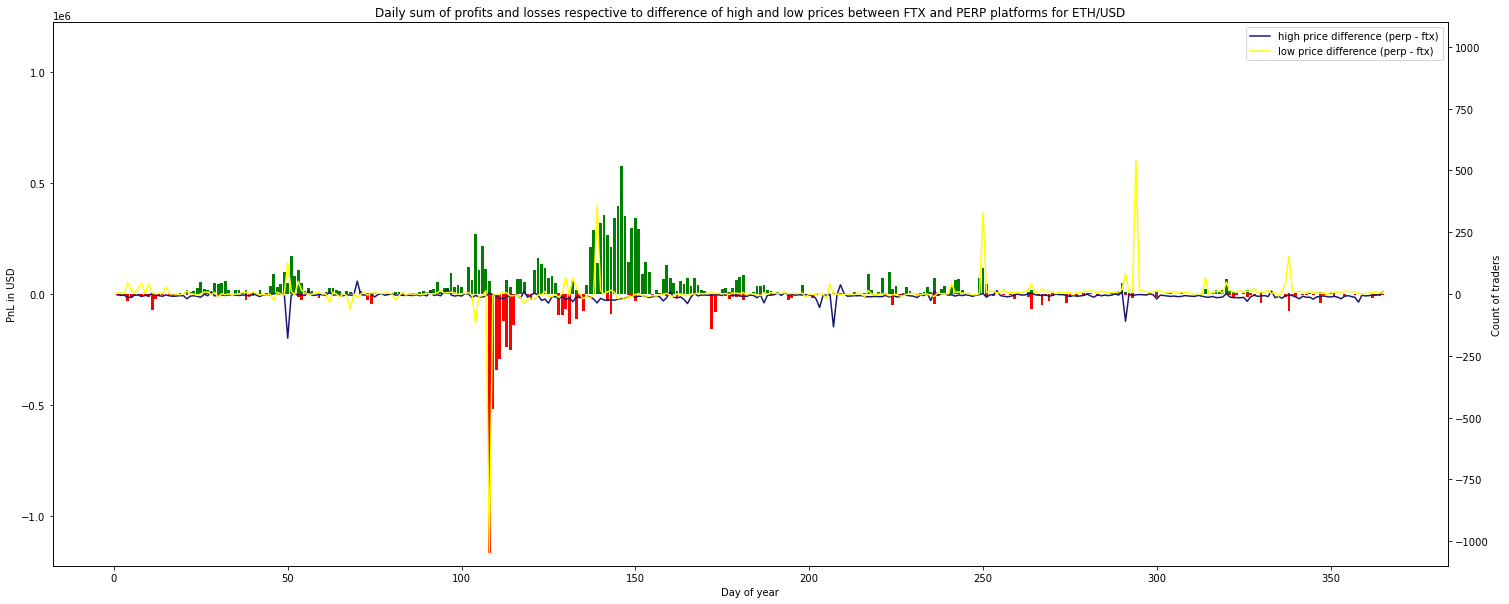

In [91]:
#       make a cumulative sum of profits and losses daily respective to the traders count by their profit or loss status
plot_cumulative_pnl_to_traders_counts(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "ETH/USDC"], "ETH")

#       make a cumulative sum of profits and losses daily respective to daily high and low price
plot_cumulative_pnl_to_high_and_low_price(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "ETH/USDC"], 
                                          ftx_eth_price_df, daily_high_low_price_for_eth, "ETH")

#       make a cumulative sum of profits and losses daily respective to daily mean price
plot_cumulative_pnl_to_mean_price(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "ETH/USDC"], 
                                  uniswap_eth_price_df, ftx_eth_price_df, daily_price_of_eth, "ETH")

#       make a cumulative sum of profits and losses daily respective to difference between high and low prices of PERP and FTX platforms
plot_cumulative_pnl_to_high_low_diff(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "ETH/USDC"], 
                                ftx_eth_price_df, daily_high_low_price_for_eth, "ETH")

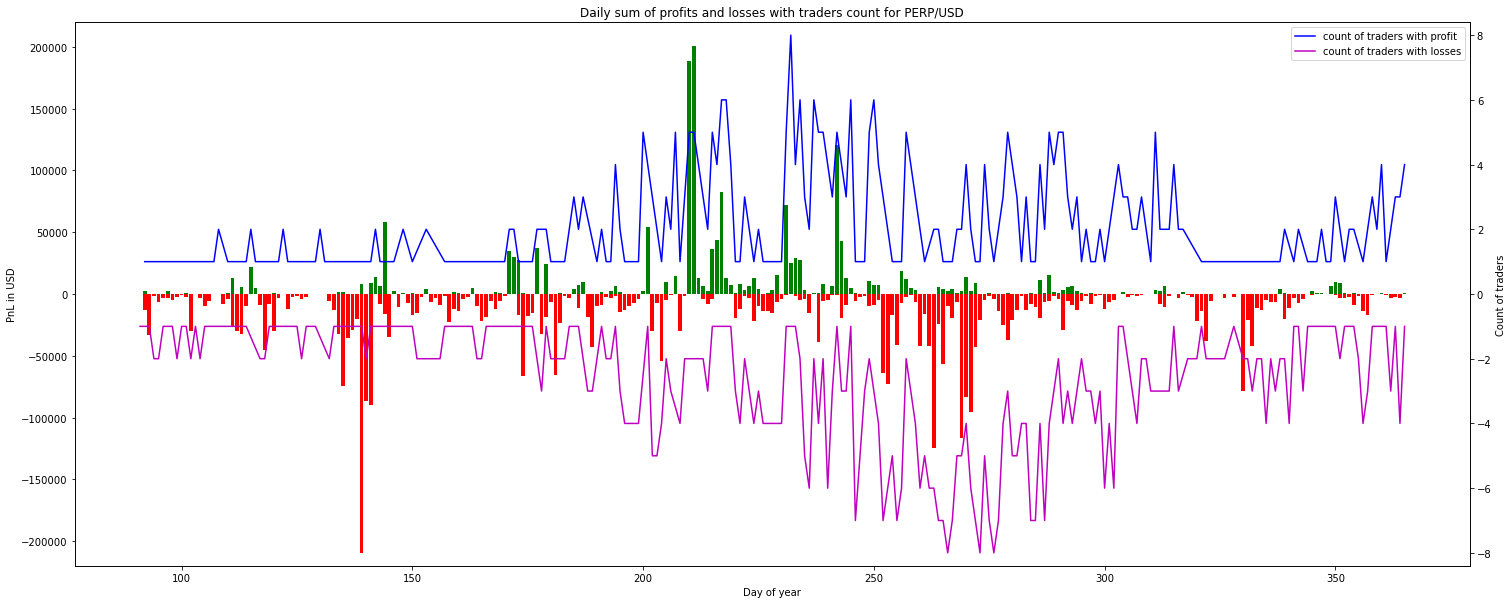

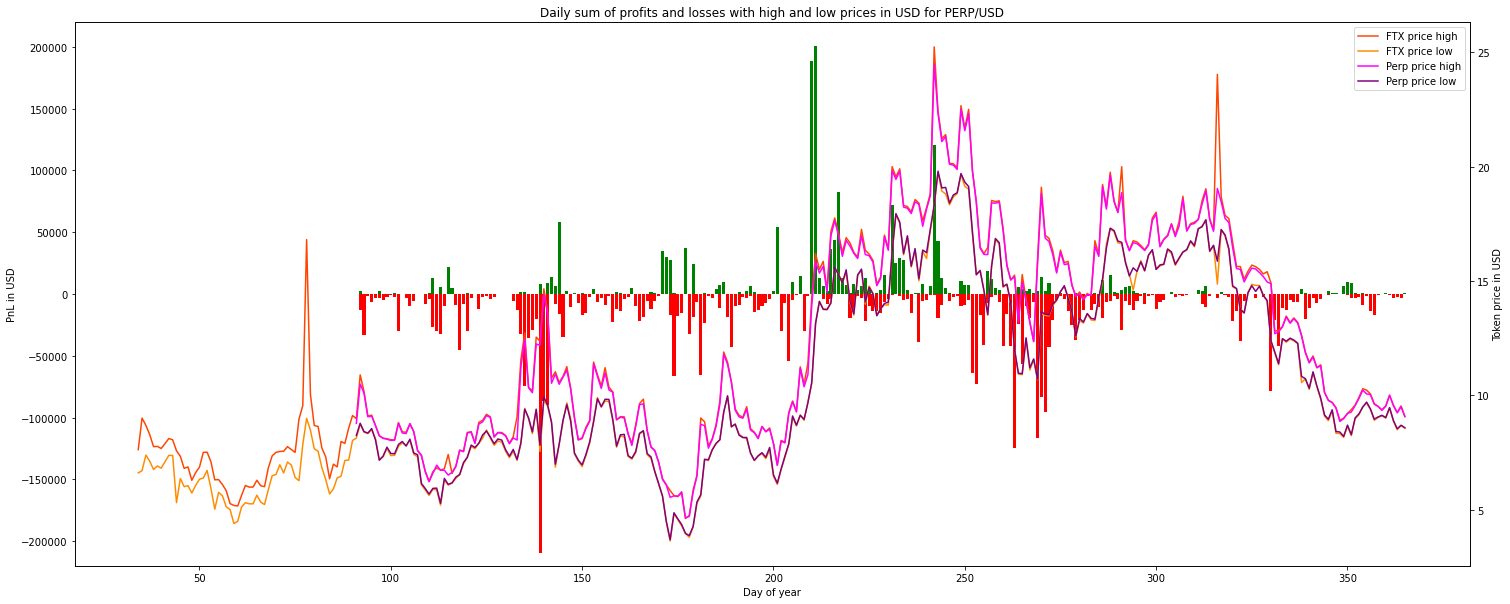

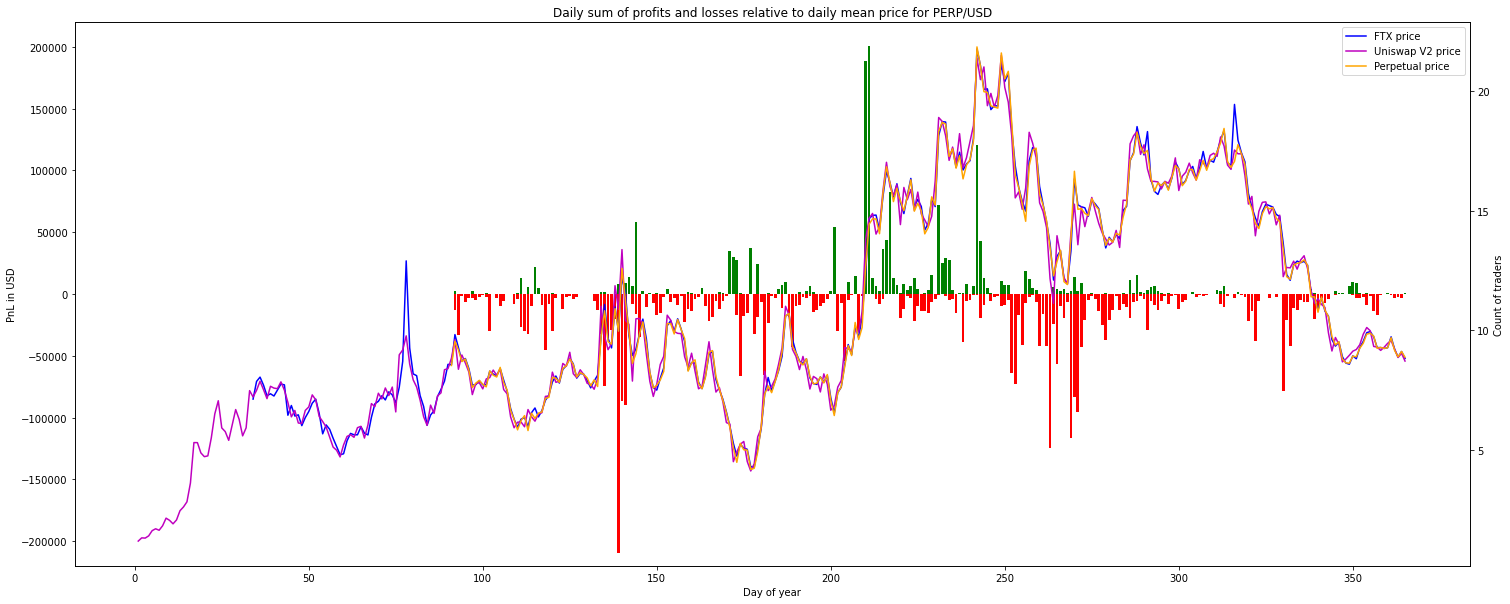

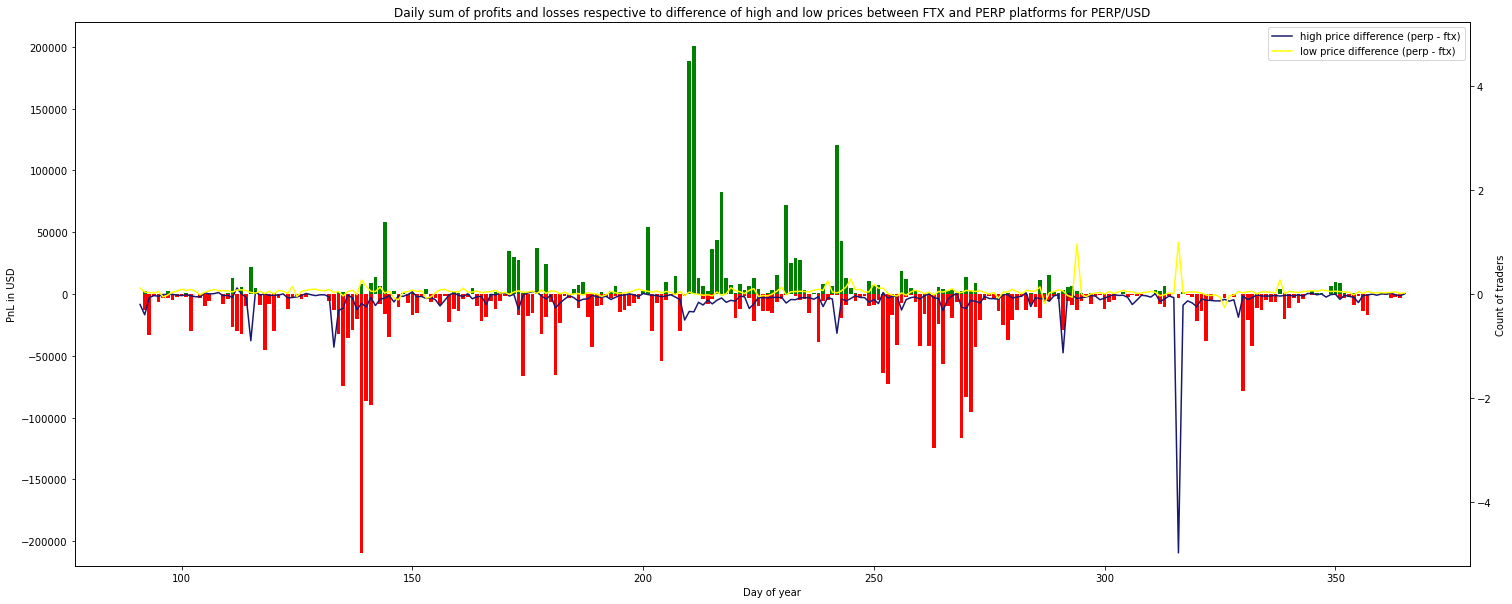

In [92]:
#       make a cumulative sum of profits and losses daily respective to the traders count by their profit or loss status
plot_cumulative_pnl_to_traders_counts(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "PERP/USDC"], "PERP")

#       make a cumulative sum of profits and losses daily respective to daily high and low price
plot_cumulative_pnl_to_high_and_low_price(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "PERP/USDC"], 
                                          ftx_perp_price_df, daily_high_low_price_for_perp, "PERP")

#       make a cumulative sum of profits and losses daily respective to daily mean price
plot_cumulative_pnl_to_mean_price(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "PERP/USDC"], 
                                  uniswap_perp_price_df, ftx_perp_price_df, daily_price_of_perp, "PERP")

#       make a cumulative sum of profits and losses daily respective to difference between high and low prices of PERP and FTX platforms
plot_cumulative_pnl_to_high_low_diff(changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "PERP/USDC"], 
                                ftx_perp_price_df[ftx_perp_price_df.index > 90], daily_high_low_price_for_perp, "PERP")